#  GSEA and other CpG-based Enrichments

In [2]:
suppressMessages(library(fgsea))
suppressMessages(library(missMethyl))
suppressMessages(library(data.table))
suppressMessages(library(tidyverse))

In [3]:
# Load data
sex_biased <- fread("../data/sex_annotated_hits.txt.gz")z
marginal <- fread("../data/marginal_annotated_hits.txt.gz")
IRdisplay::display(head(sex_biased))
IRdisplay::display(head(marginal))

SNP,gene,beta,t-stat,p-value,FDR,res_m,beta_m,se_m,aFC_m,⋯,UCSC_RefGene_Name,UCSC_RefGene_Accession,UCSC_RefGene_Group,Phantom,DMR,Enhancer,HMM_Island,Regulatory_Feature_Name,Regulatory_Feature_Group,DHS
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<lgl>
rs6665493,cg02279471,1.23501195,58.681769,4.202315e-150,2.240343e-143,1.761058e-01,-0.002954777,0.002172326,-0.01318491,⋯,TMEM56,NM_152487,Body,,,TRUE,,,,NA
rs4498850,cg02279471,1.18714767,40.944973,4.085951e-114,3.592495e-108,1.850758e-01,-0.002892634,0.002171164,-0.01289000,⋯,TMEM56,NM_152487,Body,,,TRUE,,,,NA
rs10870336,cg04391569,-0.69812209,-27.549847,2.113173e-78,5.055153e-73,4.760757e-59,-0.717168700,0.024637414,-1.35827698,⋯,INPP5A,NM_005539,Body,,,NA,10:134445136-134445684,,,NA
rs1557539,cg09544549,0.38027885,21.884522,1.789666e-60,2.267402e-55,8.138161e-01,0.001764258,0.007476277,-0.00349014,⋯,MYH9,NM_002473,Body,low-CpG:35026896-35027040,,NA,,22:36696914-36697963,Promoter_Associated,NA
rs1003366,cg09544549,0.07646086,5.091299,6.914329e-07,1.561015e-03,2.707407e-01,-0.004635442,0.004191065,-0.03005709,⋯,MYH9,NM_002473,Body,low-CpG:35026896-35027040,,NA,,22:36696914-36697963,Promoter_Associated,NA
rs1203625,cg19806020,0.47313715,20.329886,2.826290e-55,3.022144e-50,8.849434e-01,-0.001164898,0.008034460,-0.02935066,⋯,PRDM2;PRDM2,NM_012231;NM_001135610,Body;Body,,,TRUE,,,,NA


SNP,gene,beta,t-stat,p-value,FDR,Unnamed: 0,chr,pos,strand,⋯,UCSC_RefGene_Name,UCSC_RefGene_Accession,UCSC_RefGene_Group,Phantom,DMR,Enhancer,HMM_Island,Regulatory_Feature_Name,Regulatory_Feature_Group,DHS
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<int>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<lgl>,<chr>,<chr>,<chr>,<lgl>
rs3844153,cg22849321,0.3632284,75.00223,2.942933e-176,2.060521e-171,cg22849321,chr6,113128231,-,⋯,,,,,,TRUE,,,,NA
rs12200288,cg22849321,0.3629643,74.92731,3.759097e-176,2.628130e-171,cg22849321,chr6,113128231,-,⋯,,,,,,TRUE,,,,NA
rs4945913,cg22849321,0.2961447,30.40416,6.086534e-87,4.859074e-83,cg22849321,chr6,113128231,-,⋯,,,,,,TRUE,,,,NA
rs336098,cg05918355,0.1561507,35.44248,1.007365e-100,1.105325e-96,cg05918355,chr5,54515640,-,⋯,,,,,,TRUE,,,,NA
rs455817,cg05918355,0.1559460,35.15939,5.538695e-100,5.945605e-96,cg05918355,chr5,54515640,-,⋯,,,,,,TRUE,,,,NA
rs336096,cg05918355,0.1568333,35.08814,8.517852e-100,9.095374e-96,cg05918355,chr5,54515640,-,⋯,,,,,,TRUE,,,,NA


## GSEA 

[1] "hallmarks"


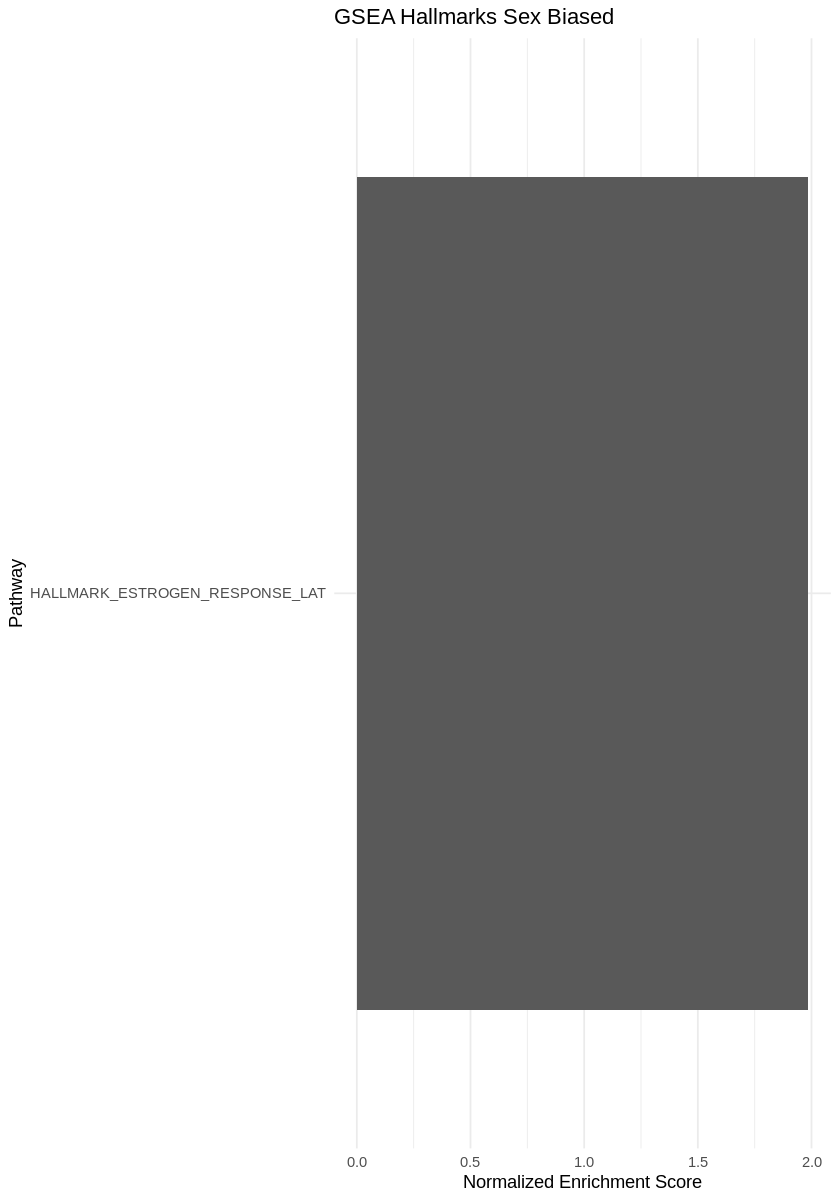

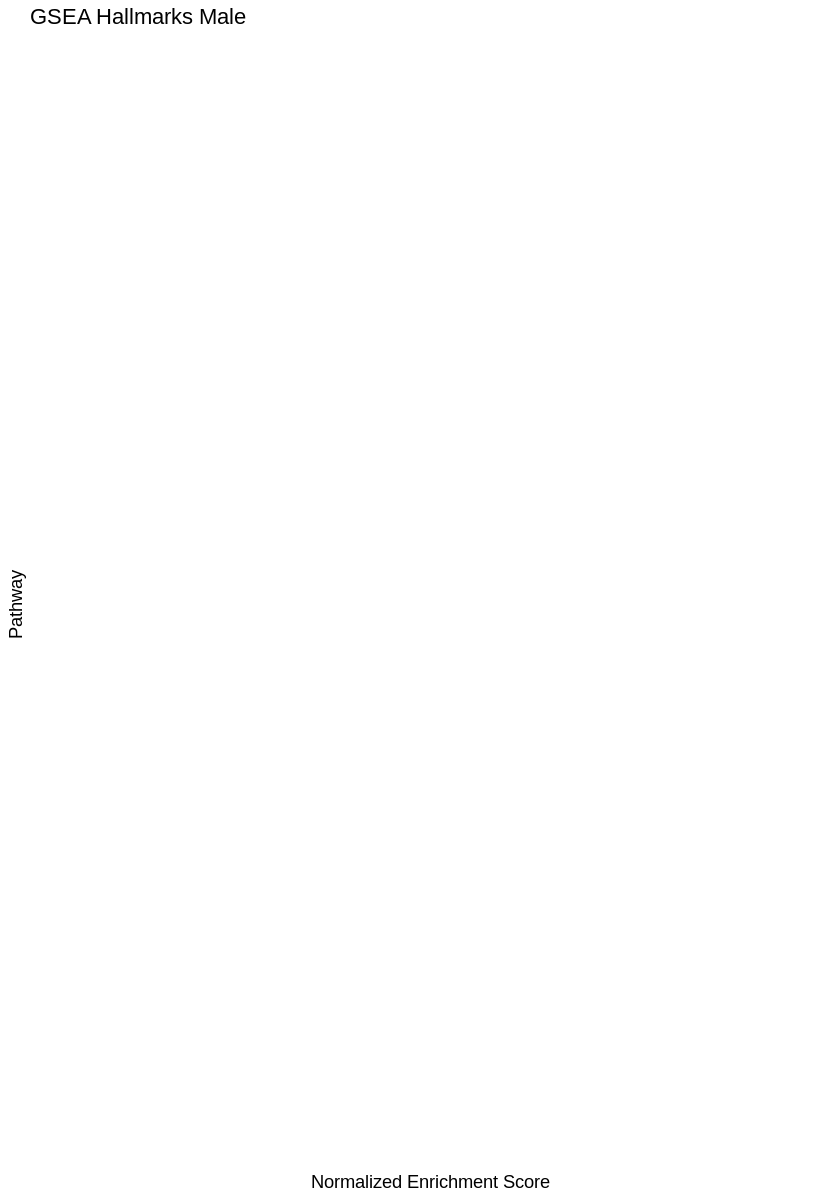

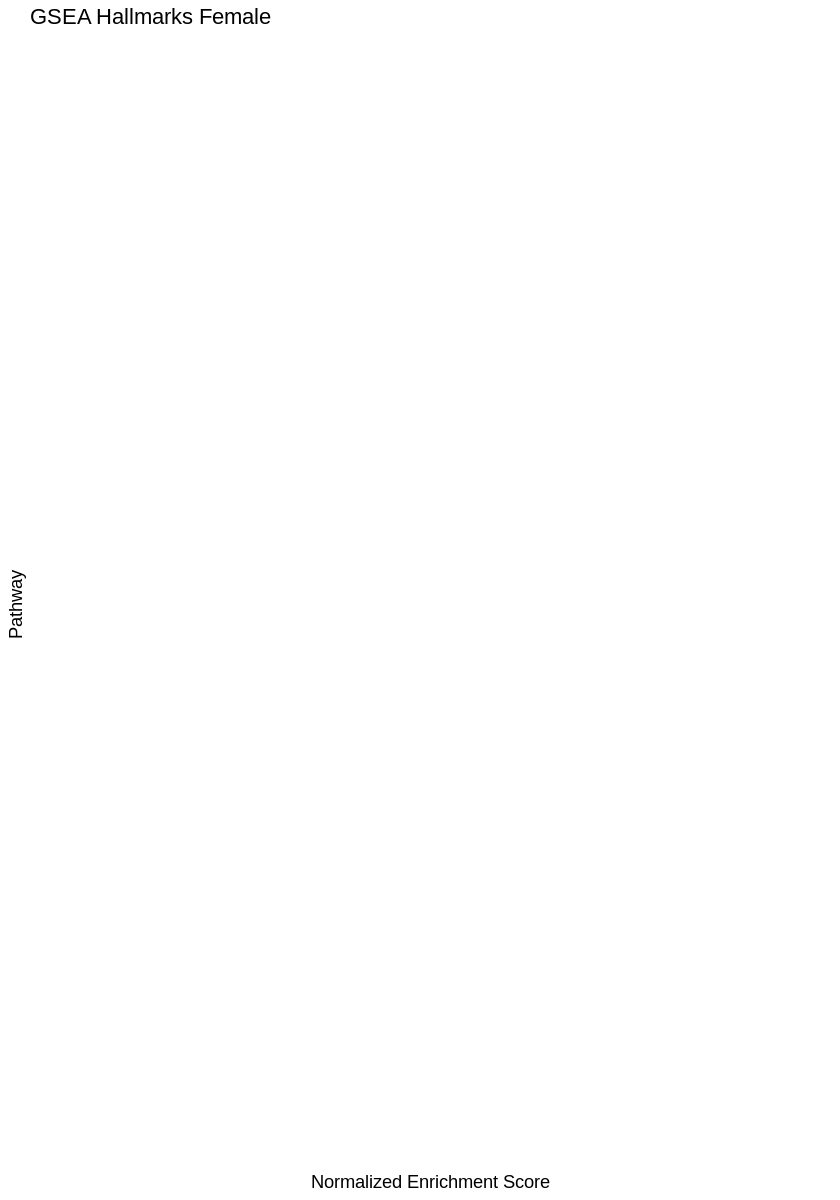

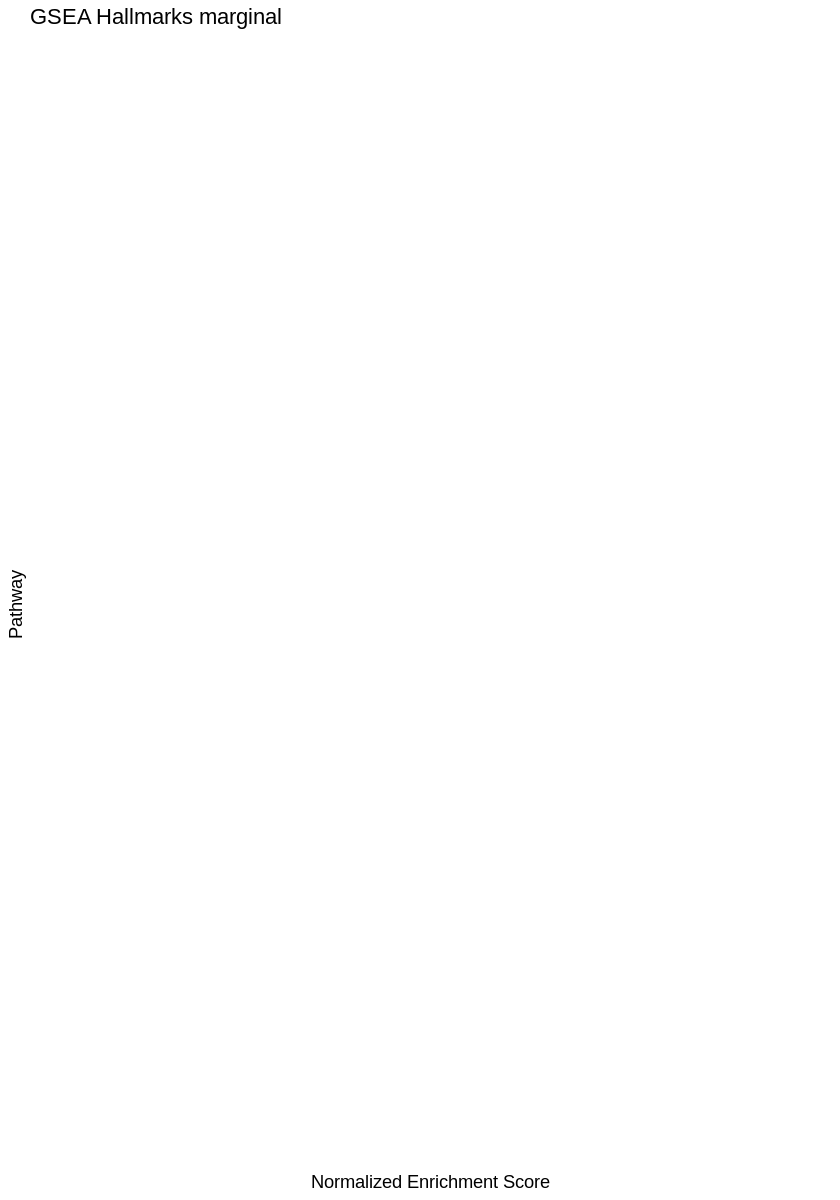

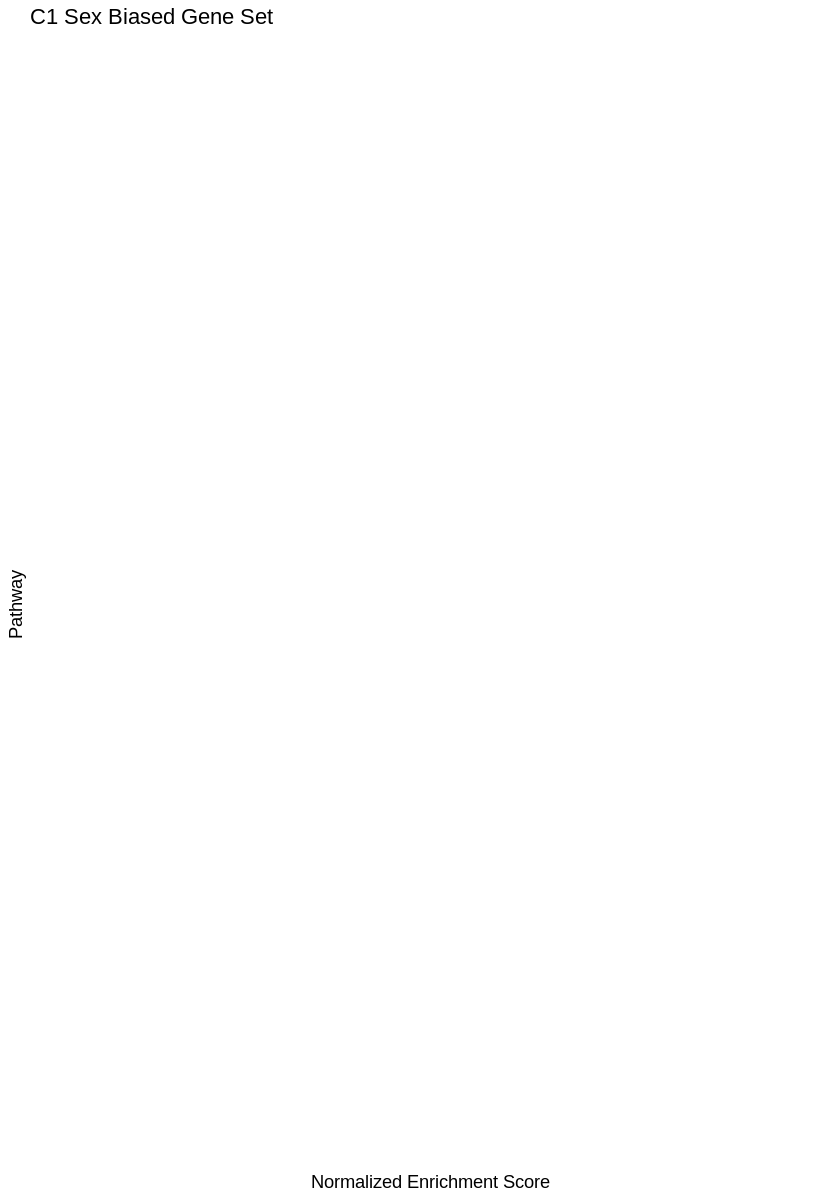

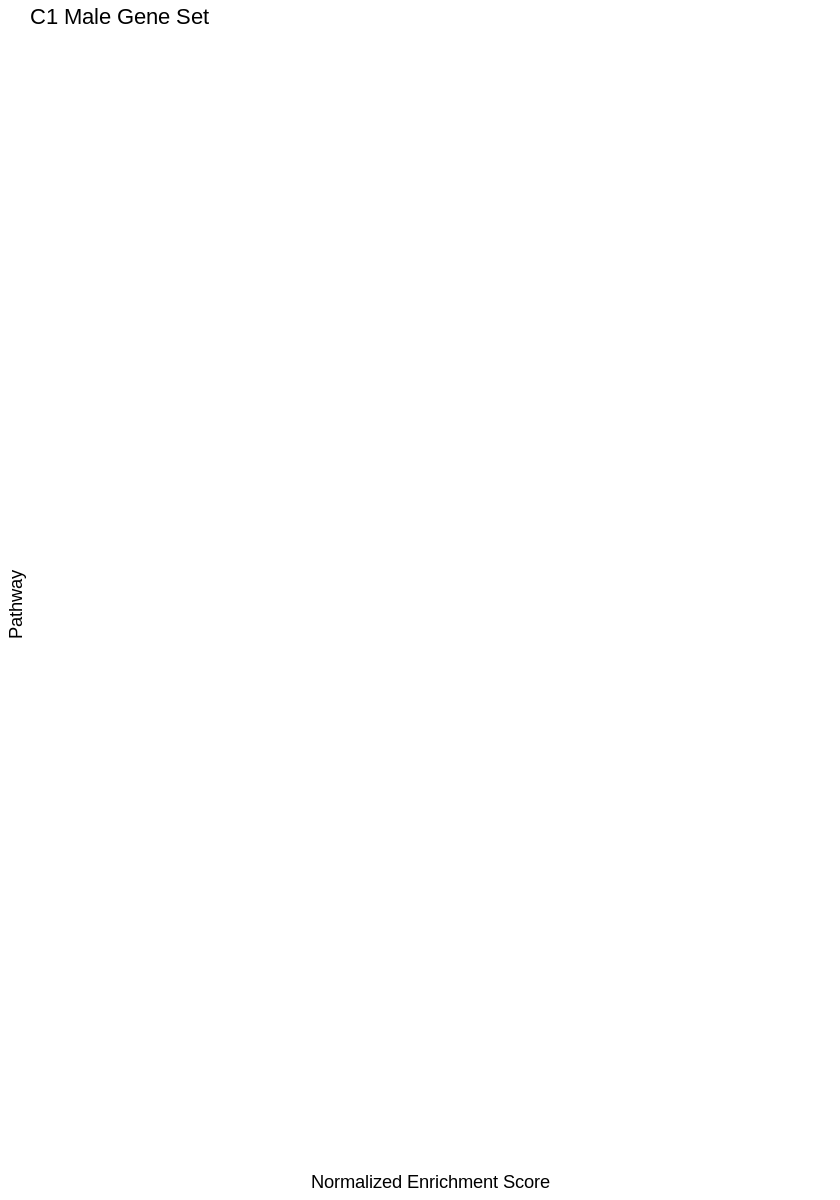

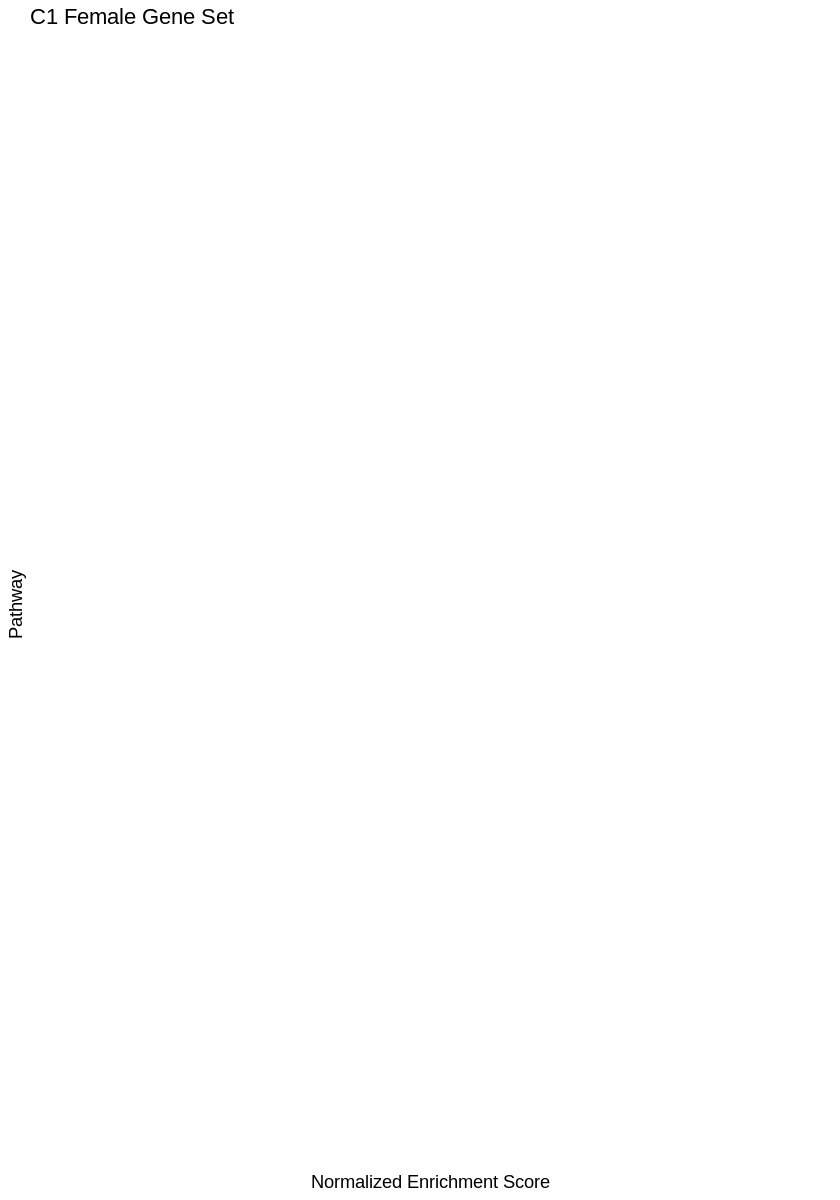

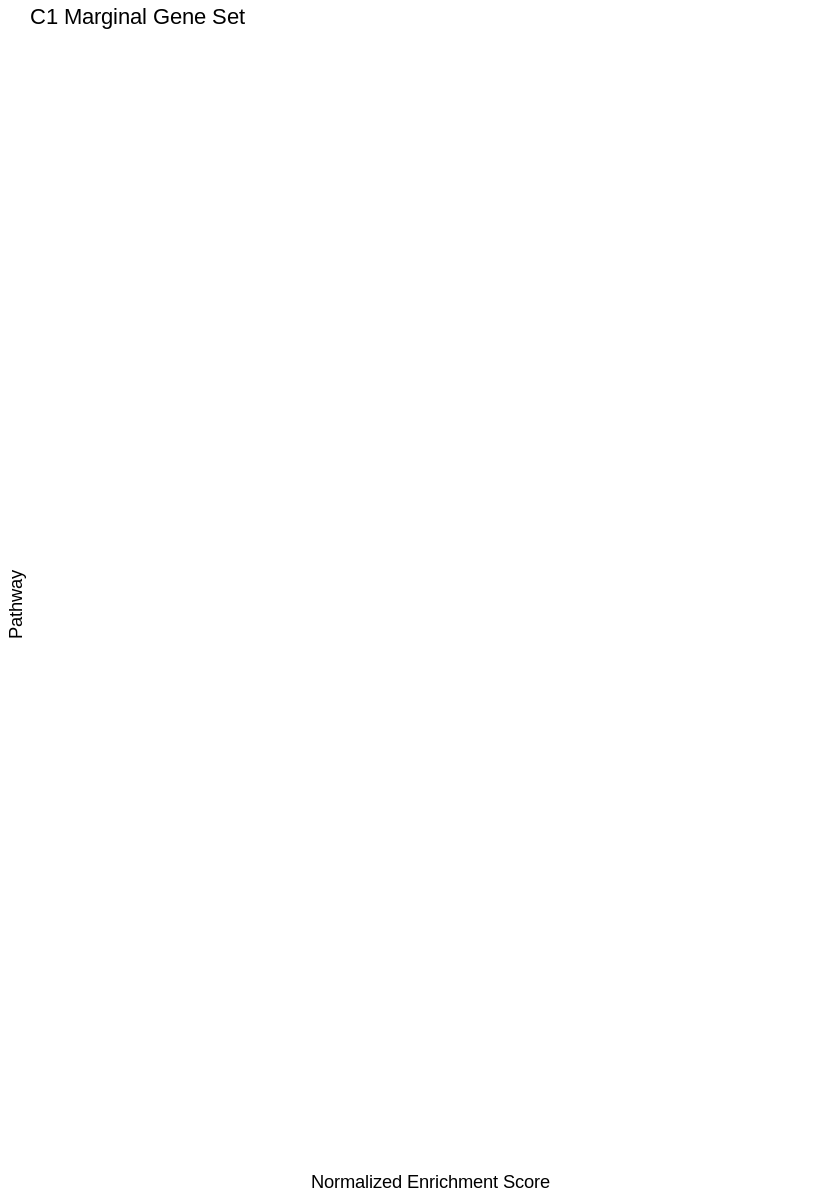

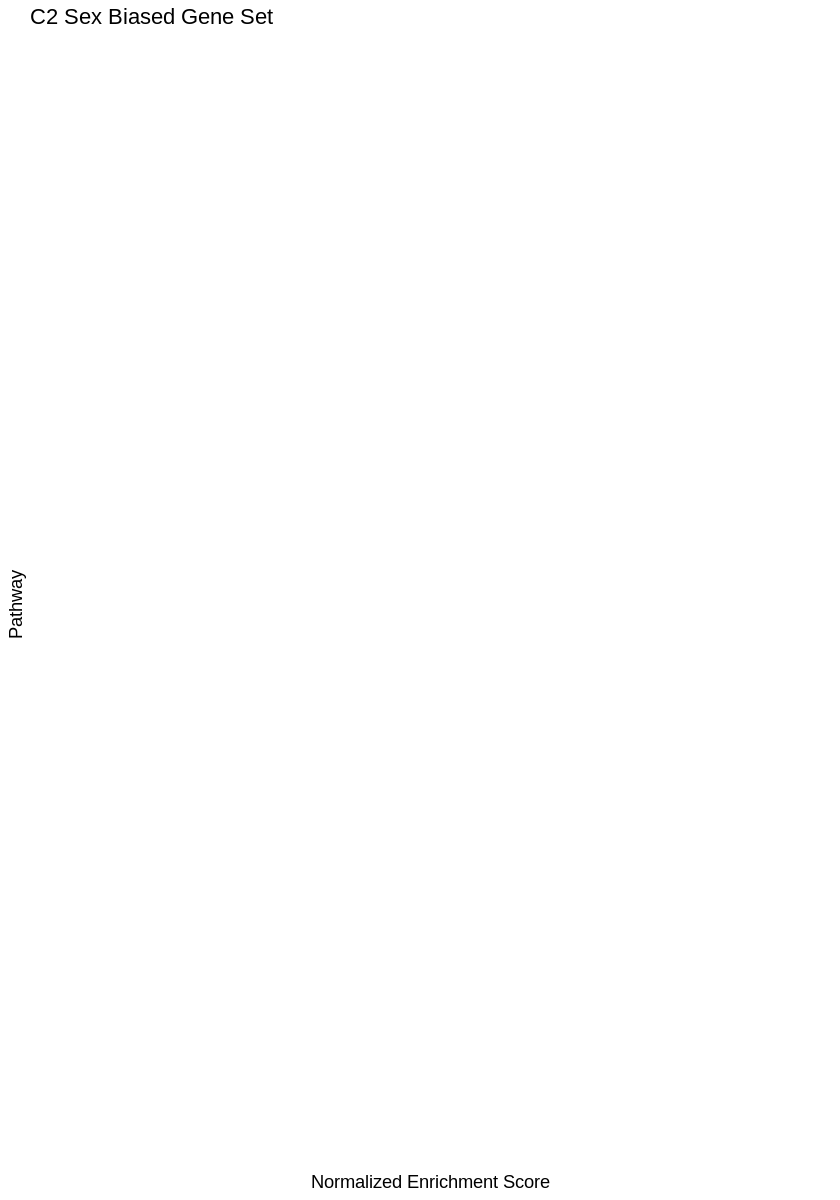

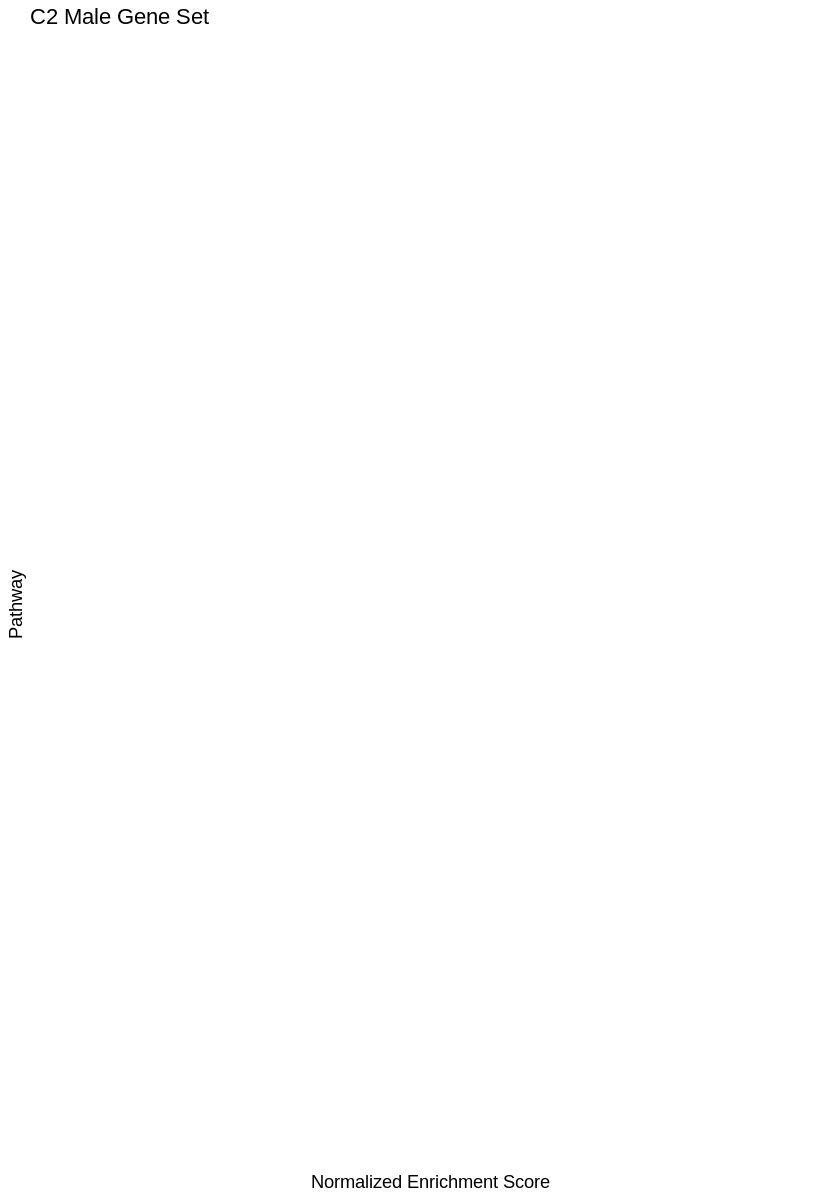

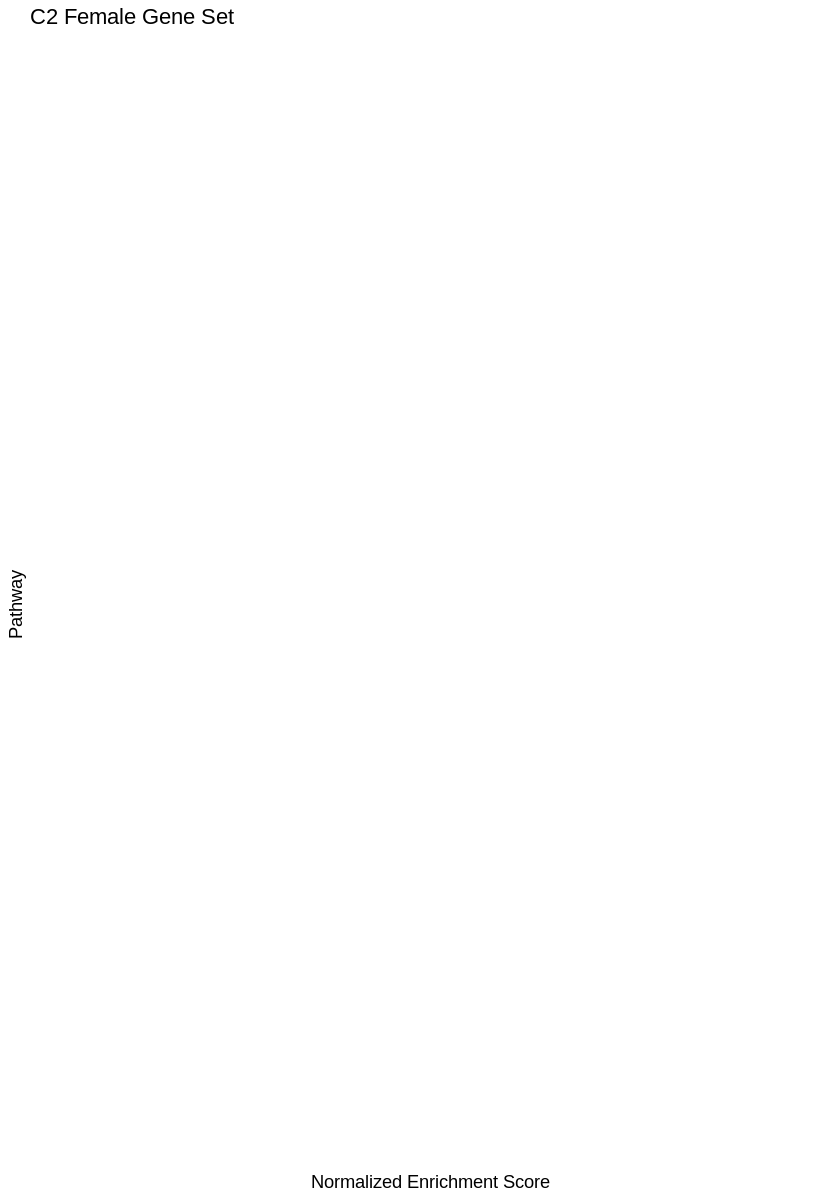

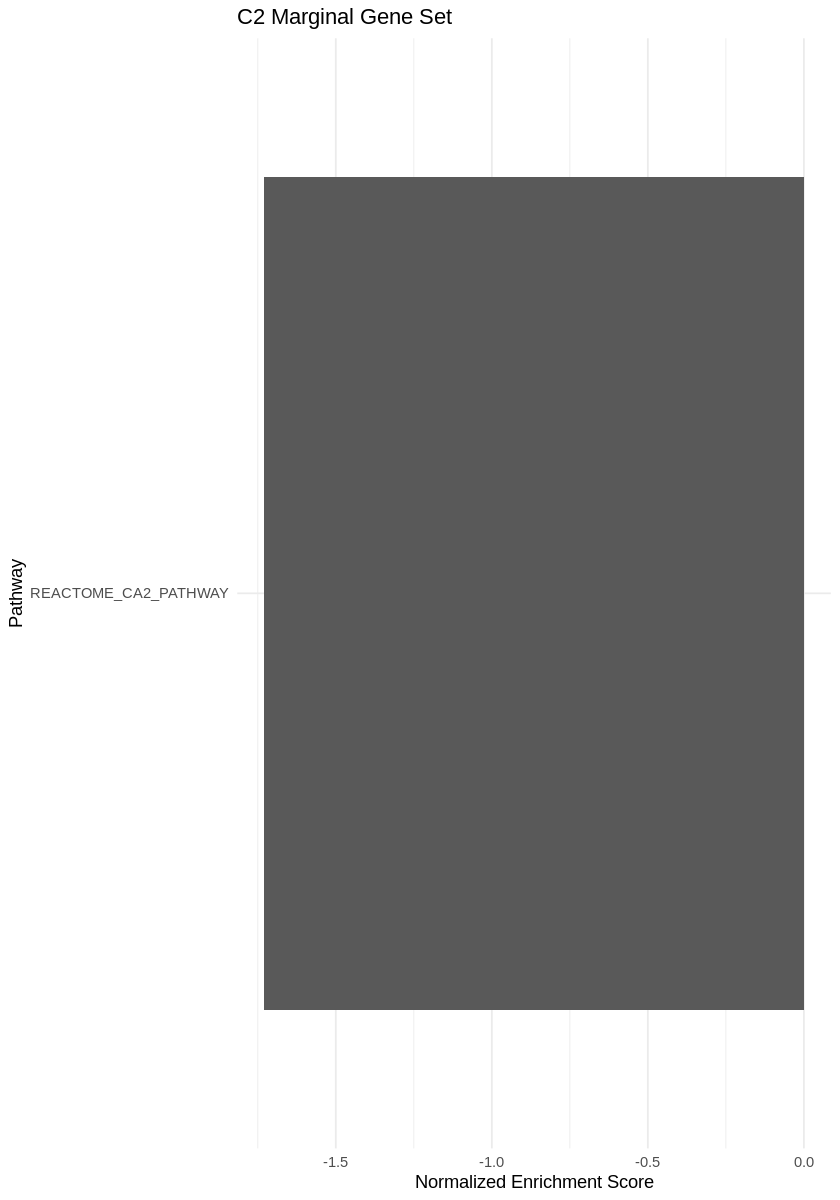

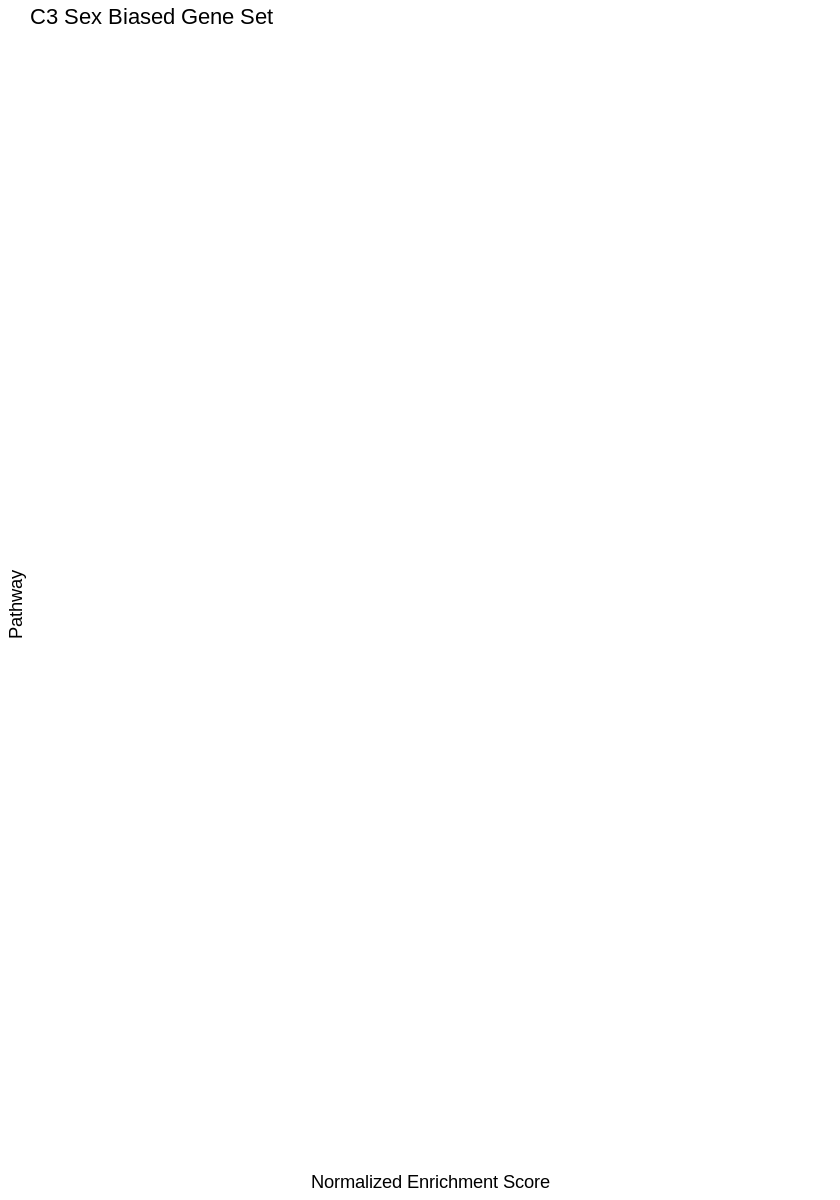

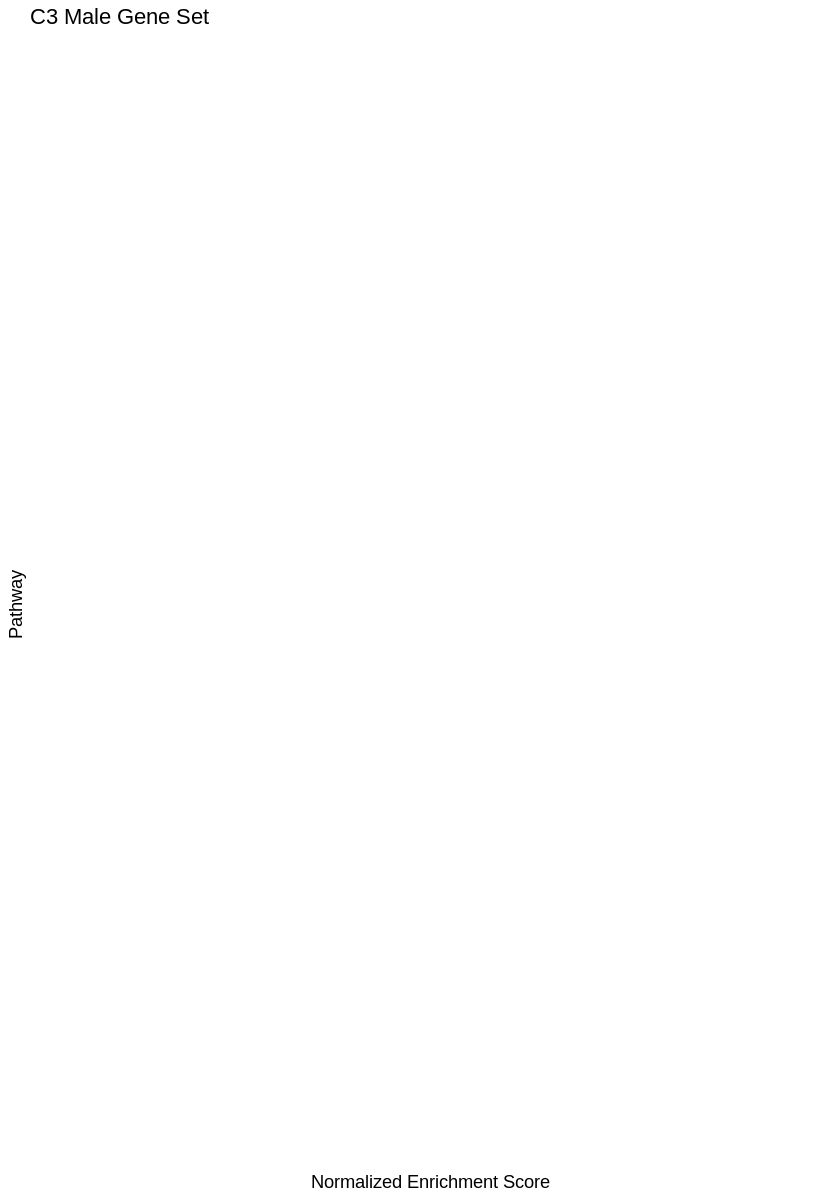

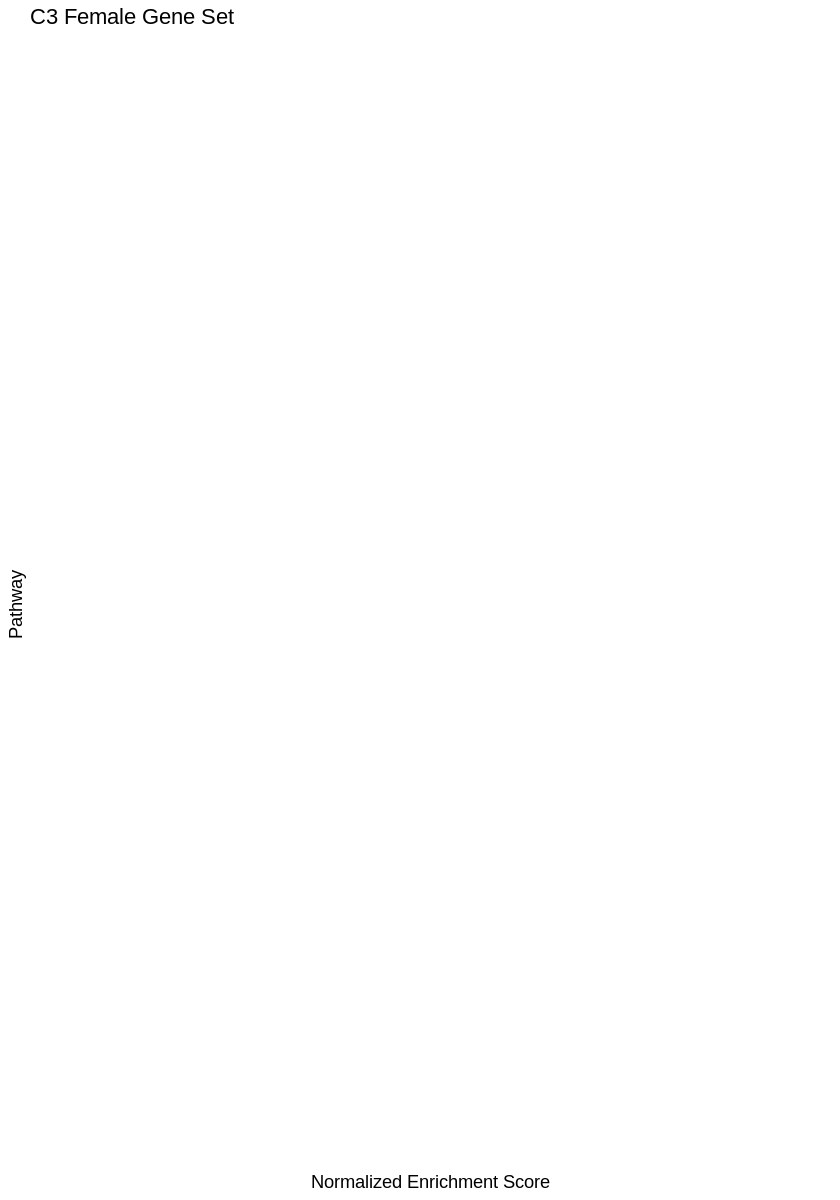

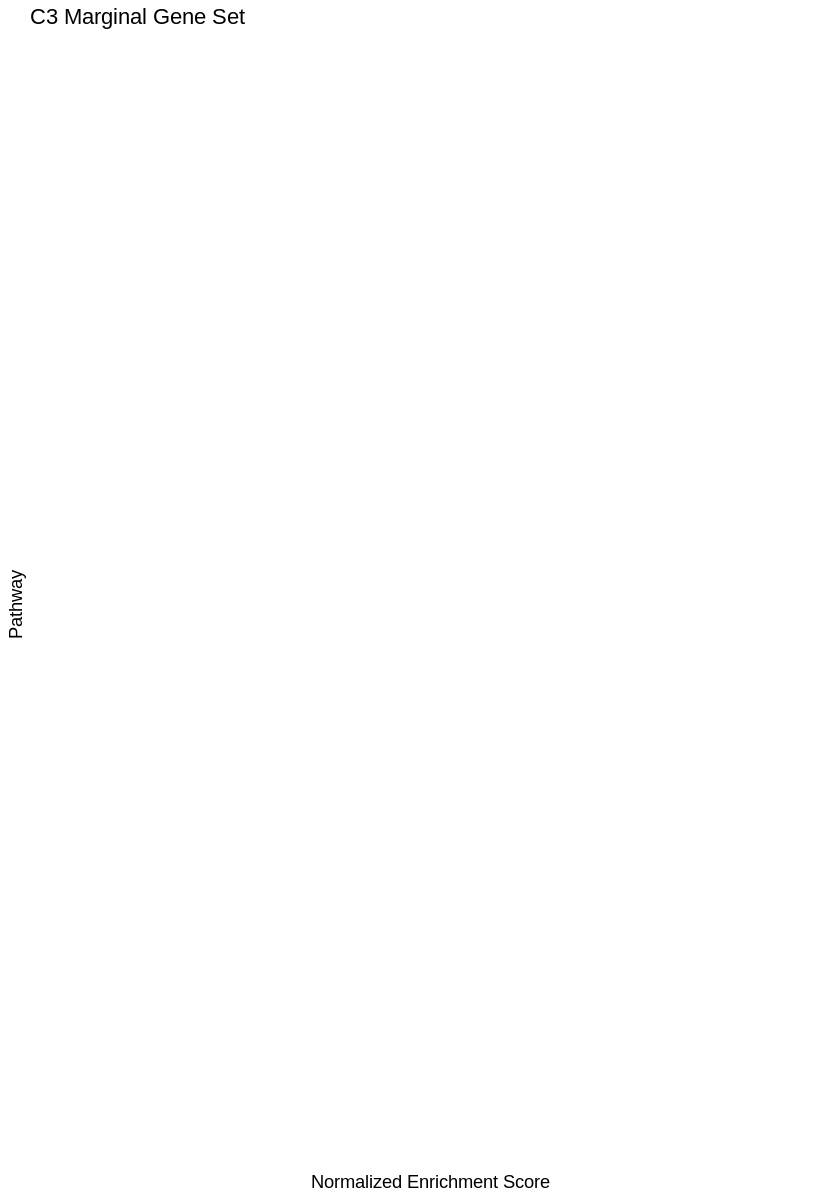

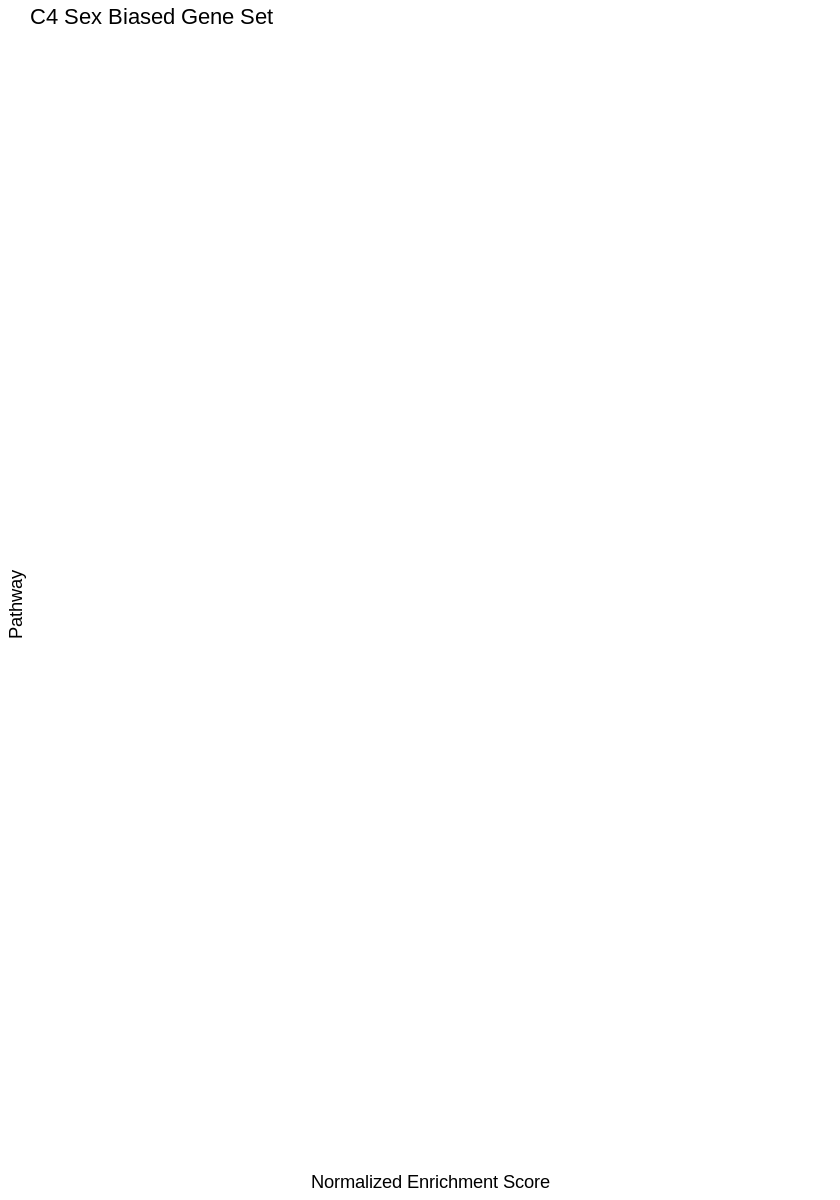

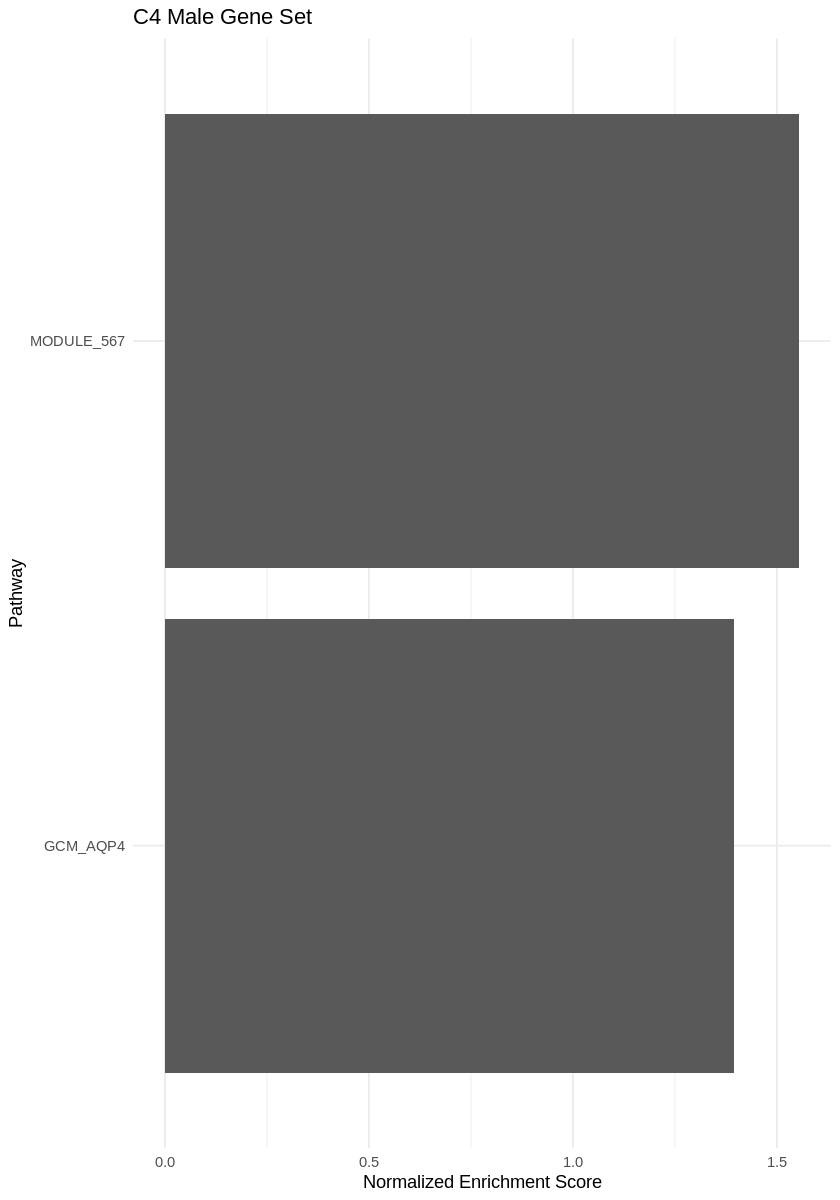

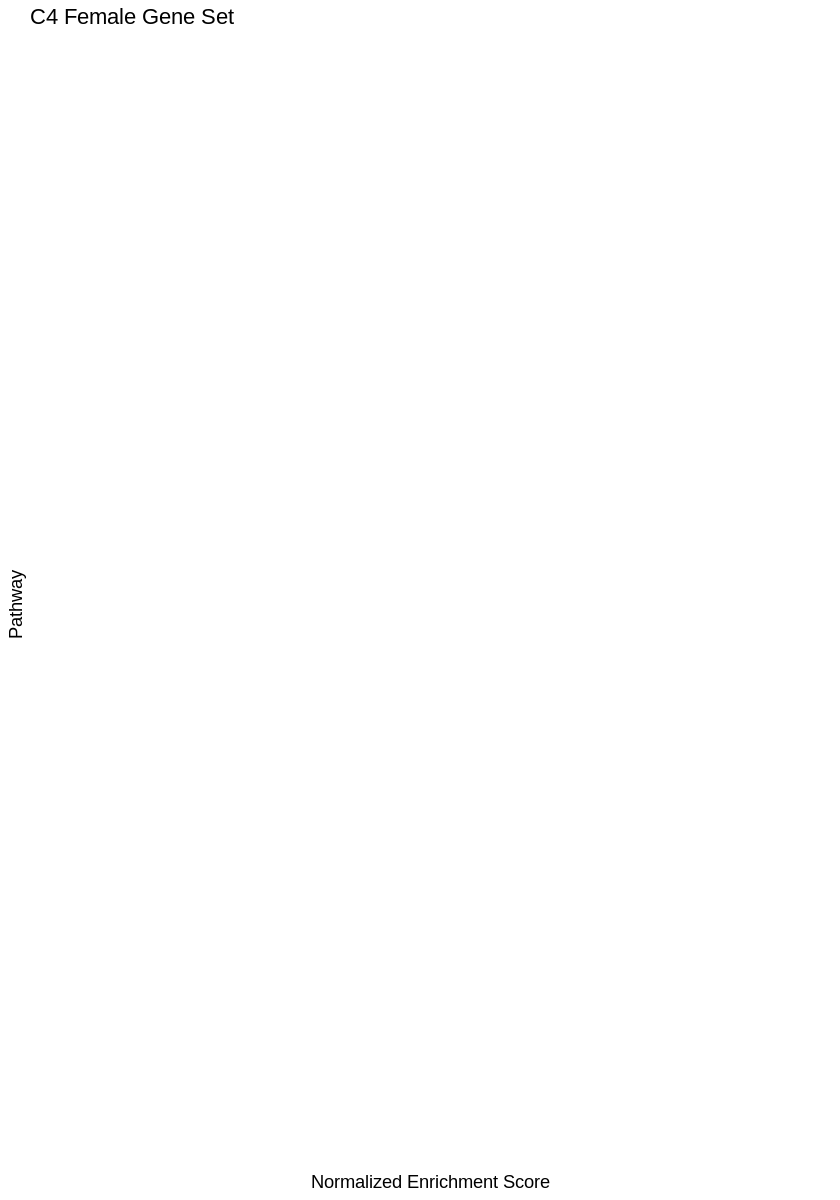

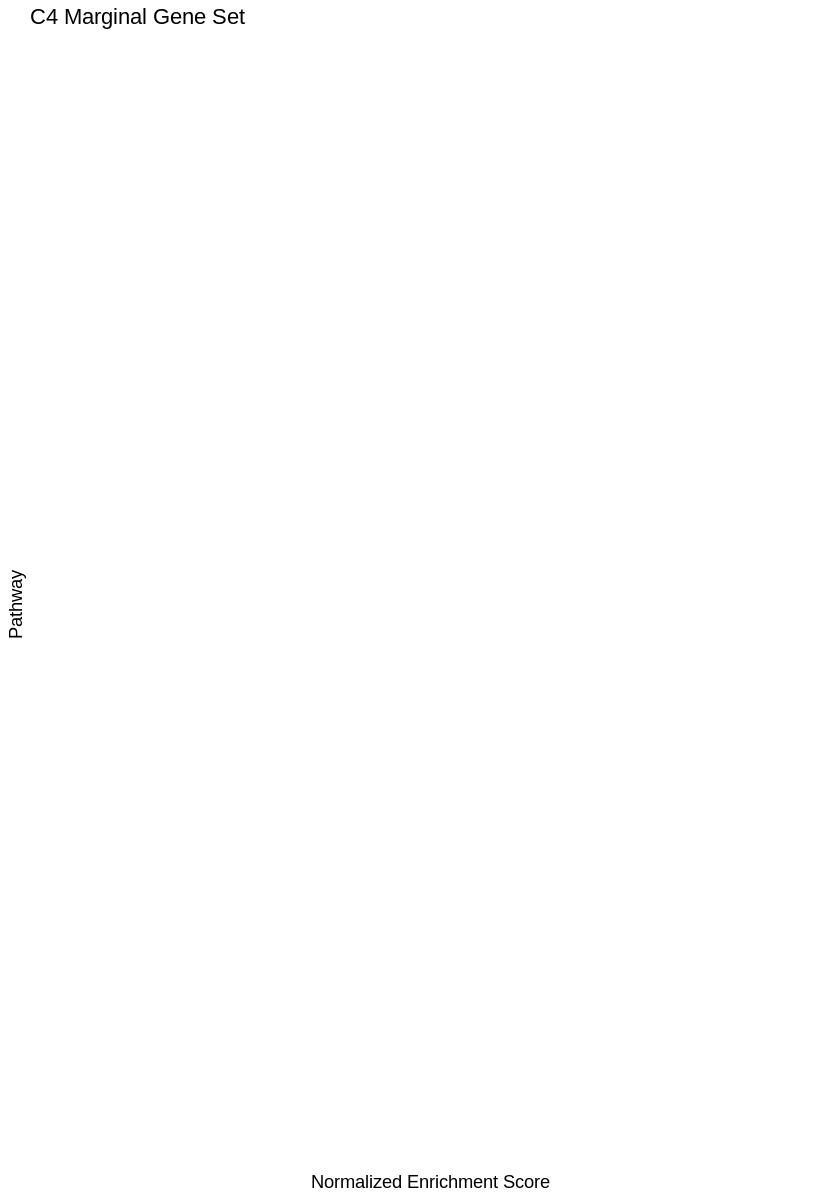

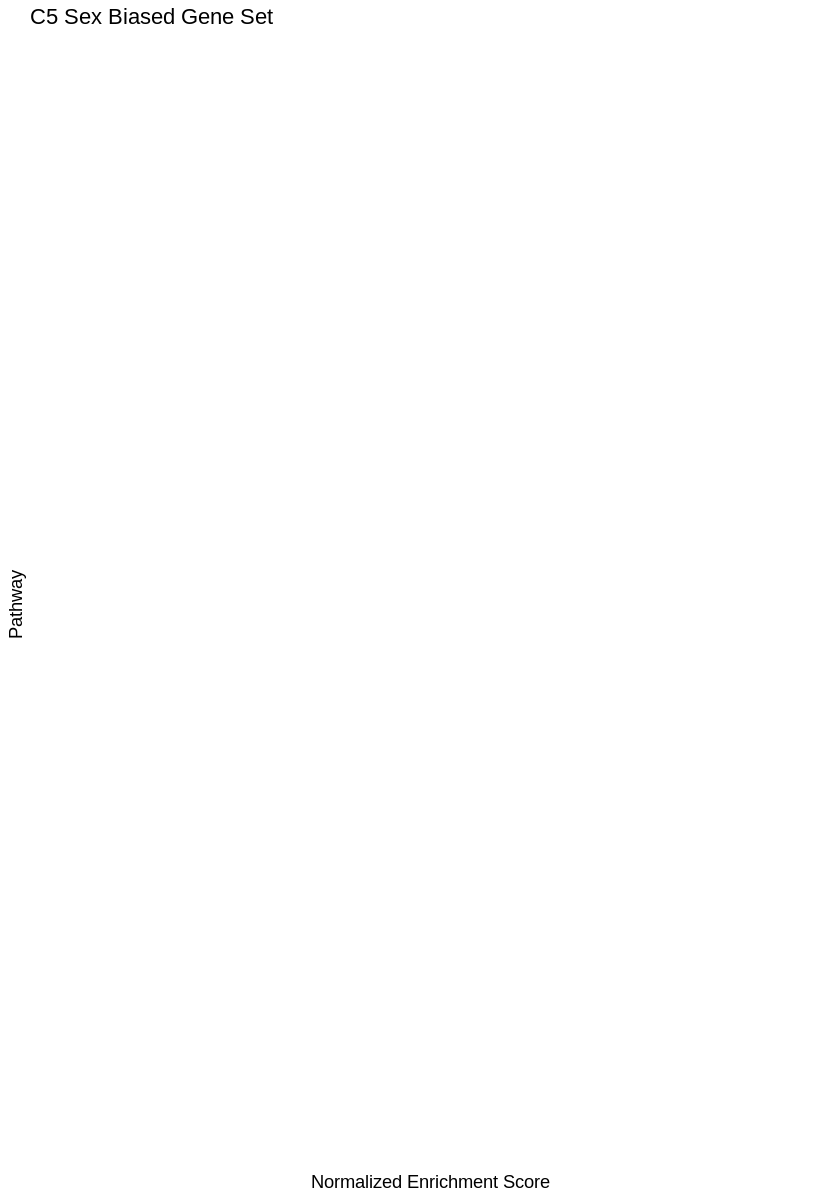

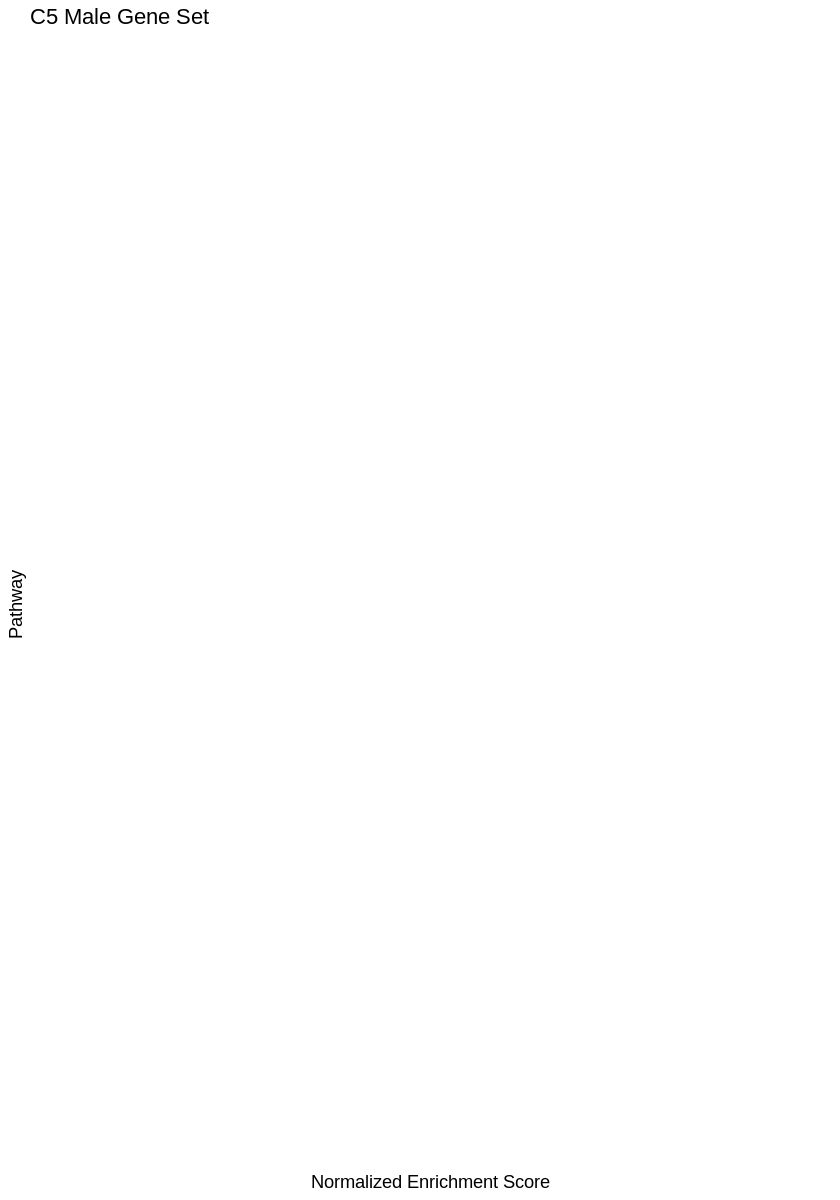

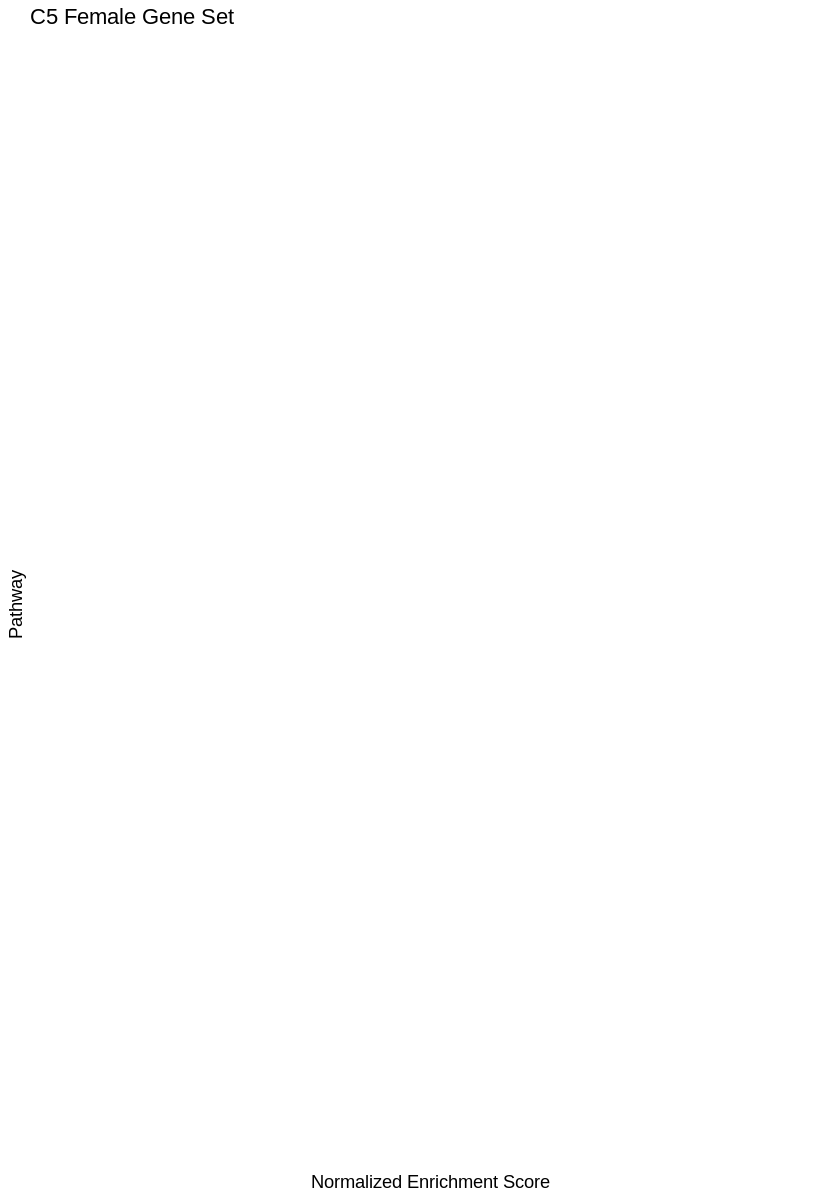

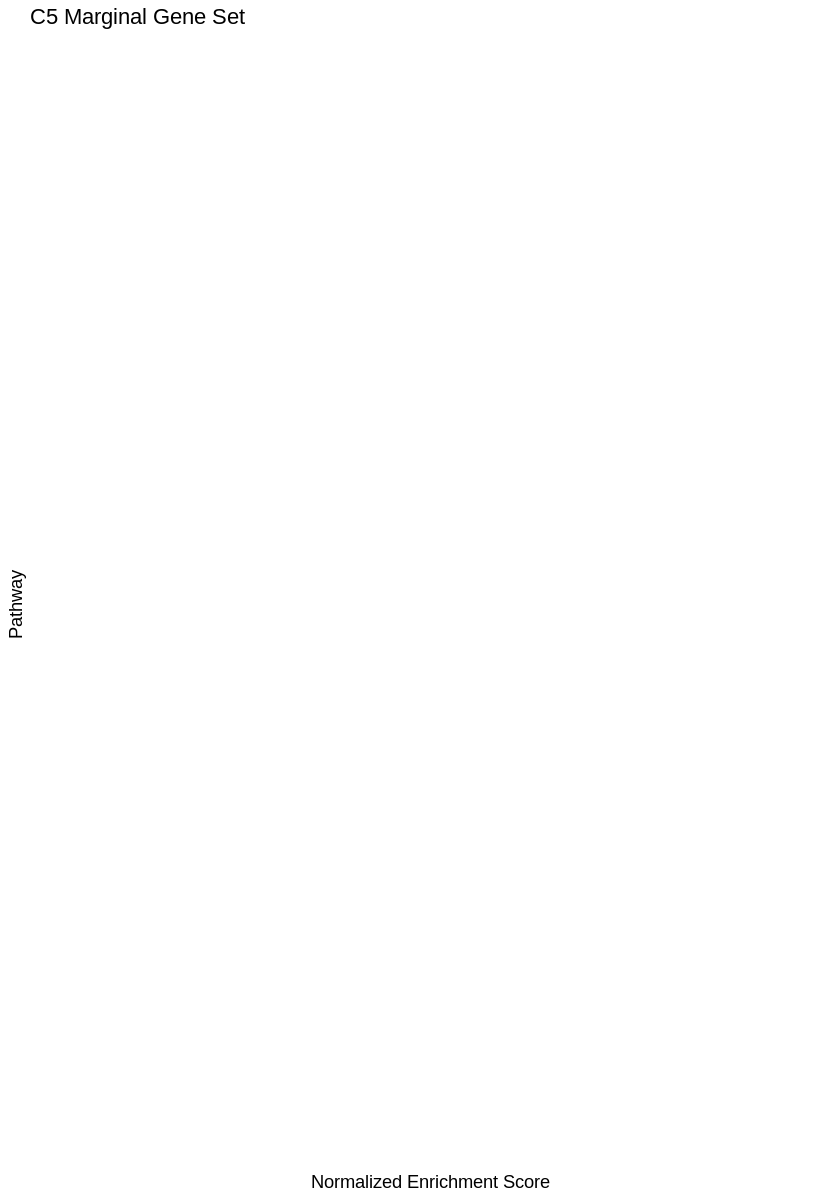

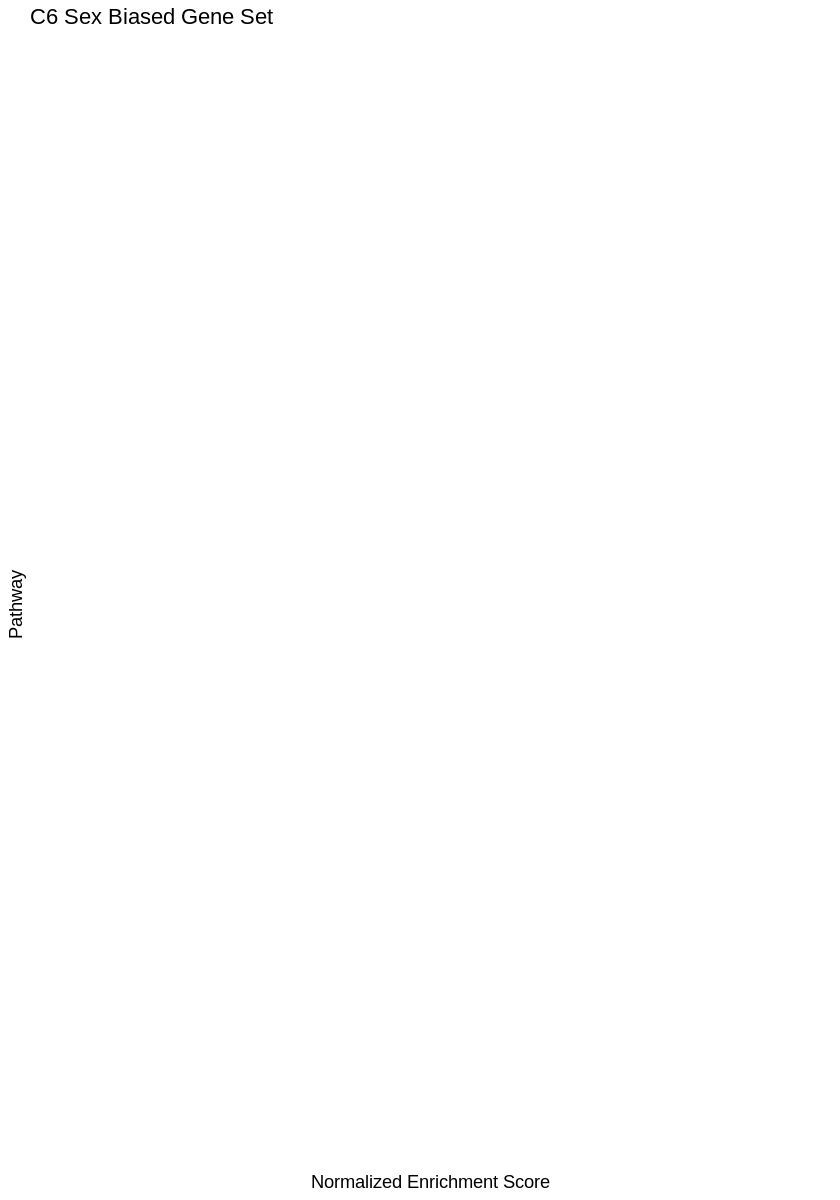

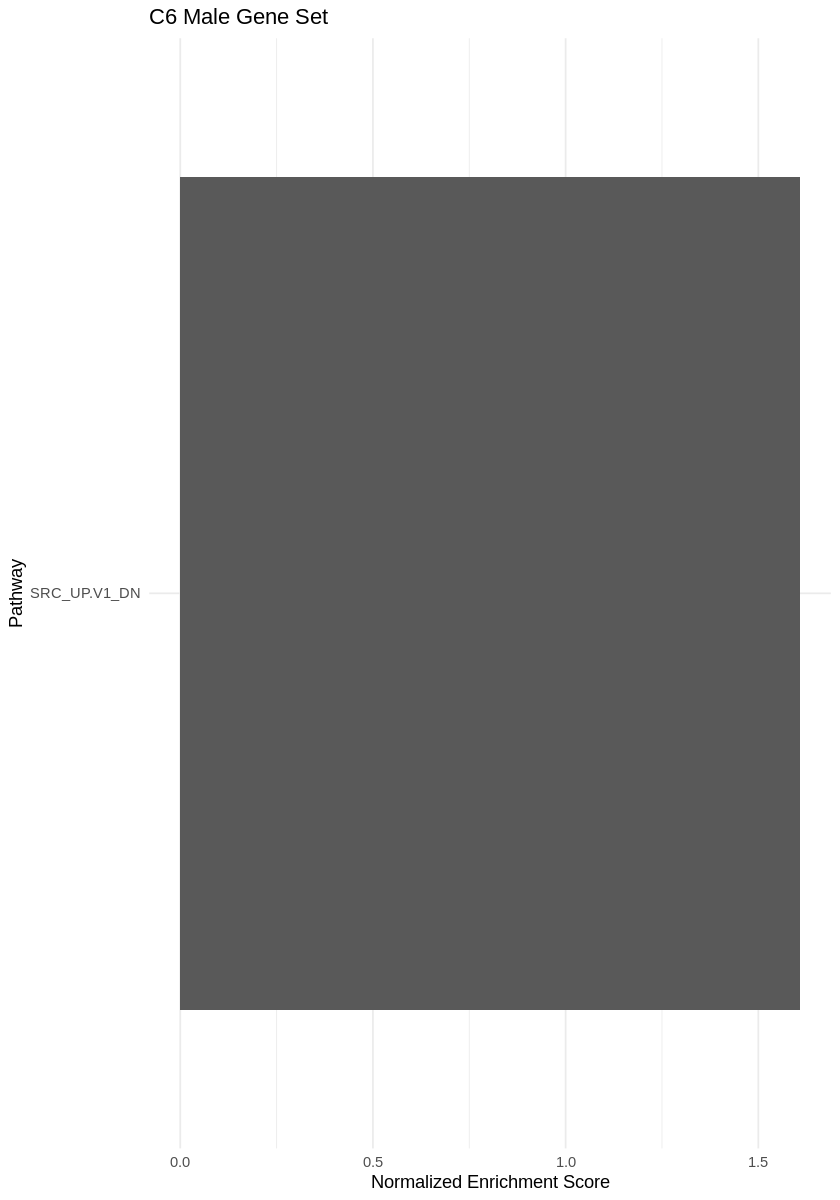

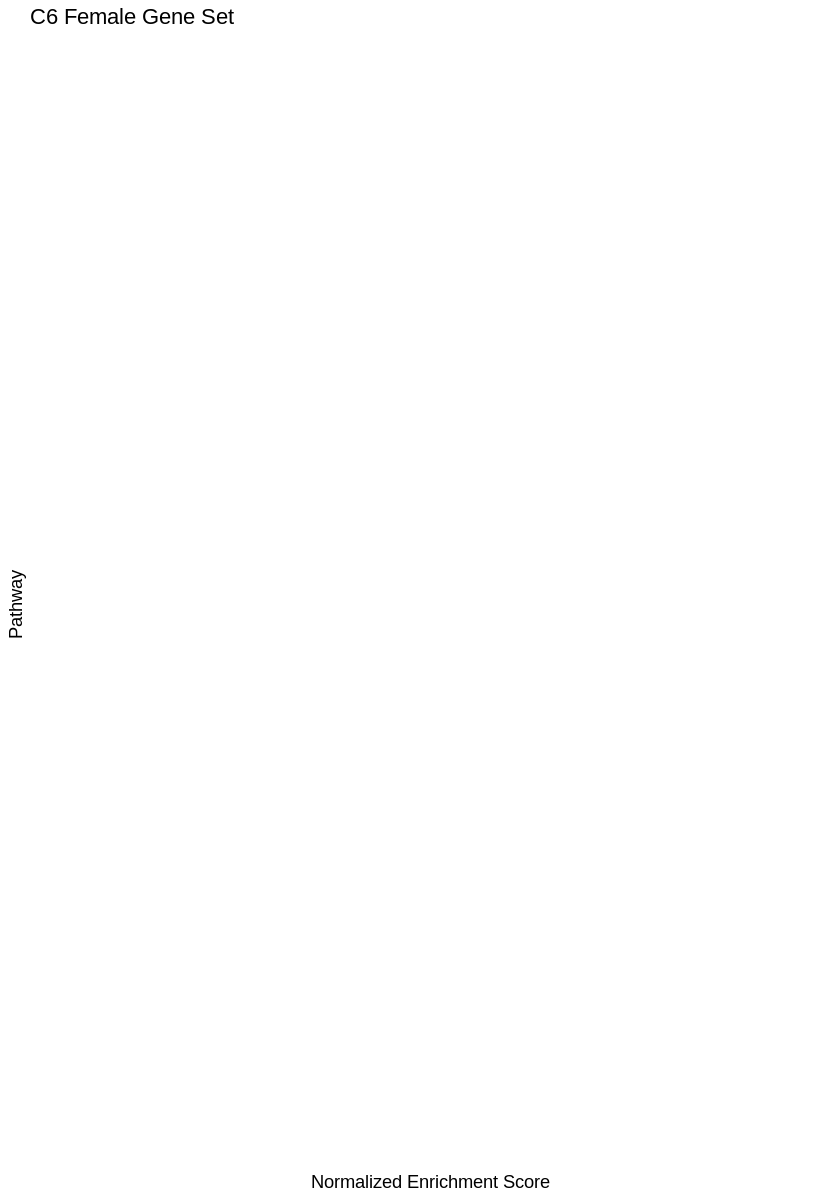

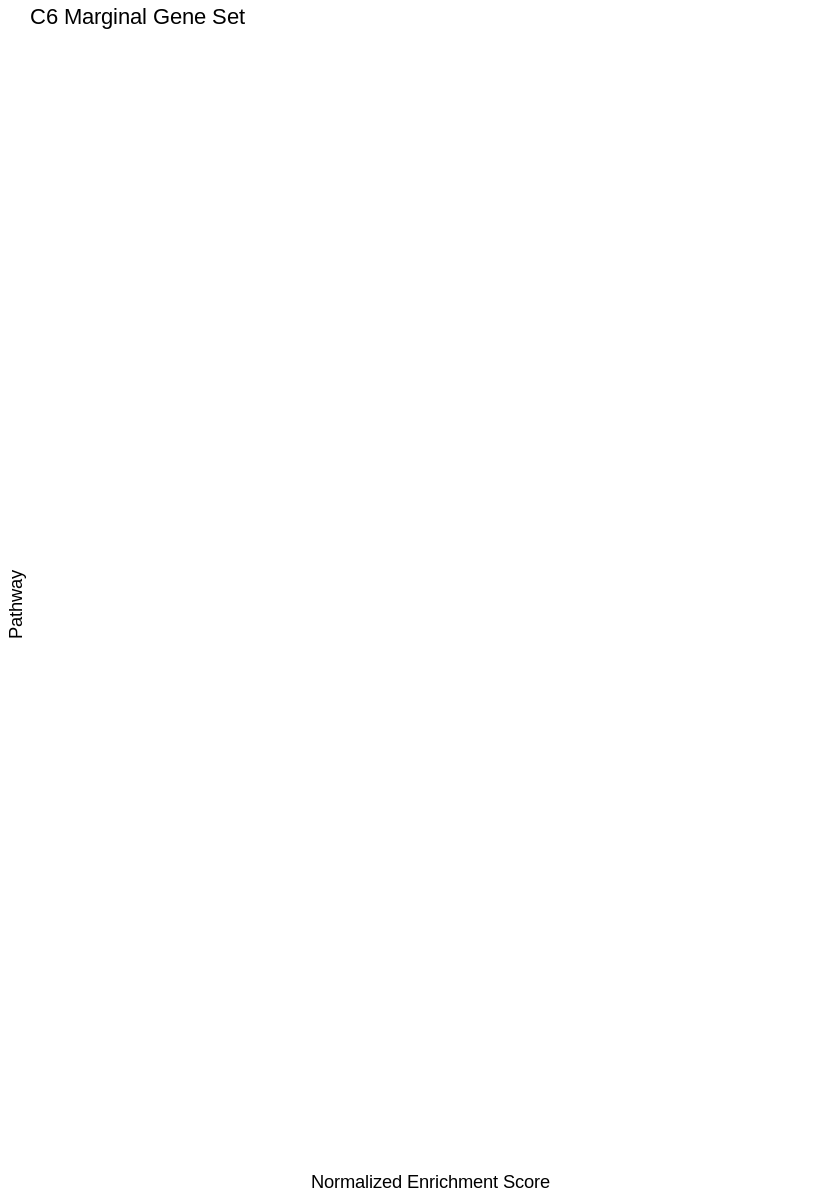

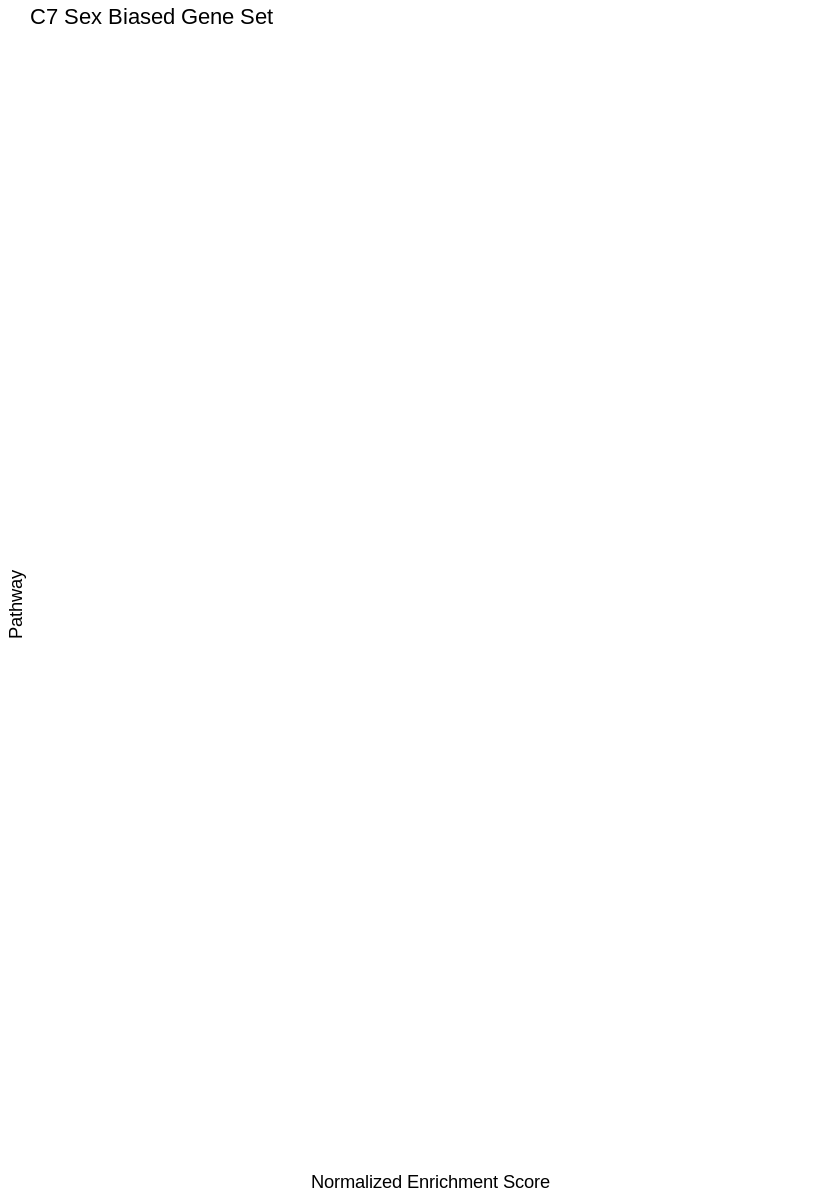

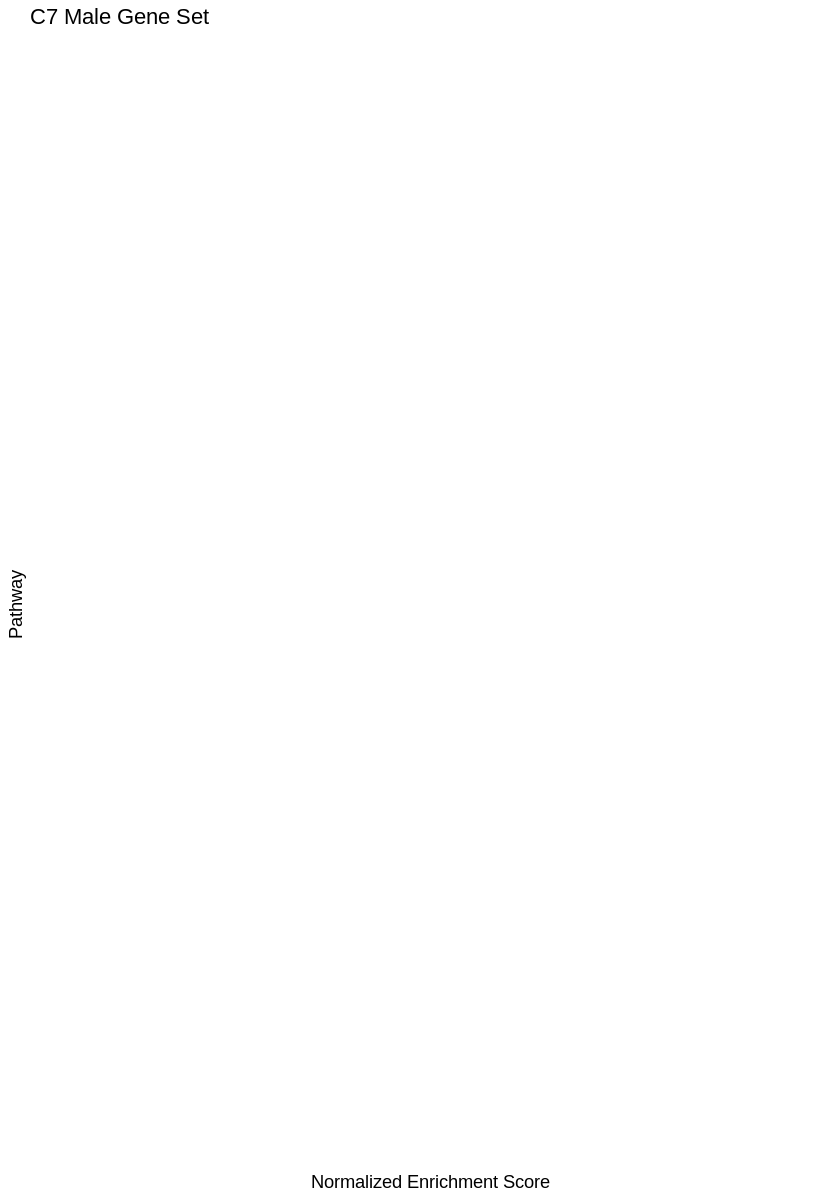

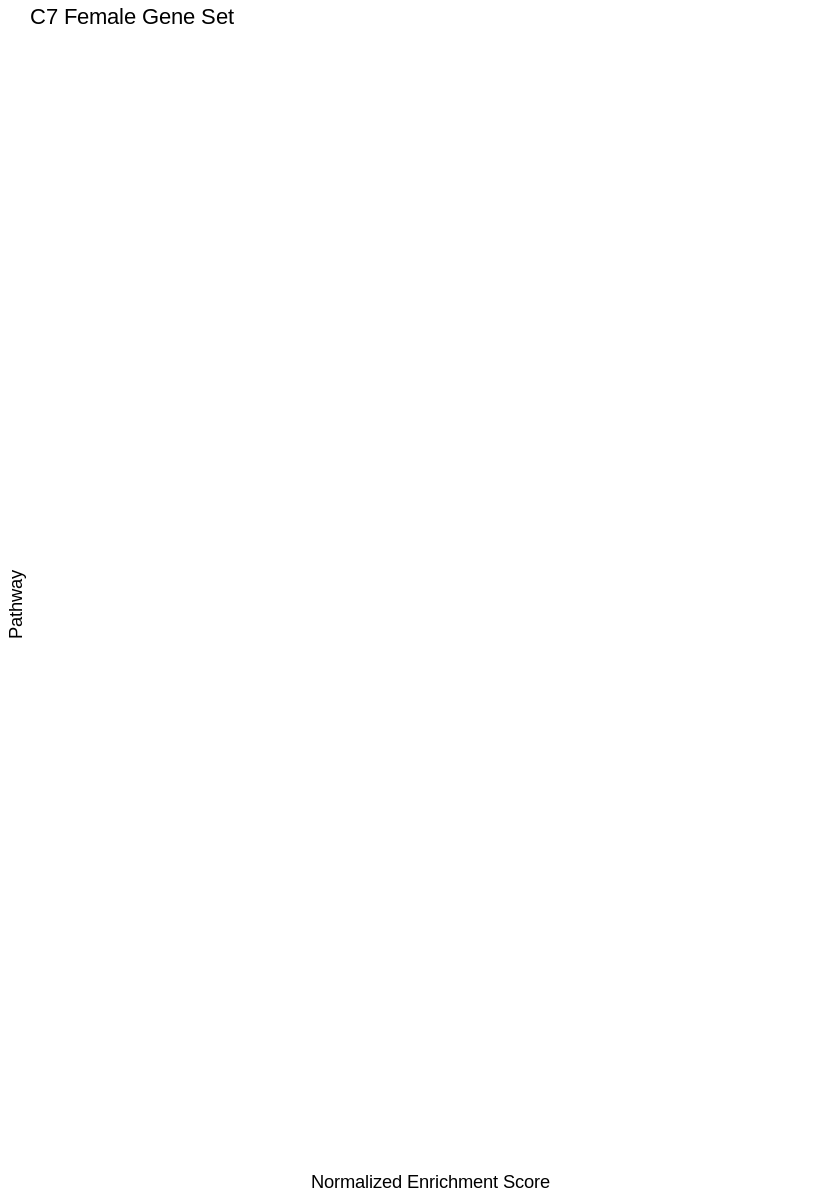

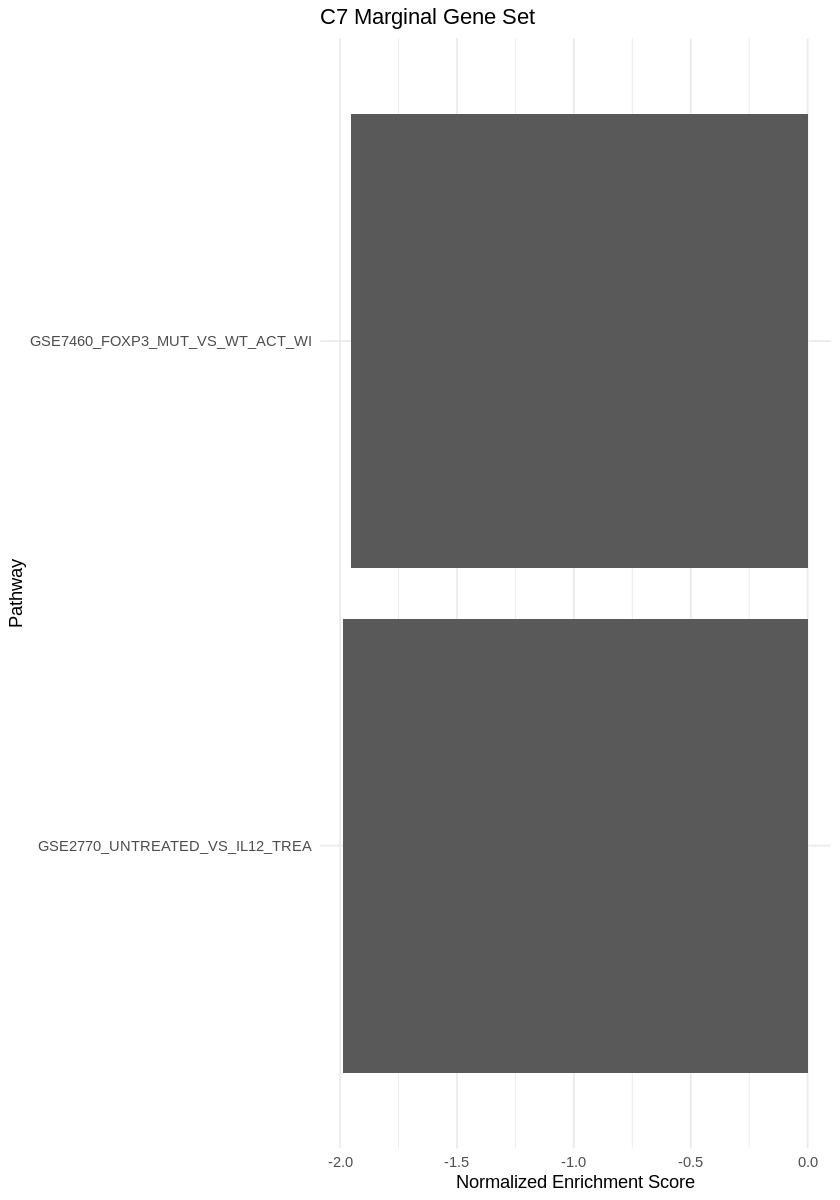

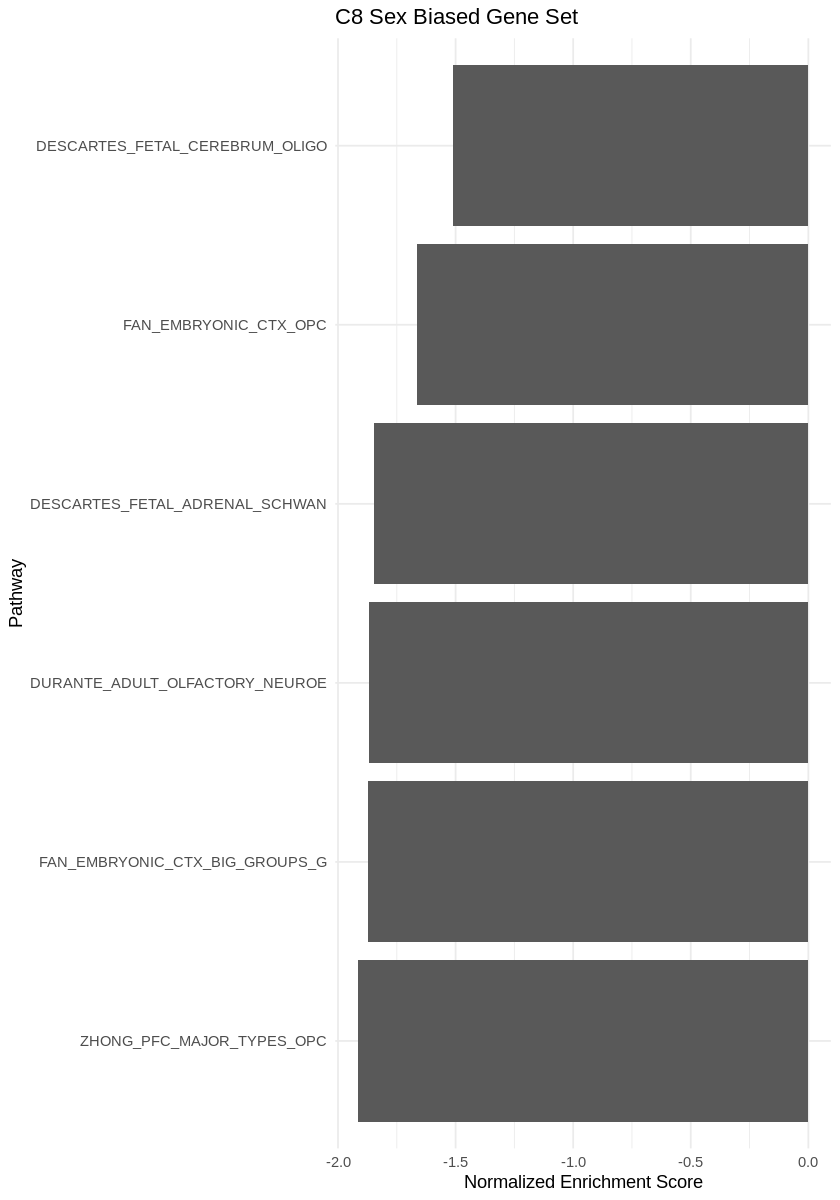

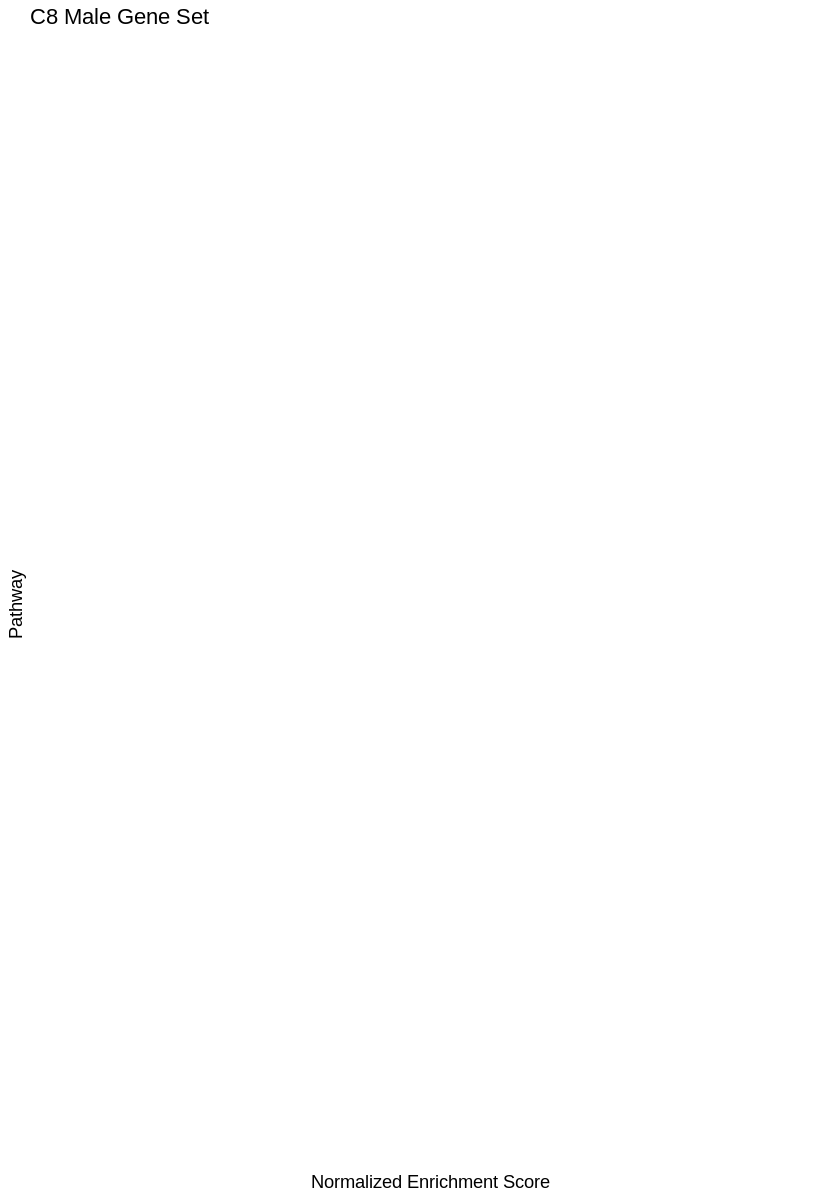

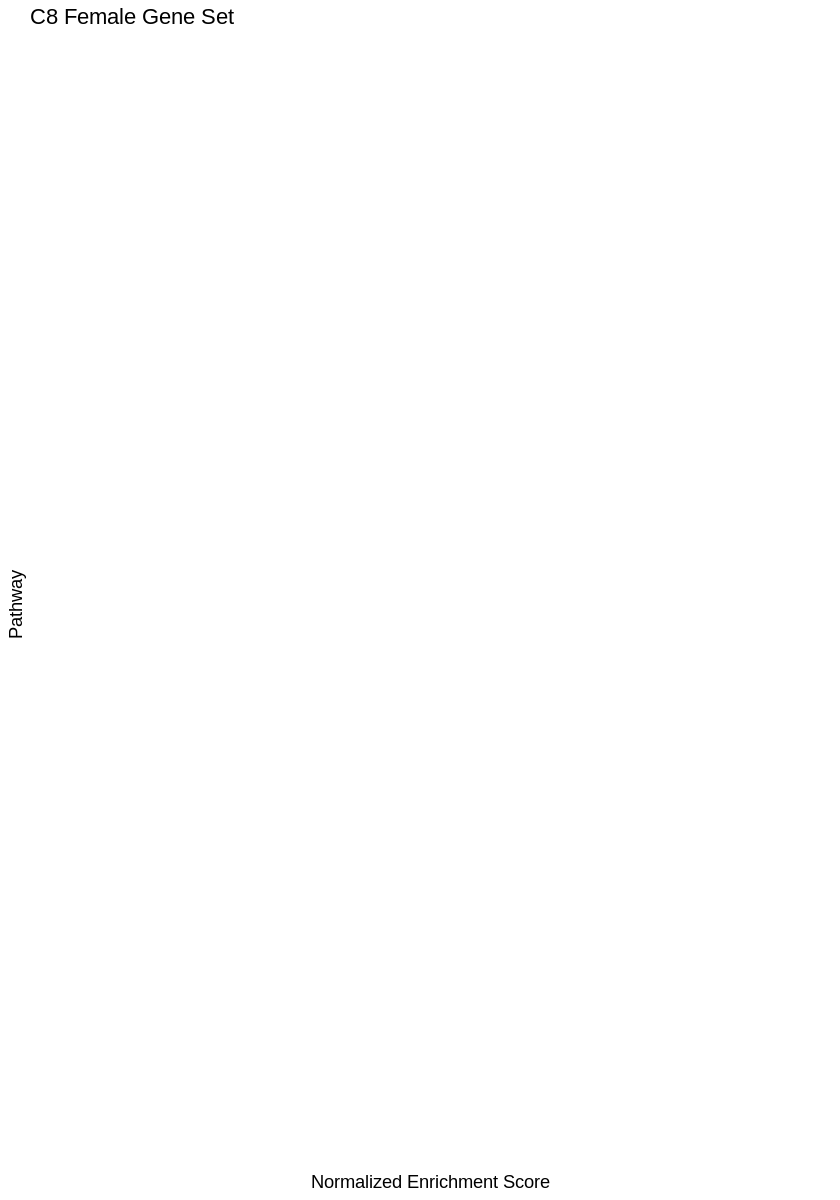

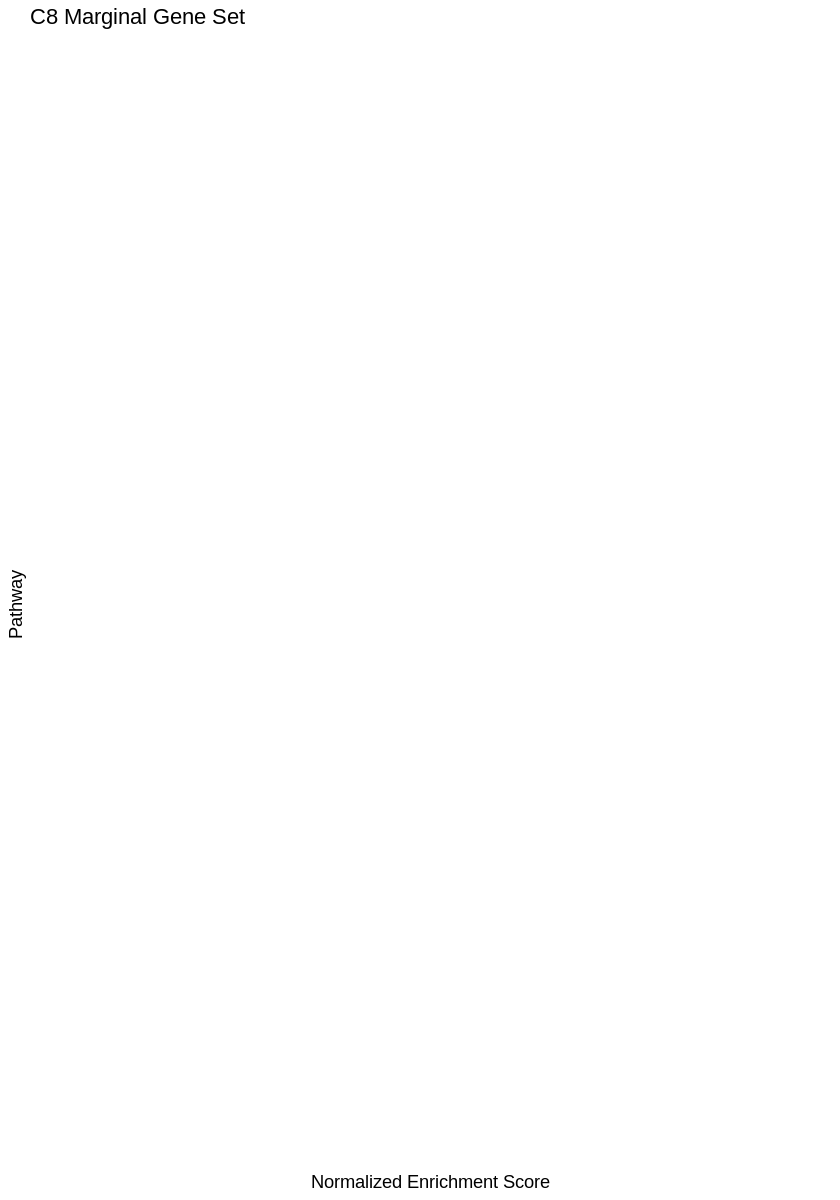

In [4]:
options(repr.plot.height=10,repr.plot.width=7)
plot_gsea <- function(gsea_res, title){
    p <- ggplot(gsea_res %>% as_tibble() %>% mutate(pathway = factor(abbreviate(pathway,minlength = 30,strict = T))) %>% filter(padj < 0.25), aes(reorder(pathway, NES), NES)) +
        geom_col() +
        coord_flip() +
        labs(x="Pathway", y="Normalized Enrichment Score",
        title="Hallmark pathways NES from GSEA") + 
        theme_minimal() +
        ggtitle(title)

    print(p)
}
sex_ranked <- sex_biased %>%
    filter(UCSC_RefGene_Name != "") %>%
    mutate(UCSC_RefGene_Name = gsub(";.*","",UCSC_RefGene_Name)) %>%
    group_by(UCSC_RefGene_Name) %>%
    slice(which.min(`p-value`)) %>%
    select(UCSC_RefGene_Name,beta) %>%
    deframe()
male_ranked <- sex_biased %>%
    filter(UCSC_RefGene_Name != "") %>%
    mutate(UCSC_RefGene_Name = gsub(";.*","",UCSC_RefGene_Name)) %>%
    group_by(UCSC_RefGene_Name) %>%
    slice(which.min(`p-value`)) %>%
    select(UCSC_RefGene_Name,aFC_m) %>%
    deframe()
female_ranked <- sex_biased %>%
    filter(UCSC_RefGene_Name != "") %>%
    mutate(UCSC_RefGene_Name = gsub(";.*","",UCSC_RefGene_Name)) %>%
    group_by(UCSC_RefGene_Name) %>%
    slice(which.min(`p-value`)) %>%
    select(UCSC_RefGene_Name,aFC_f) %>%
    deframe()
marginal_ranked <- marginal %>%
    filter(UCSC_RefGene_Name != "") %>%
    mutate(UCSC_RefGene_Name = gsub(";.*","",UCSC_RefGene_Name)) %>%
    group_by(UCSC_RefGene_Name) %>%
    slice(which.min(`p-value`)) %>%
    select(UCSC_RefGene_Name,beta) %>%
    deframe()
hallmarks <- gmtPathways("/arc/project/st-dennisjk-1/shared/data/msigdb/h.all.v7.4.symbols.gmt")
c_list <- lapply(1:8, function(d)gmtPathways(sprintf("/arc/project/st-dennisjk-1/shared/data/msigdb/c%d.all.v7.4.symbols.gmt",d)))
print("hallmarks")
plot_gsea(fgsea(pathways=hallmarks,stats=sex_ranked),"GSEA Hallmarks Sex Biased")
plot_gsea(fgsea(pathways=hallmarks,stats=male_ranked),"GSEA Hallmarks Male")
plot_gsea(fgsea(pathways=hallmarks,stats=female_ranked),"GSEA Hallmarks Female")
plot_gsea(fgsea(pathways=hallmarks,stats=marginal_ranked),"GSEA Hallmarks marginal")
template <- "C%d %s Gene Set"
for(i in 1:length(c_list)){
    elem <- c_list[[i]]
    plot_gsea(fgsea(pathways=elem,stats=sex_ranked), sprintf(template,i,"Sex Biased"))
    plot_gsea(fgsea(pathways=elem,stats=male_ranked), sprintf(template,i,"Male"))
    plot_gsea(fgsea(pathways=elem,stats=female_ranked), sprintf(template,i,"Female"))
    plot_gsea(fgsea(pathways=elem,stats=marginal_ranked), sprintf(template,i,"Marginal"))
}

[1] "hallmarks"


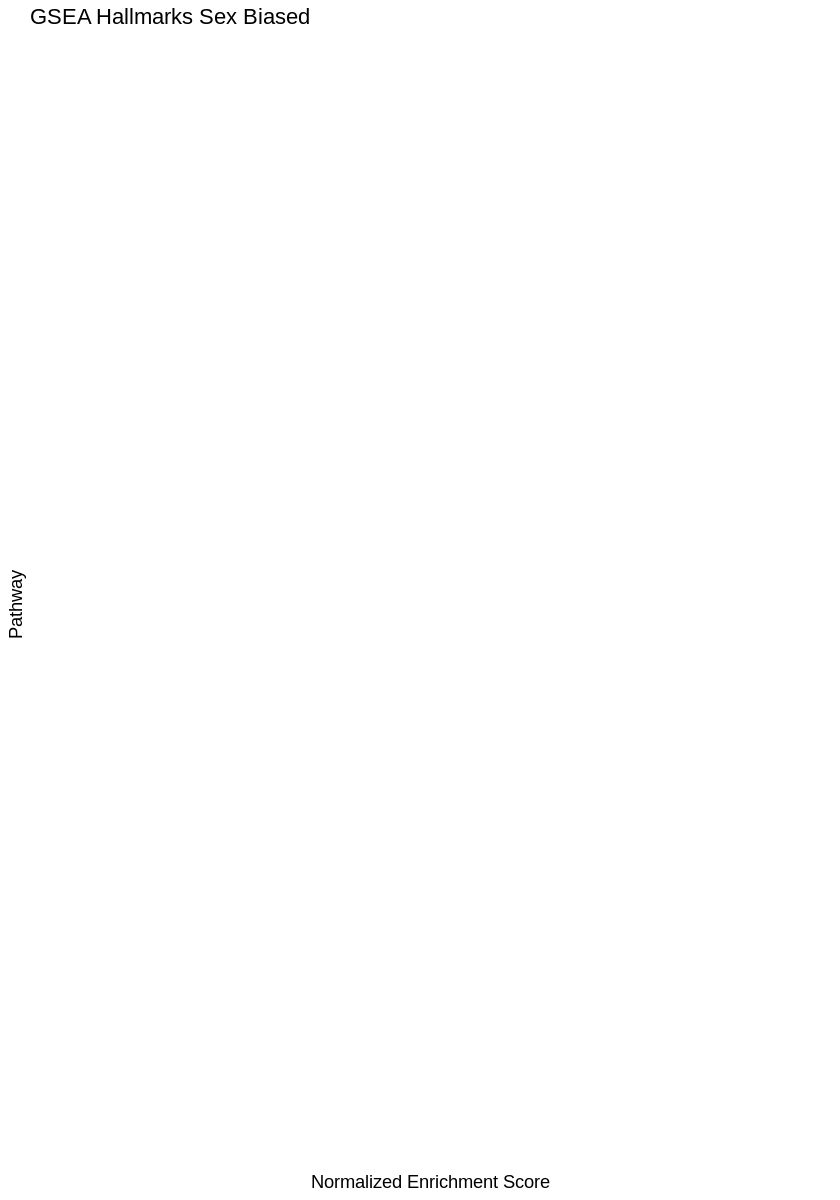

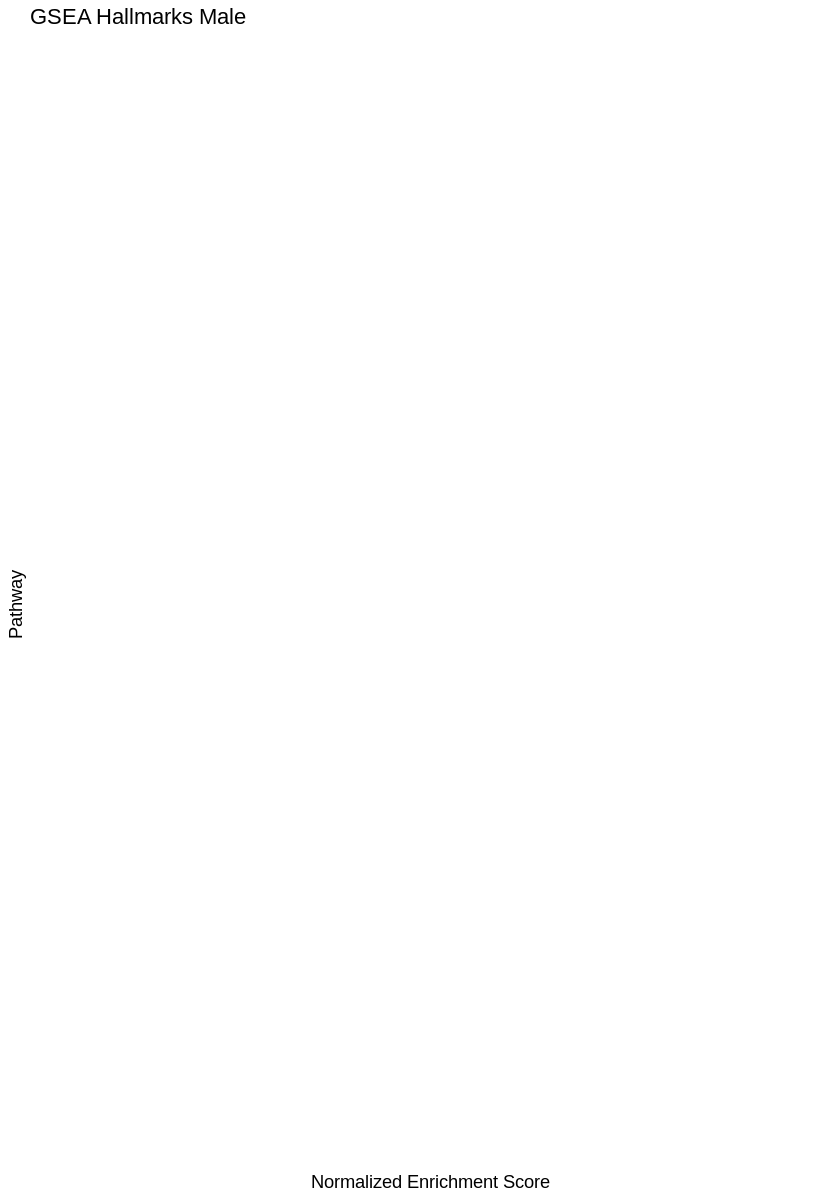

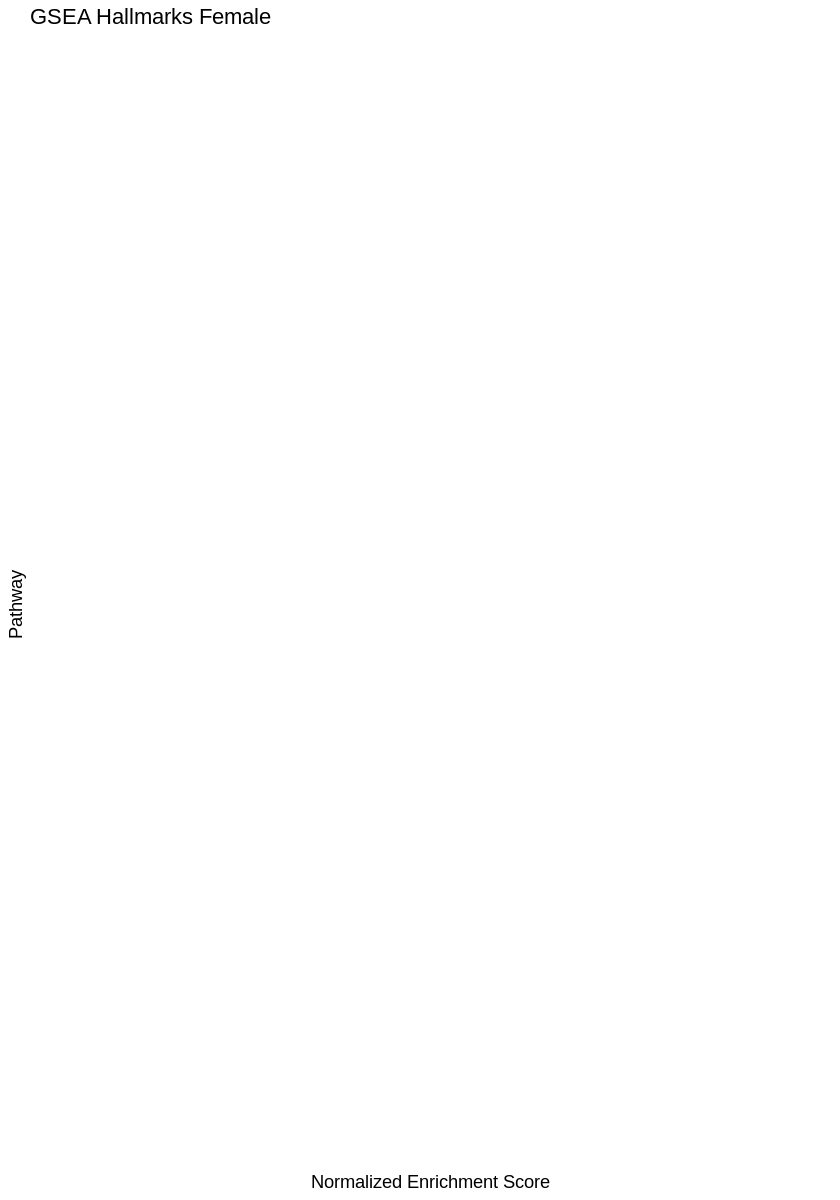

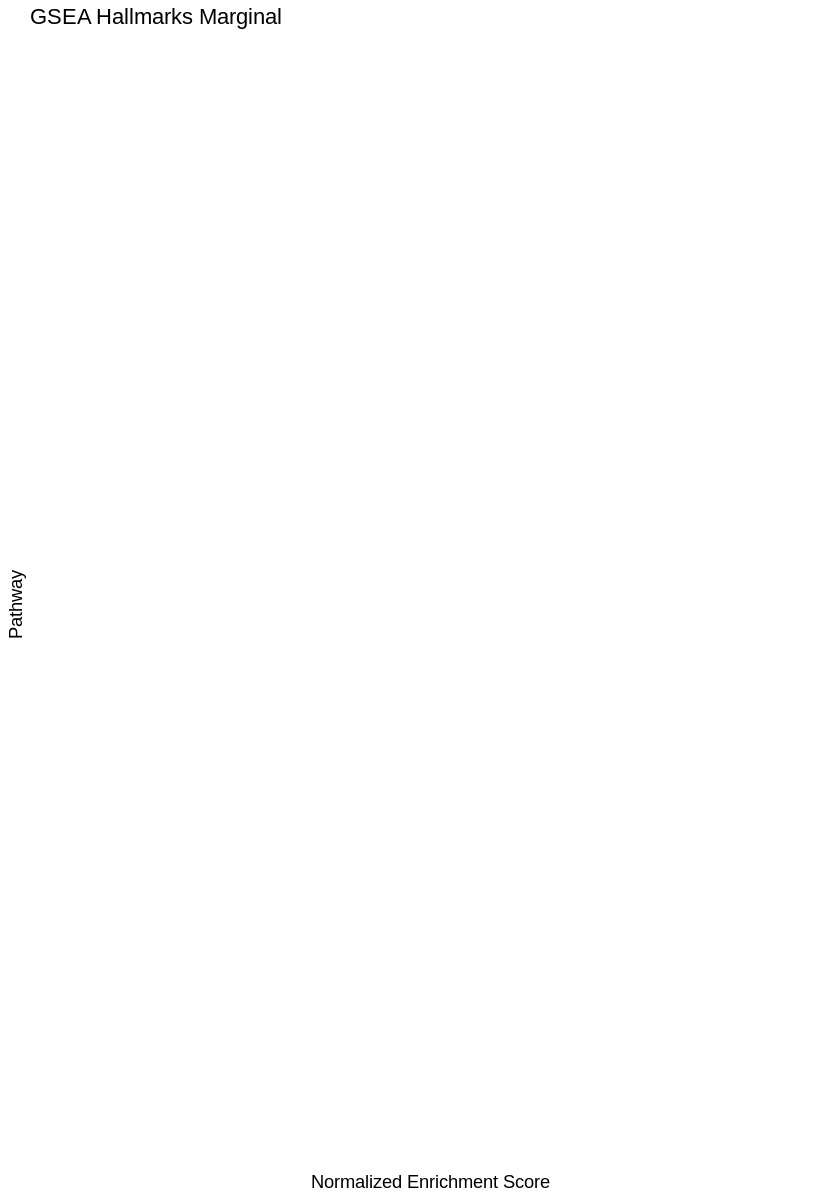

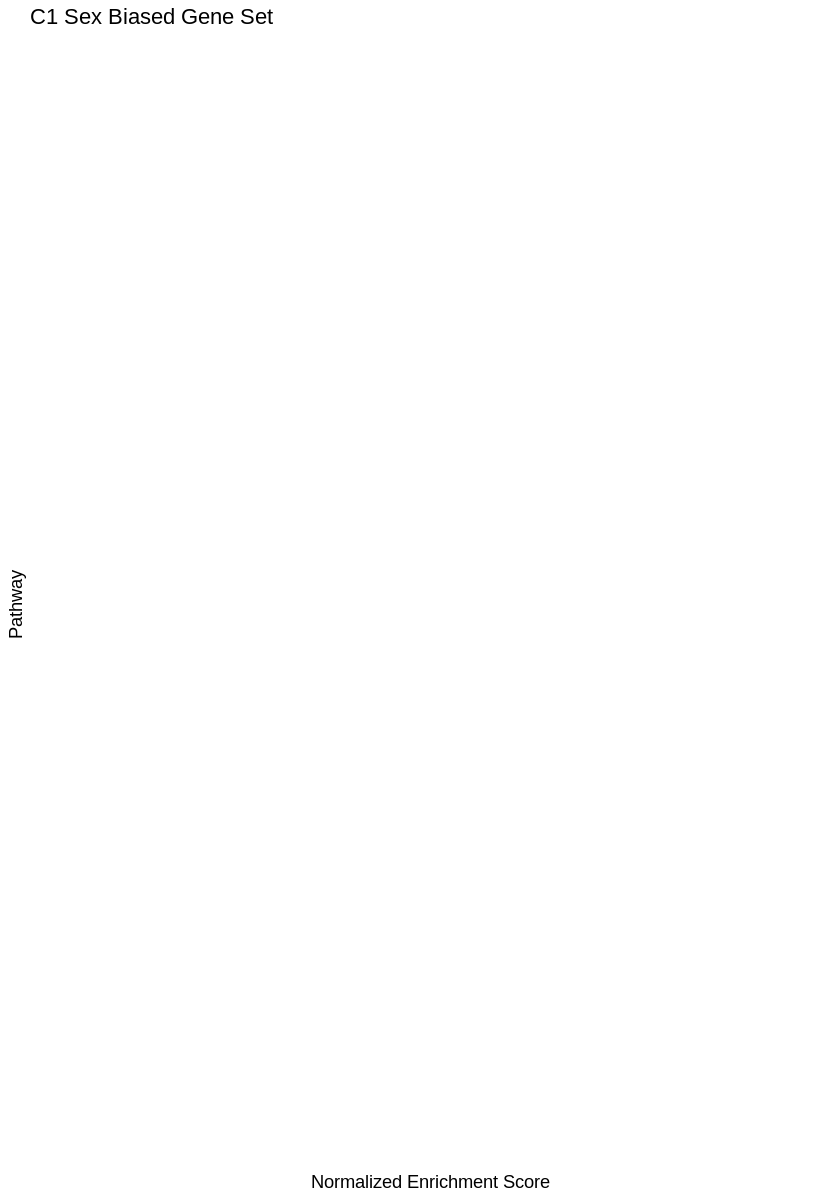

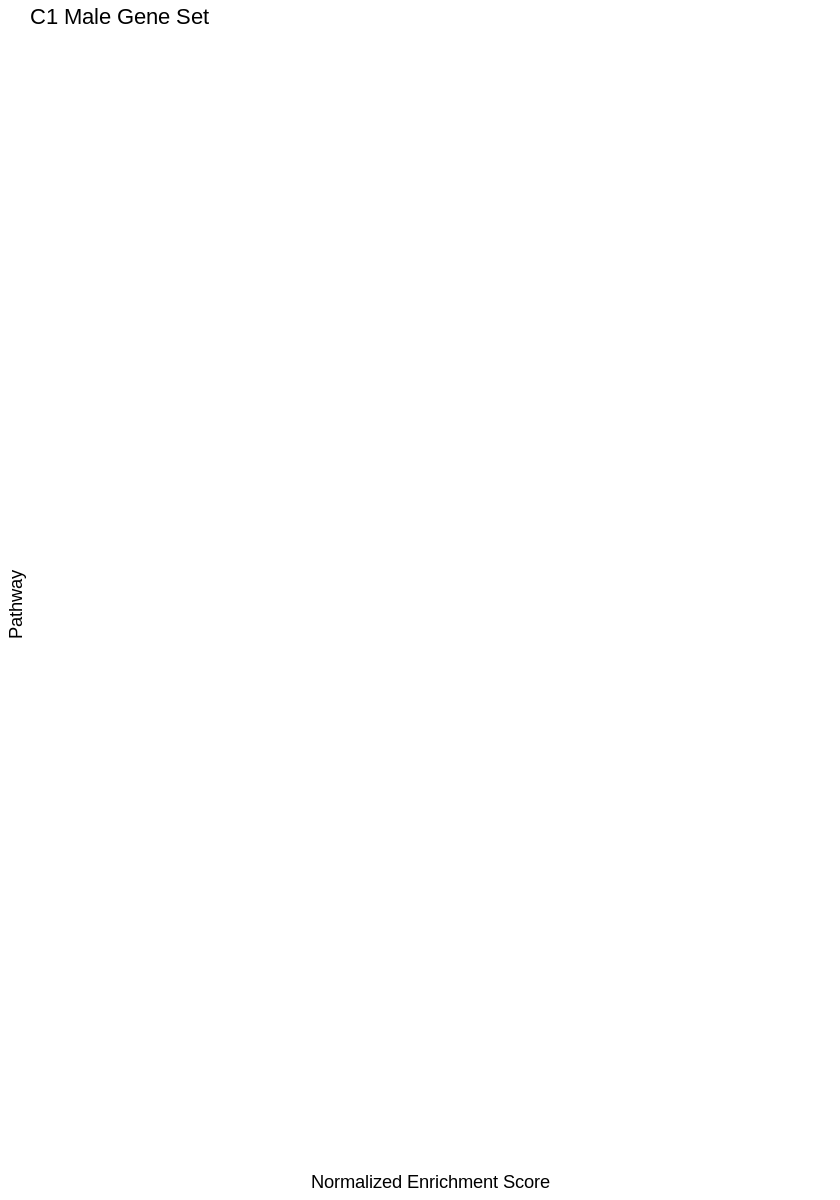

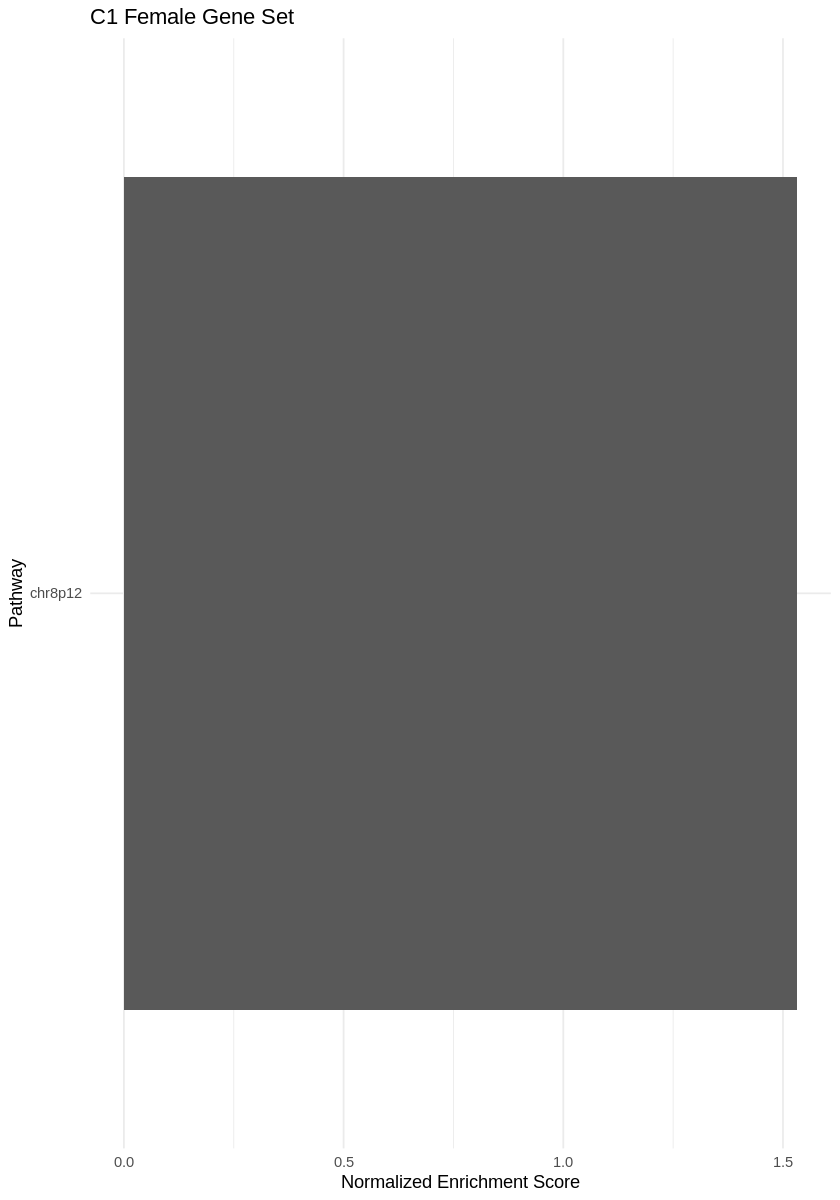

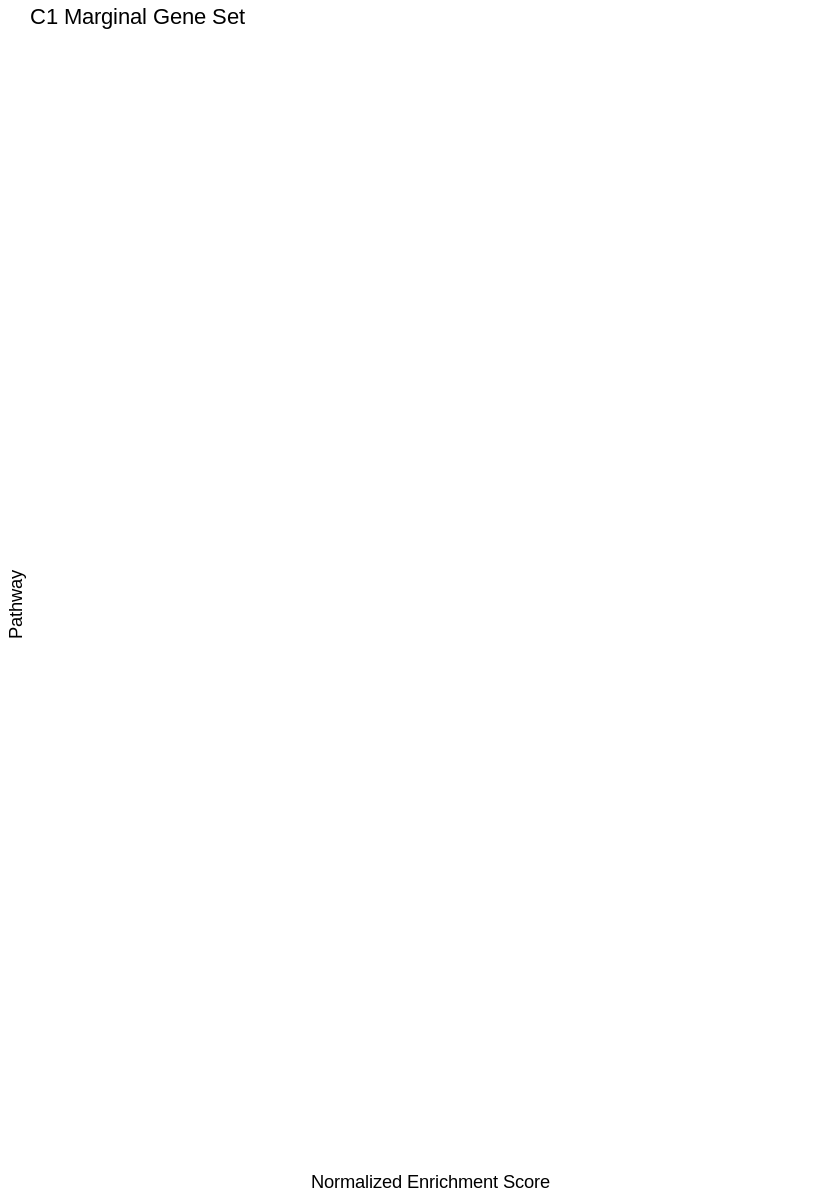

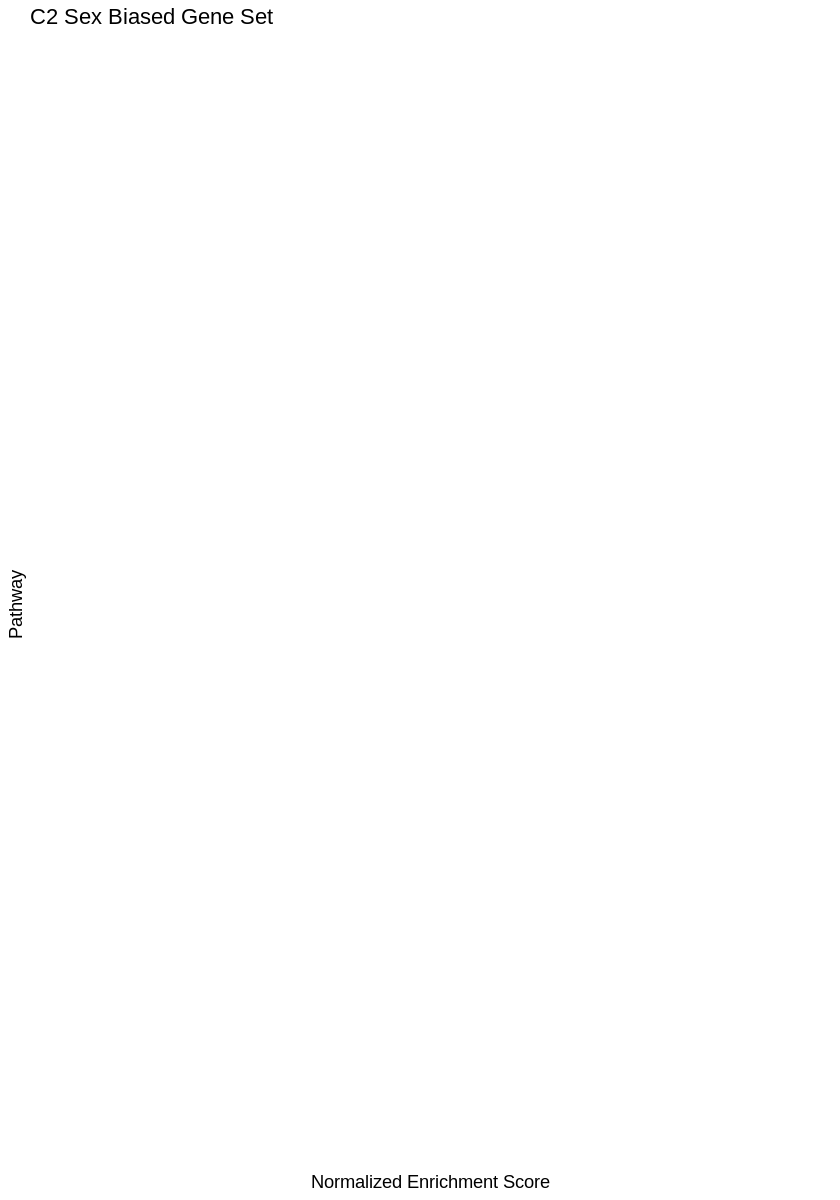

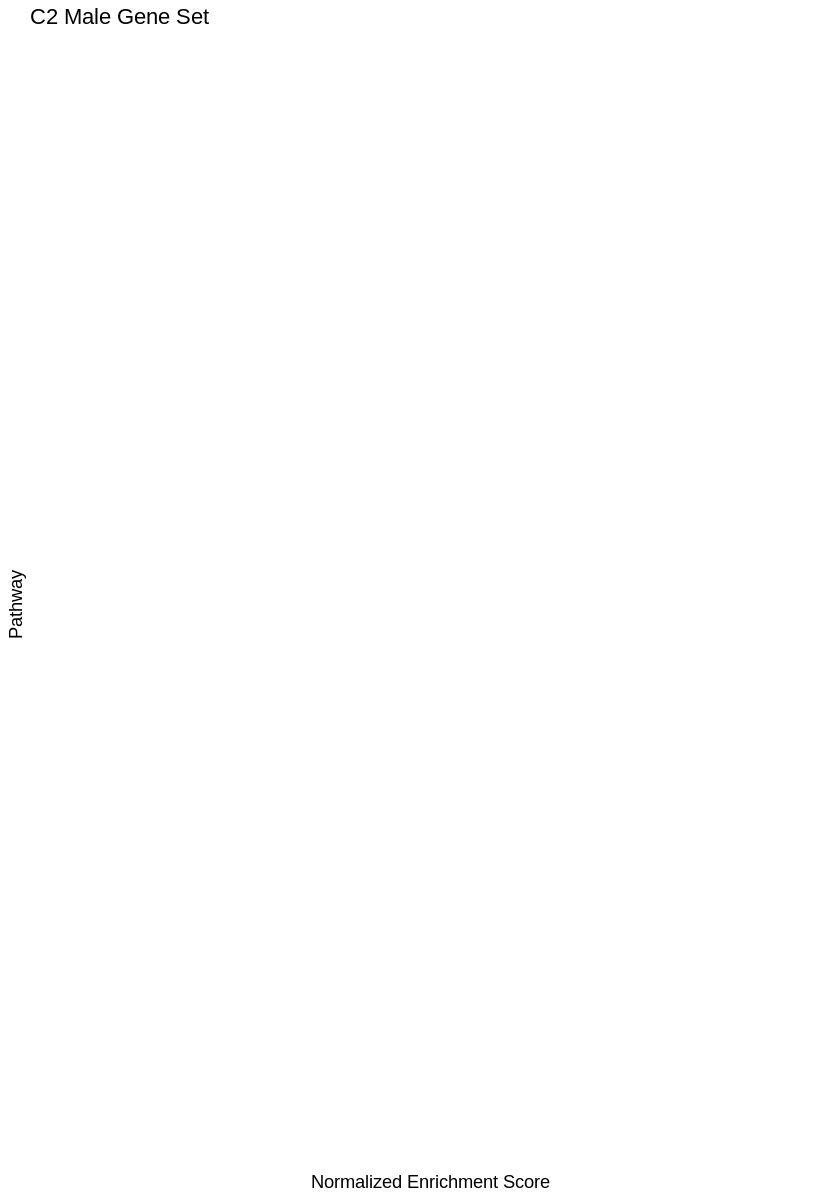

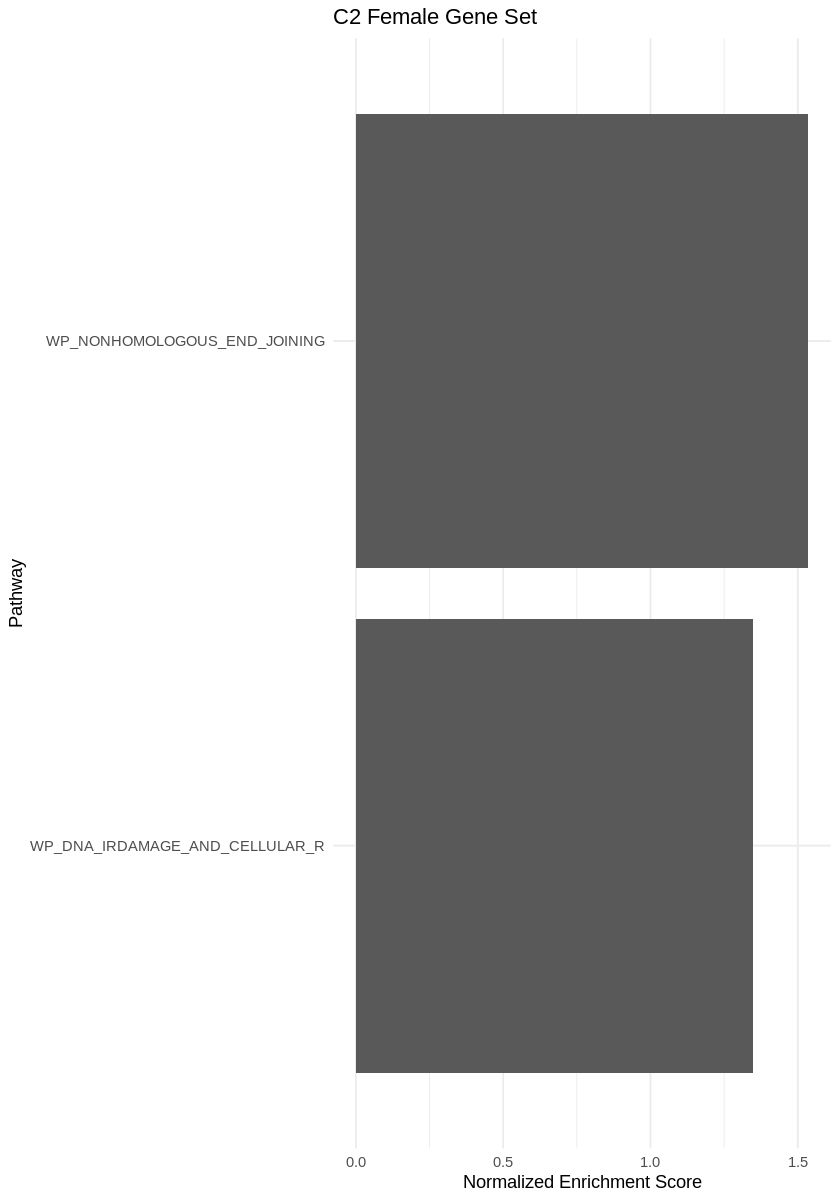

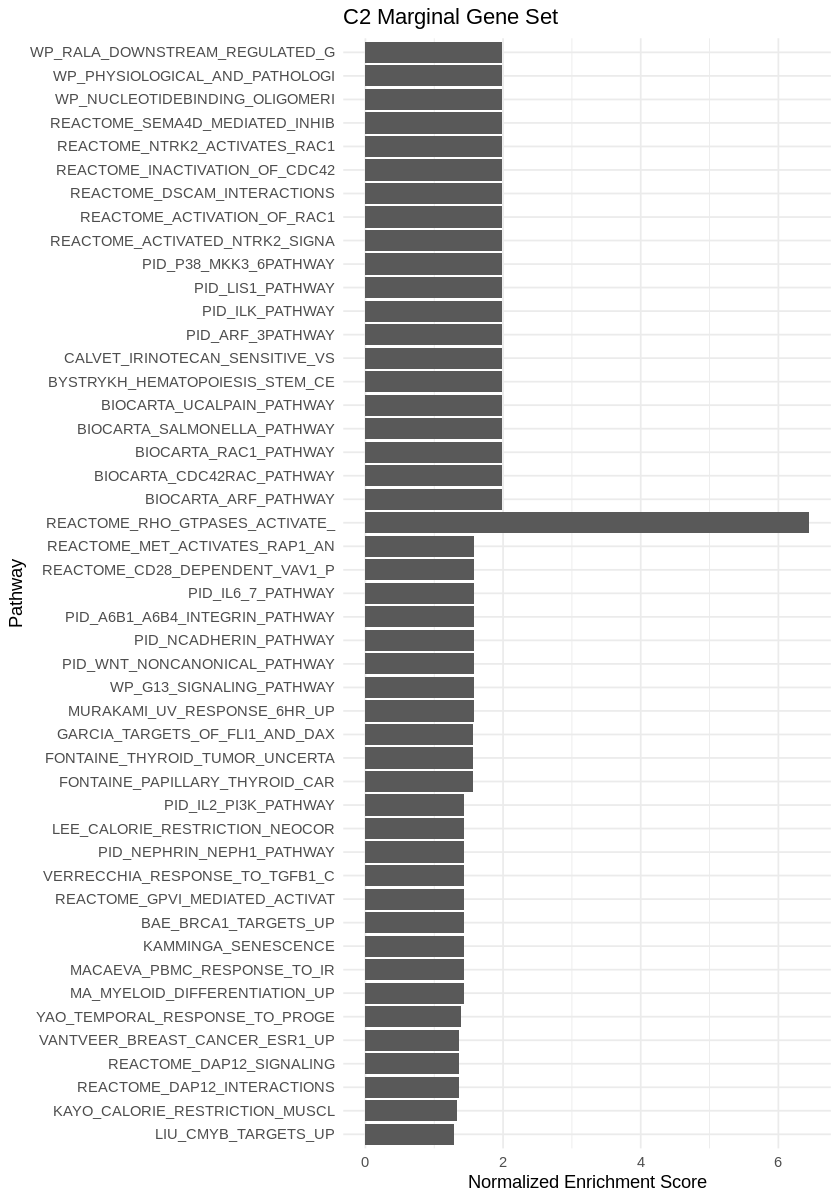

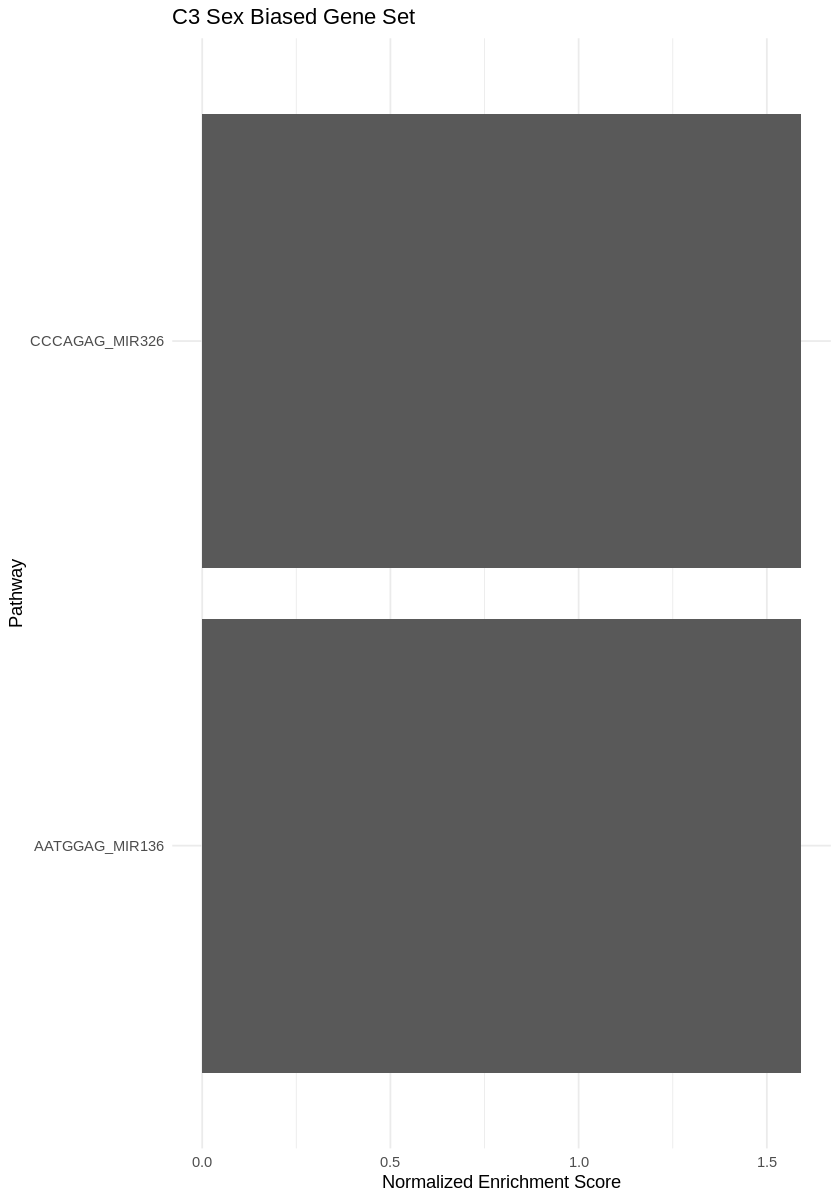

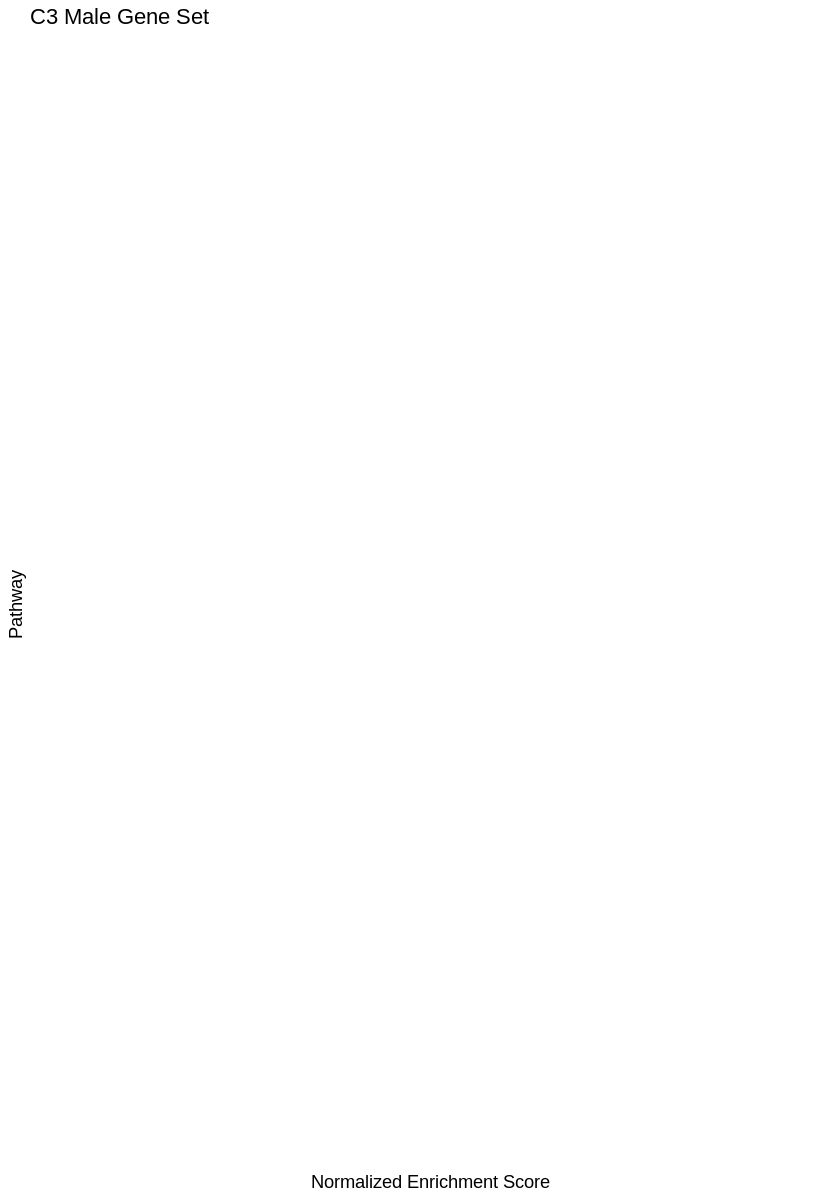

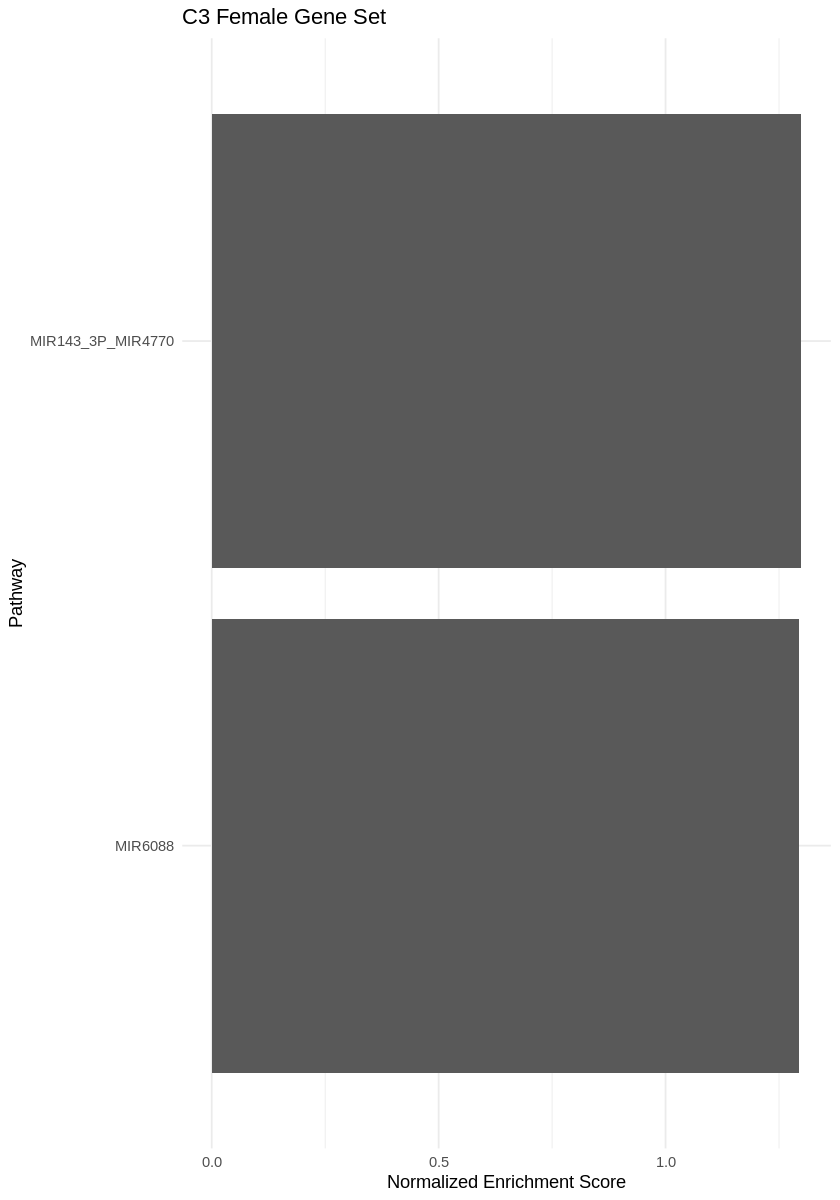

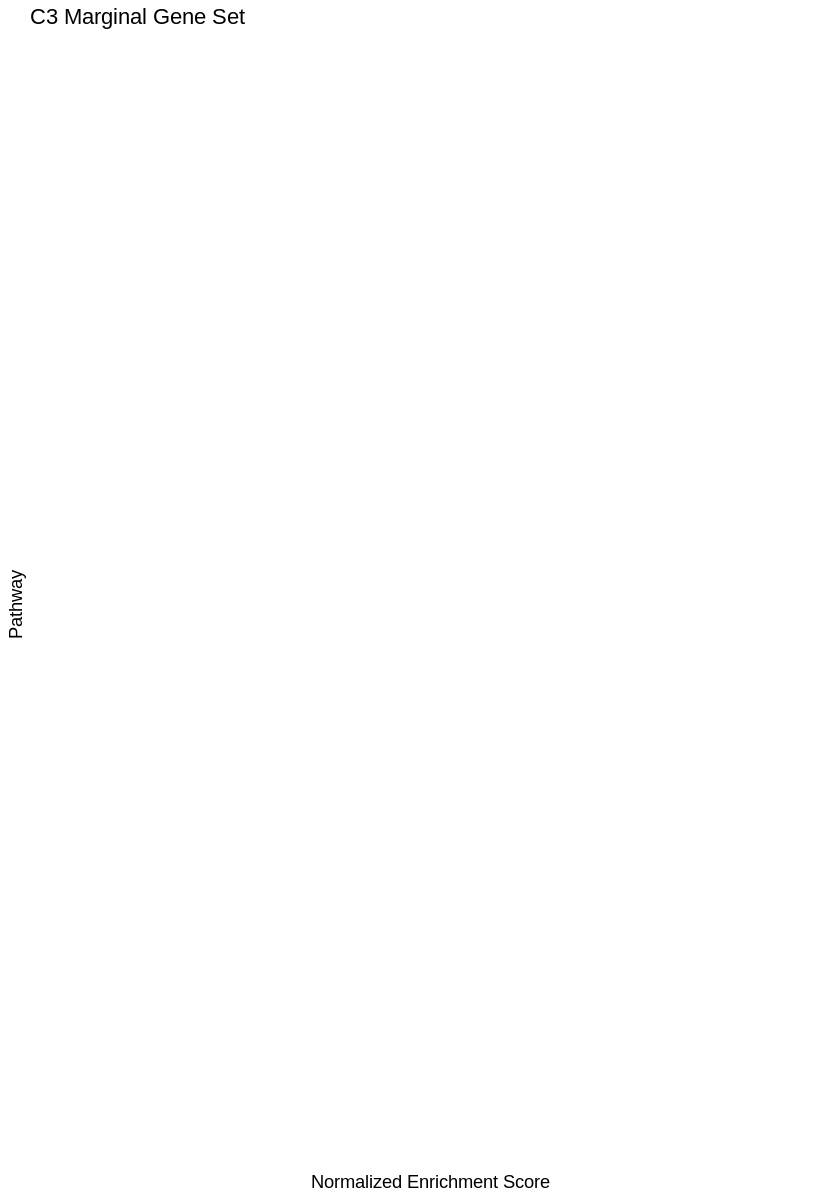

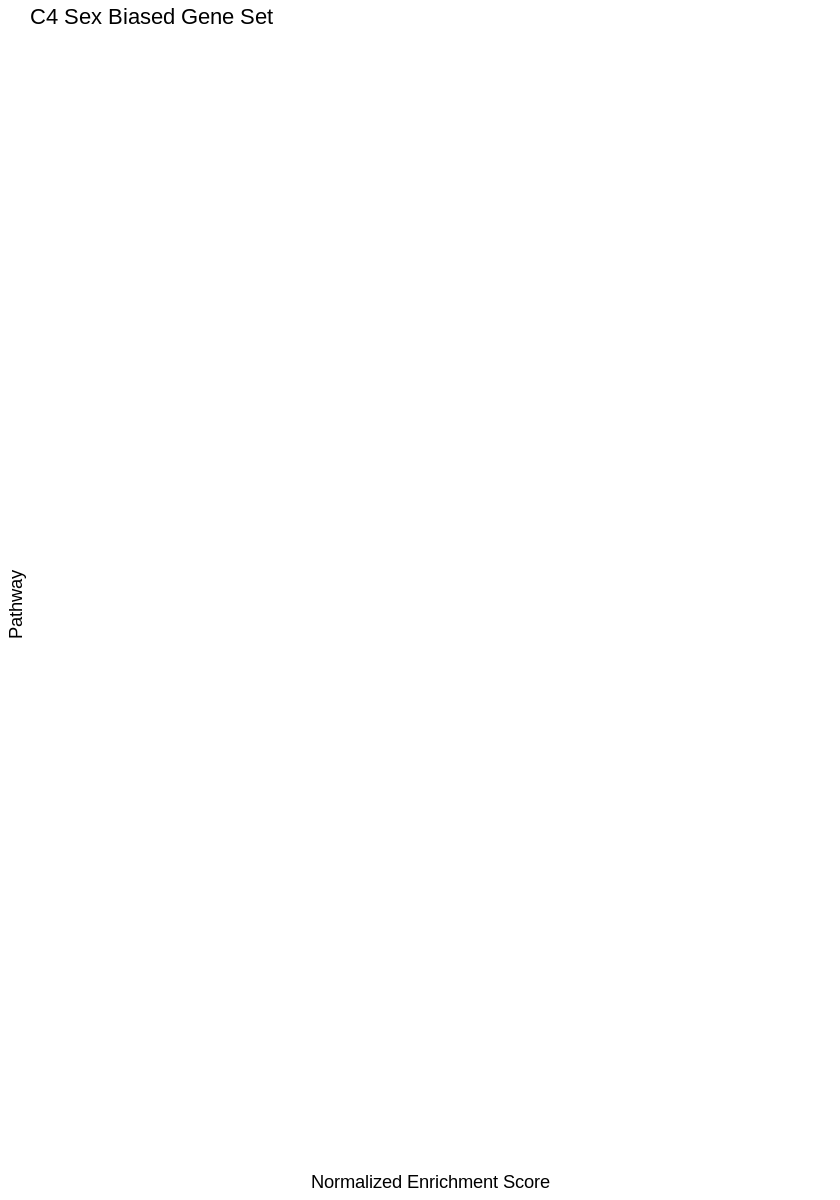

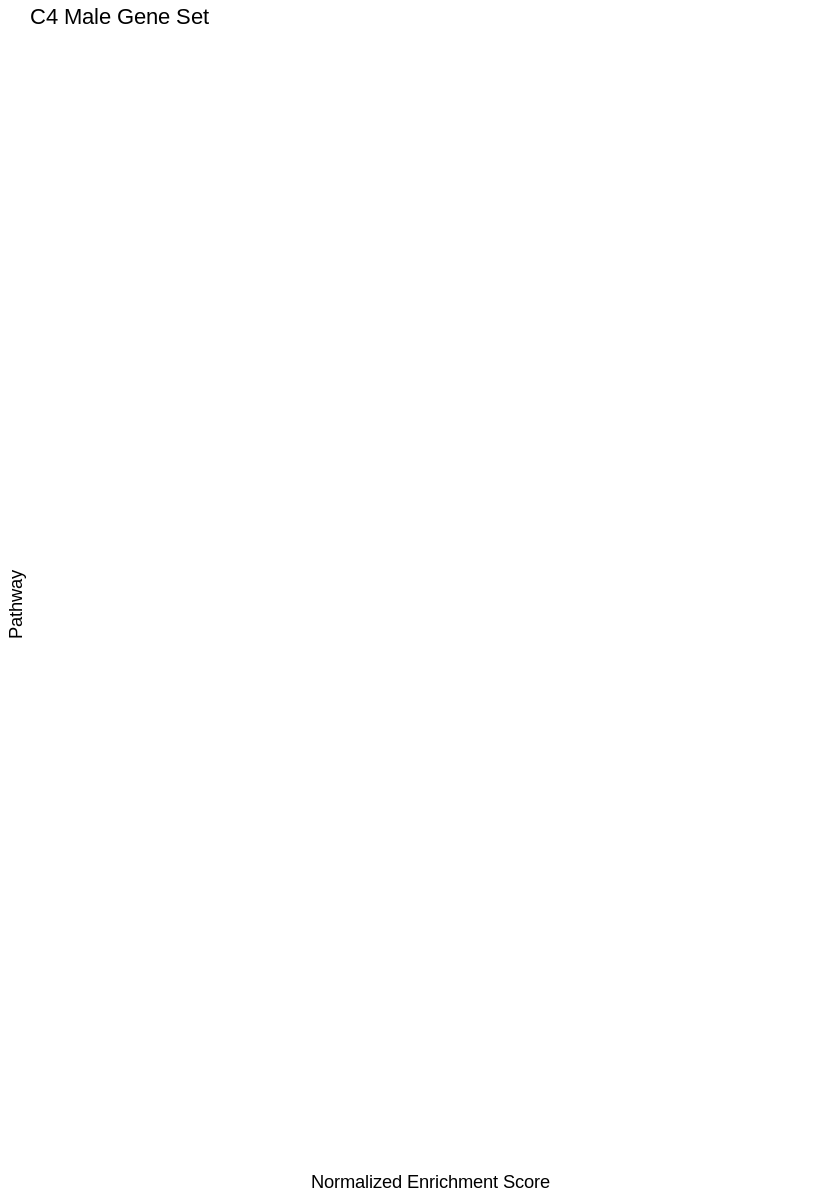

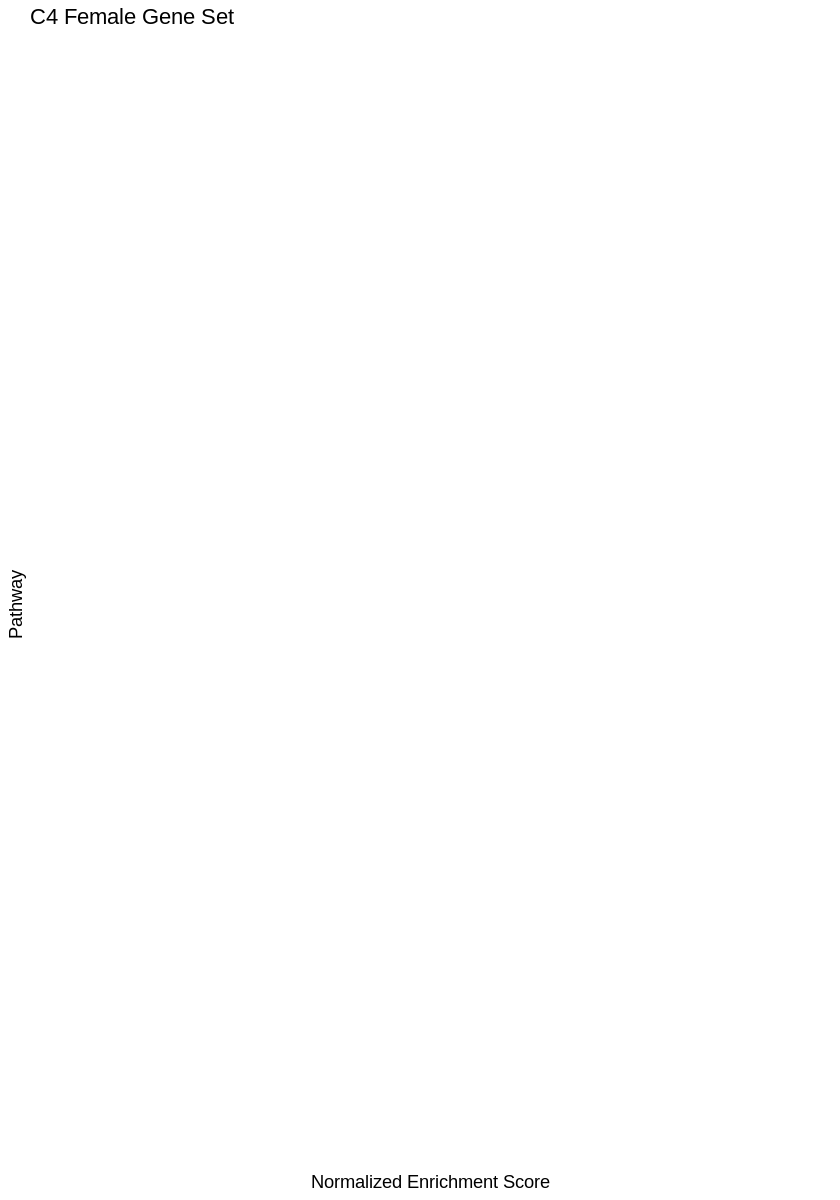

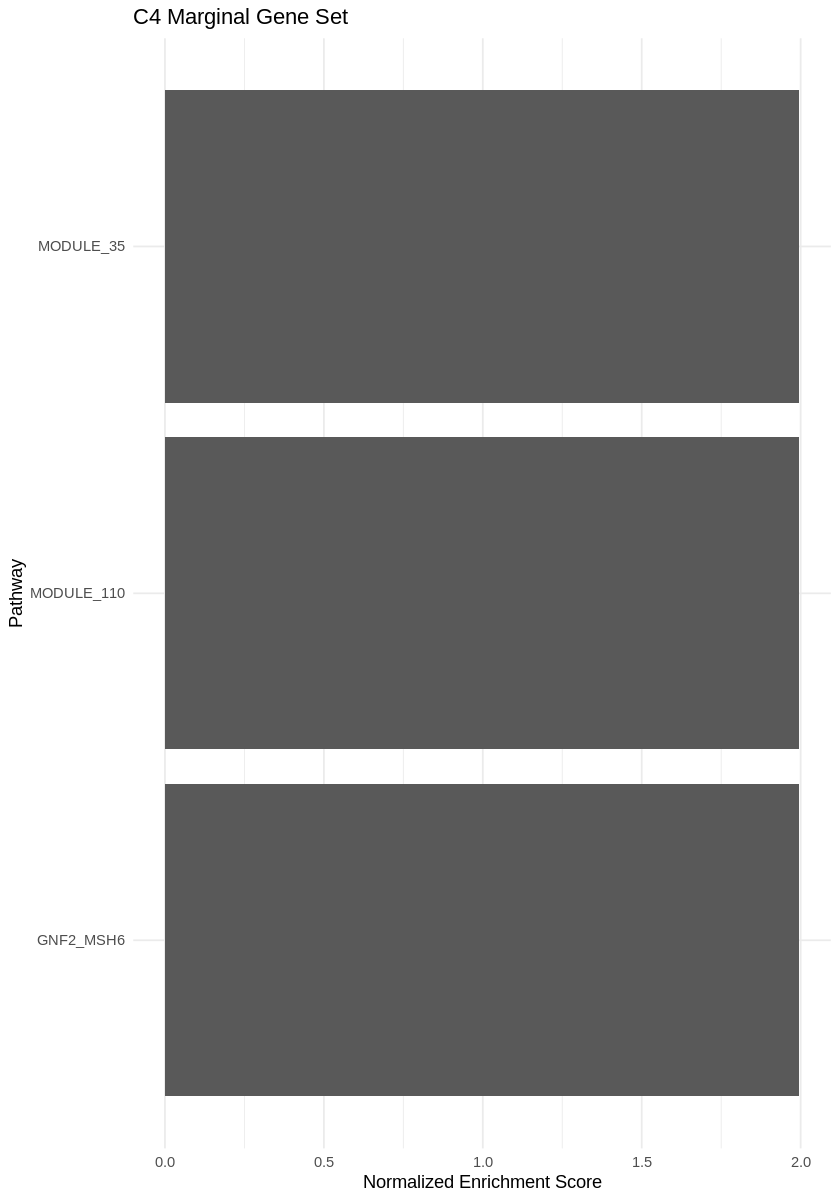

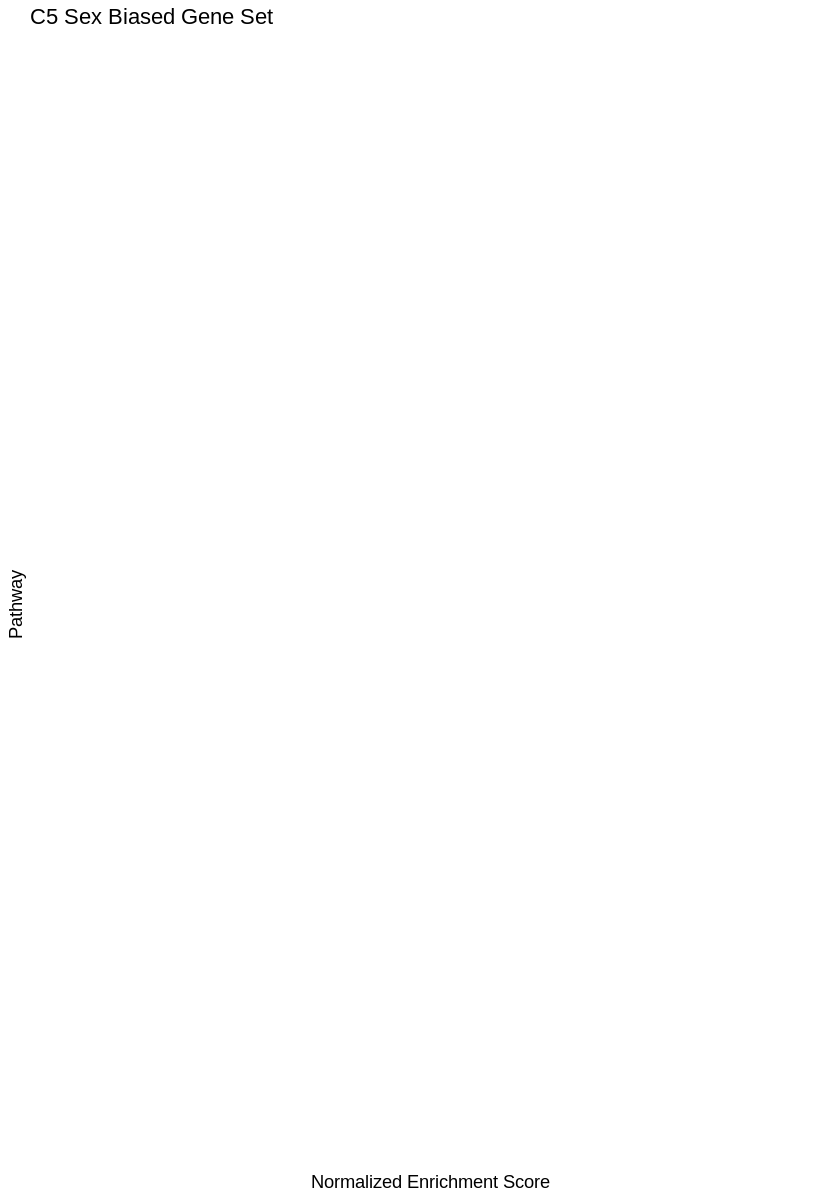

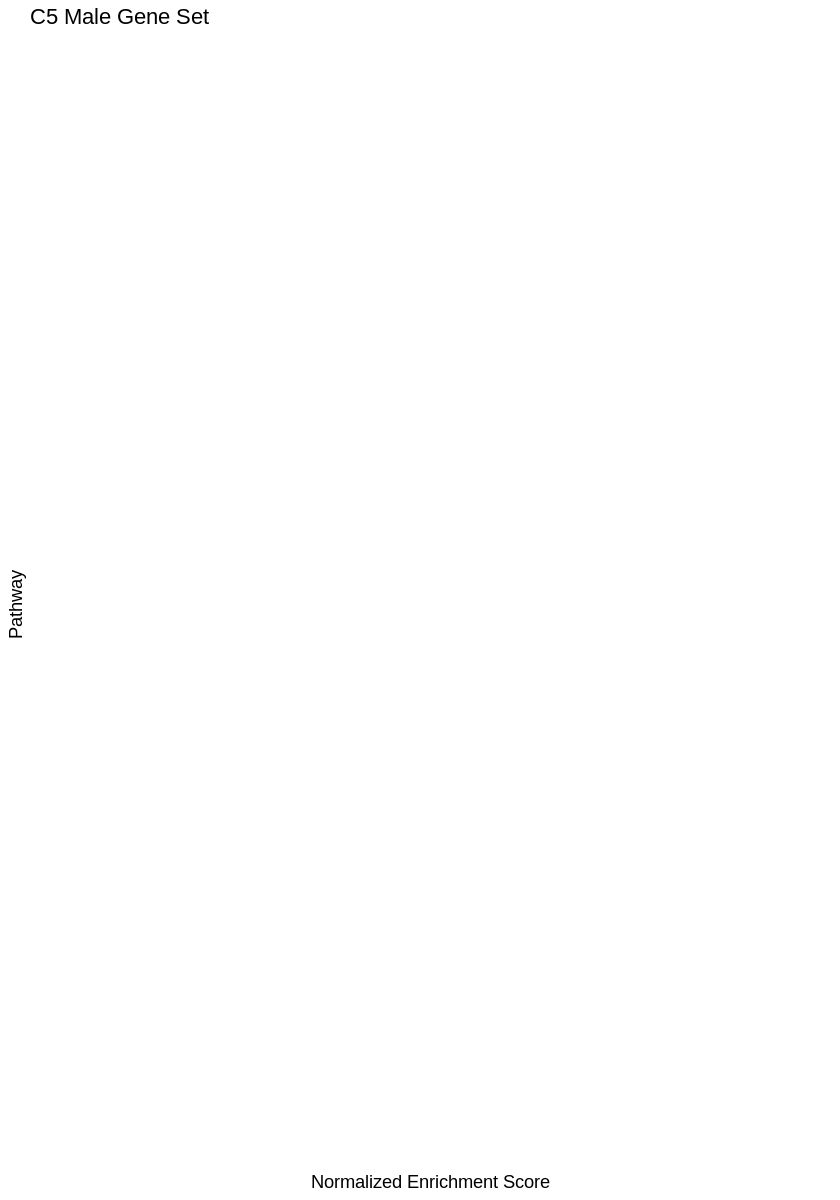

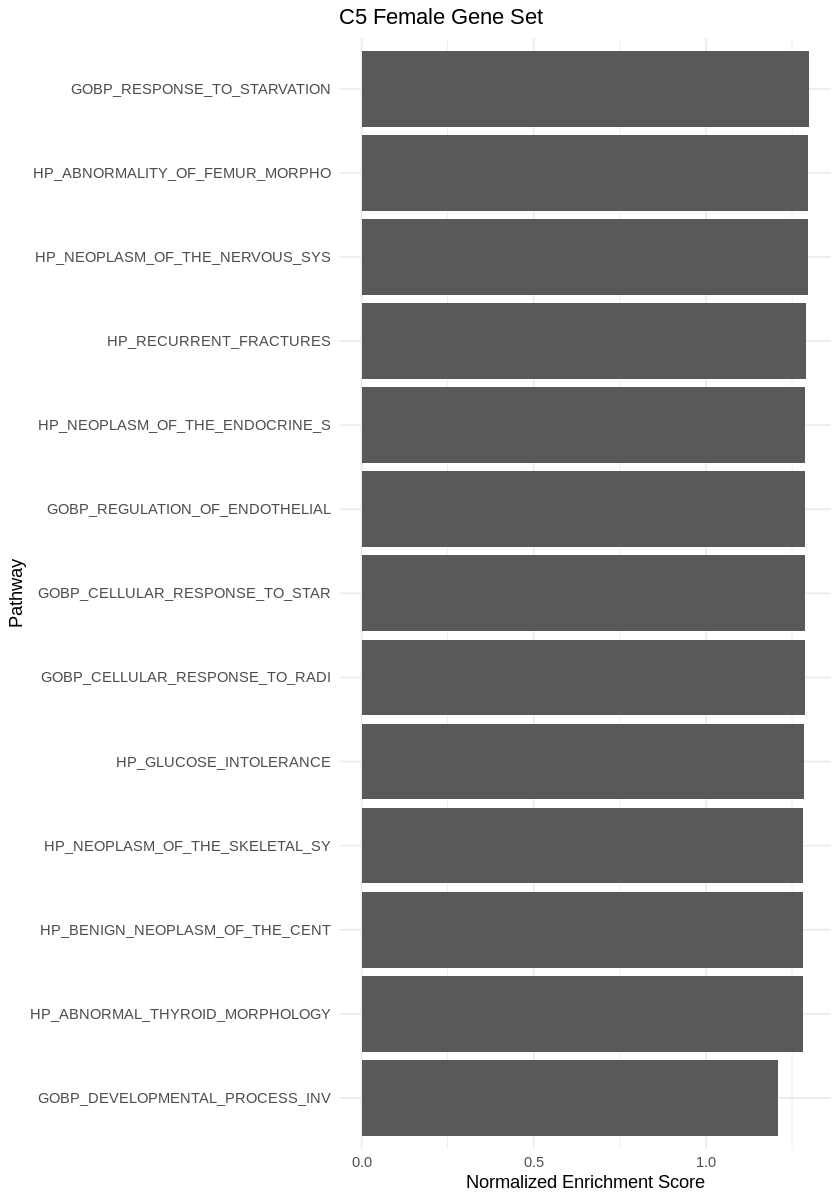

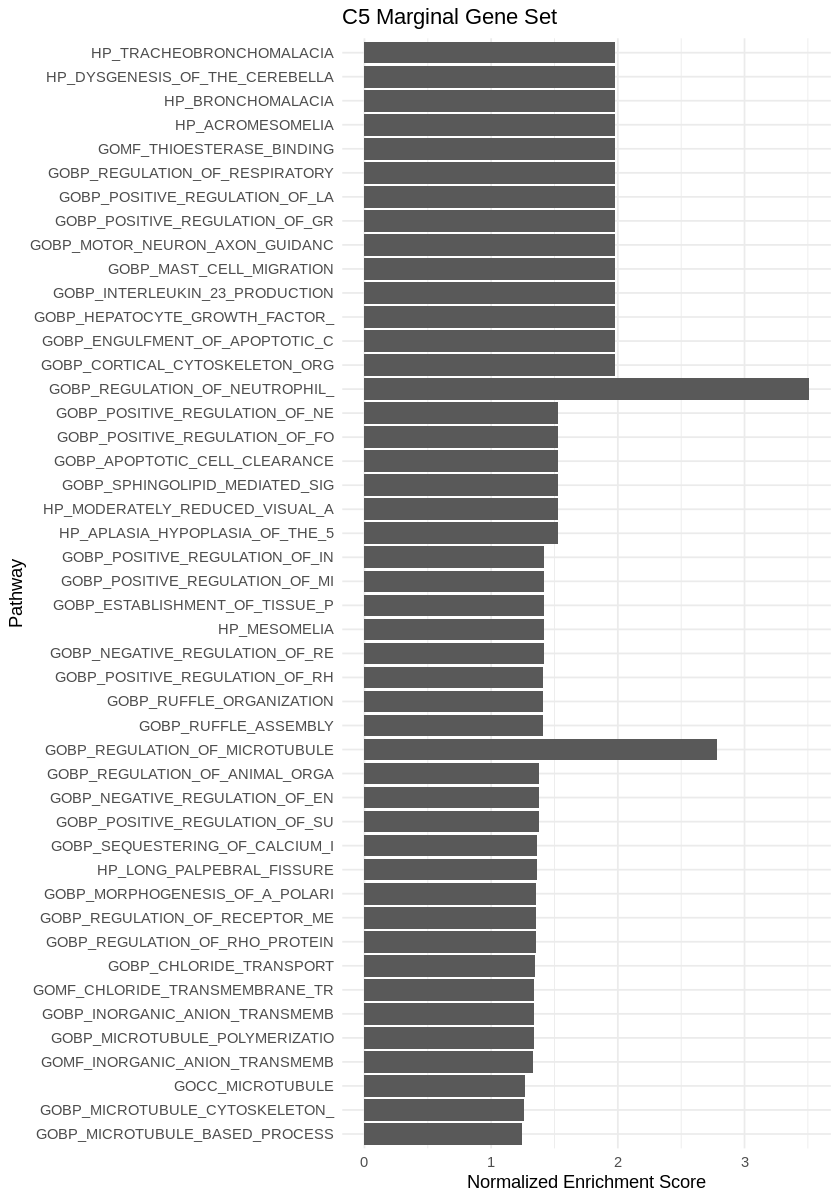

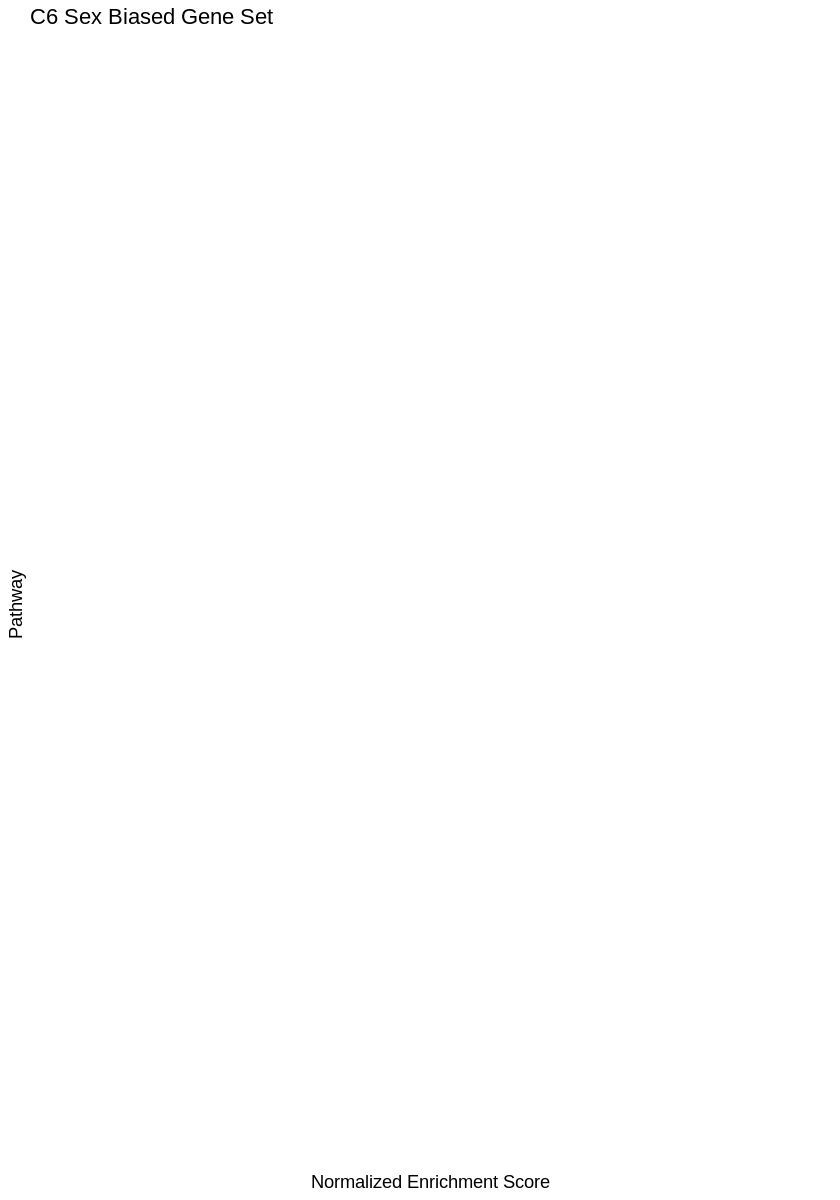

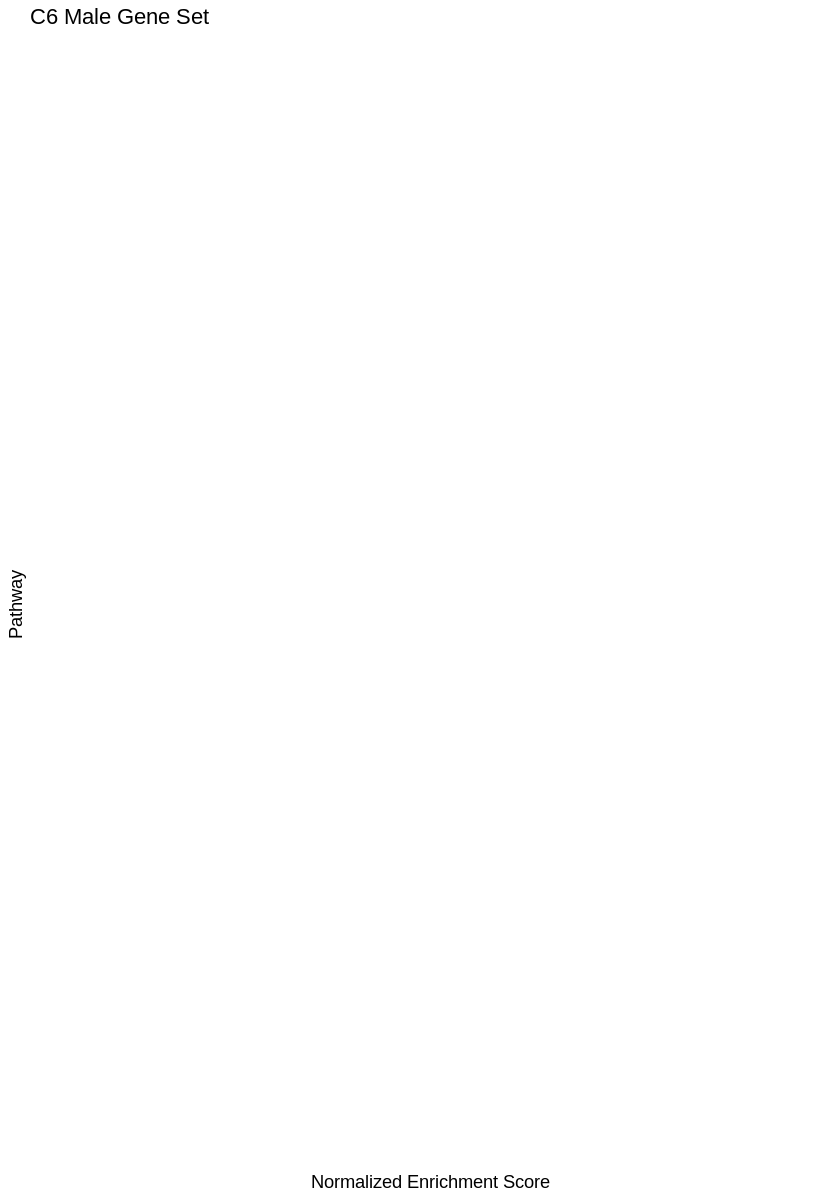

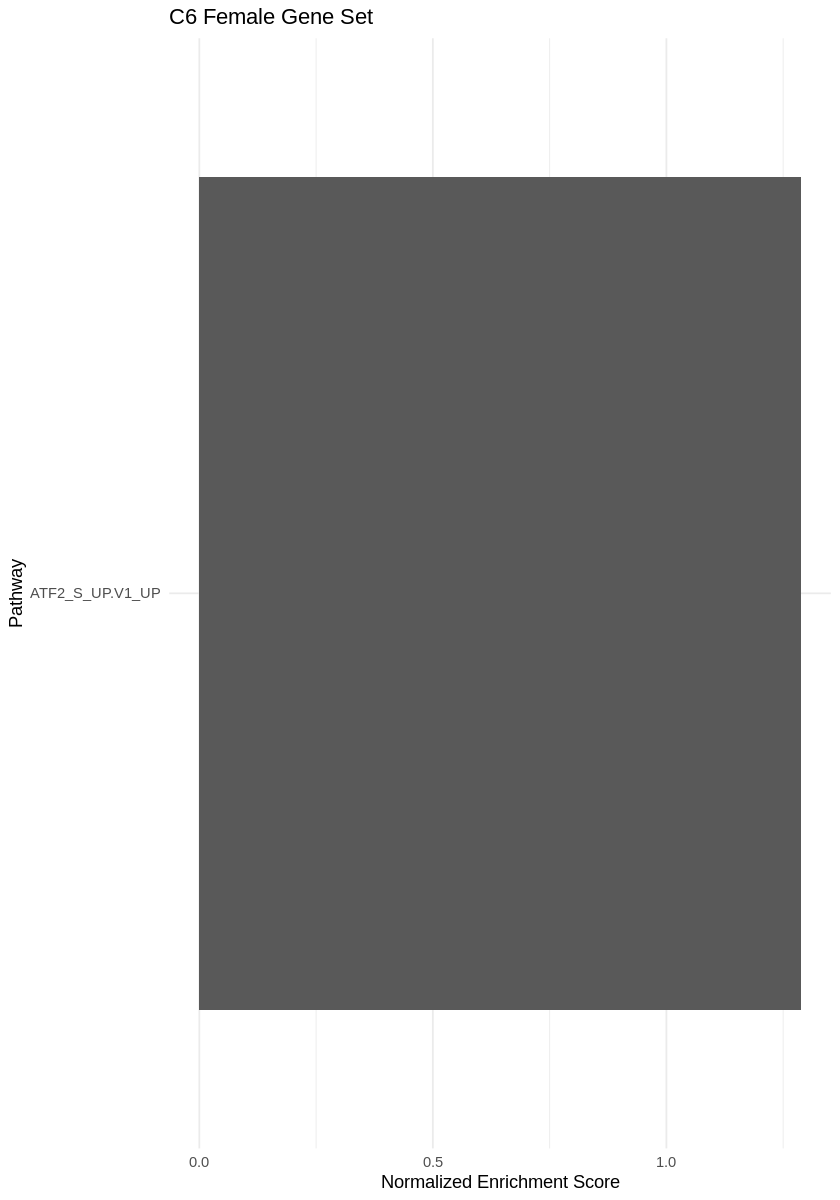

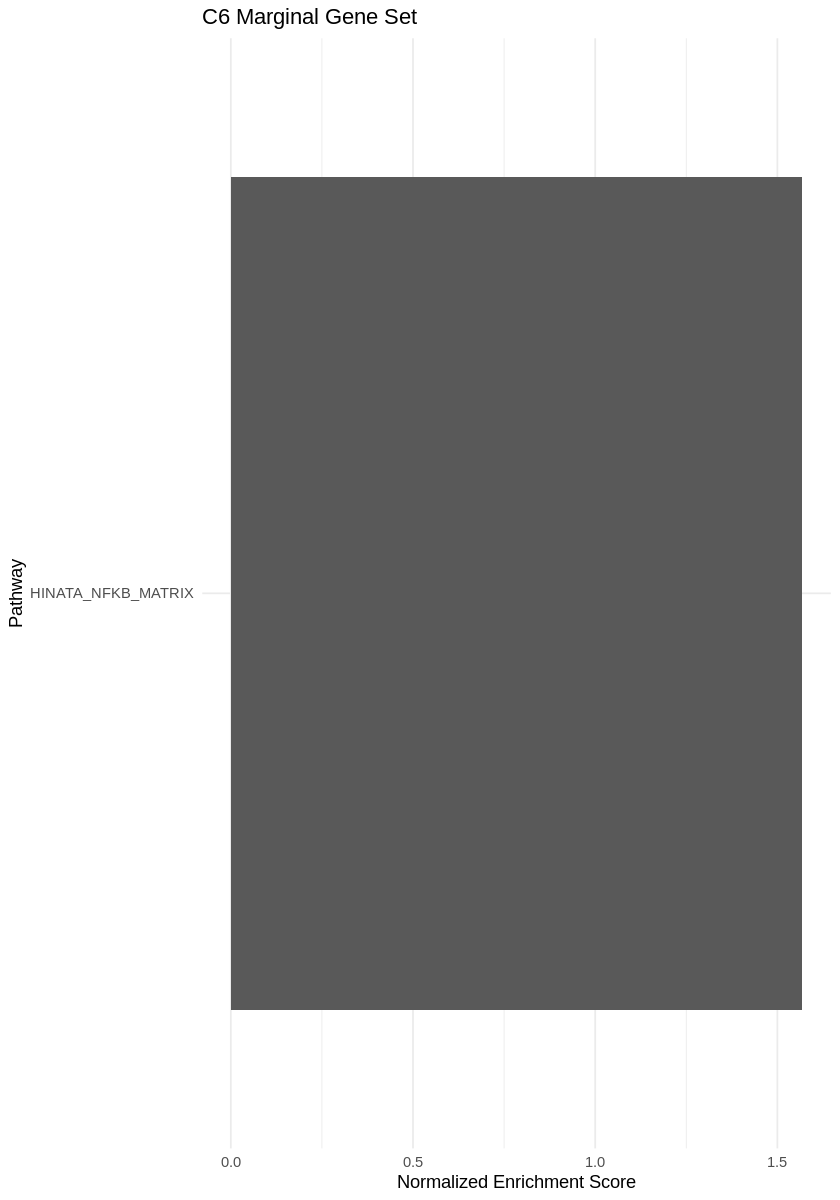

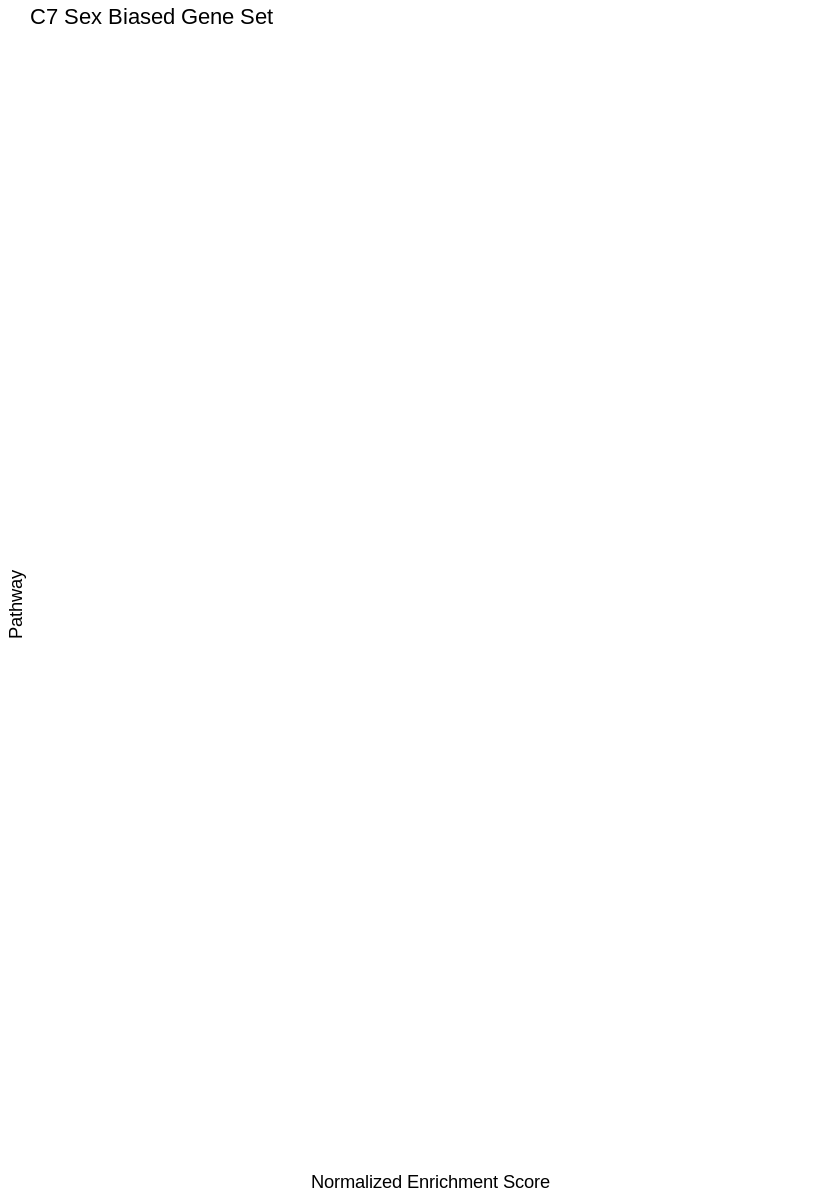

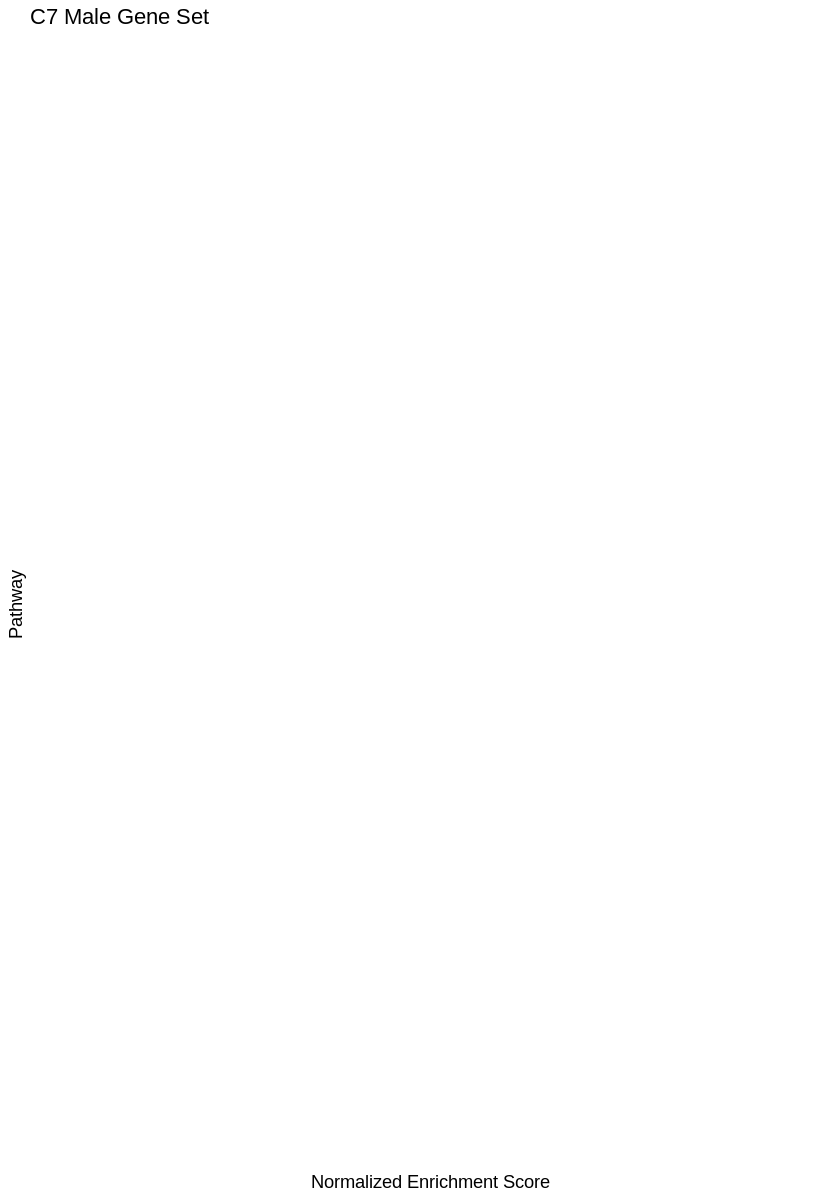

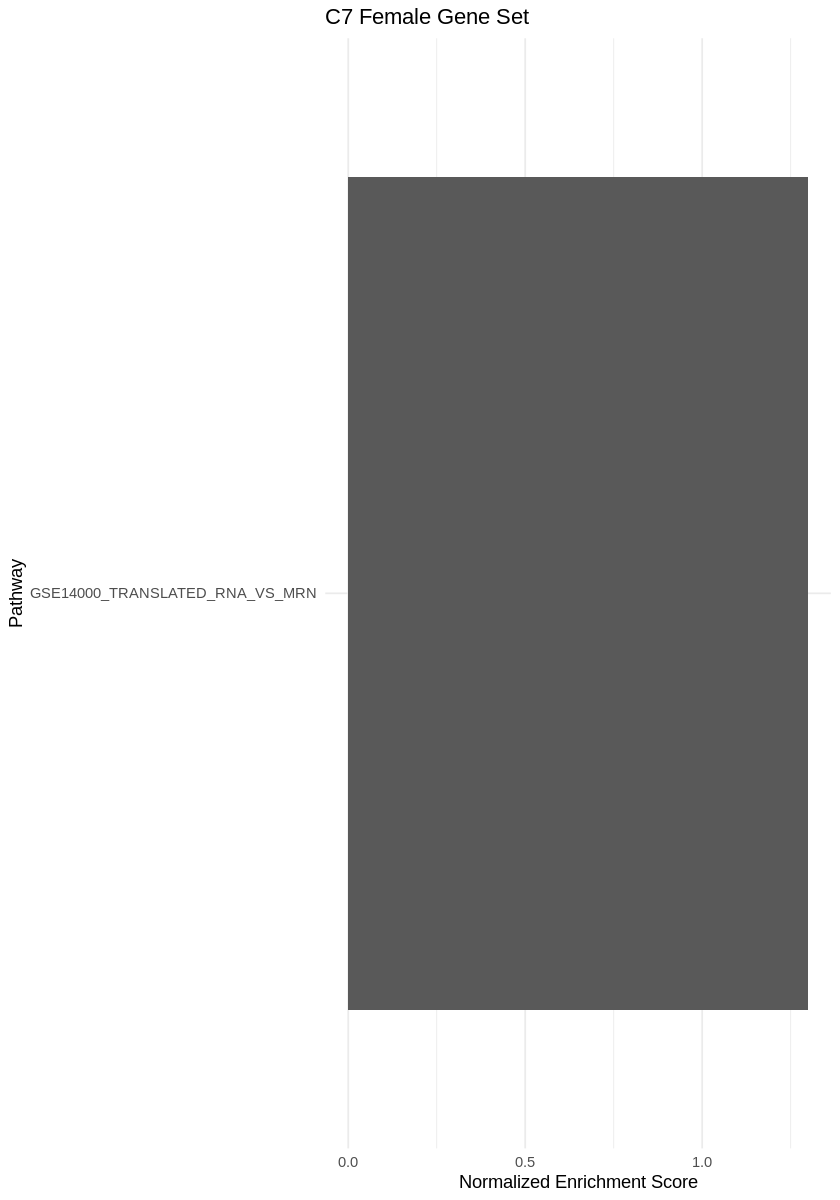

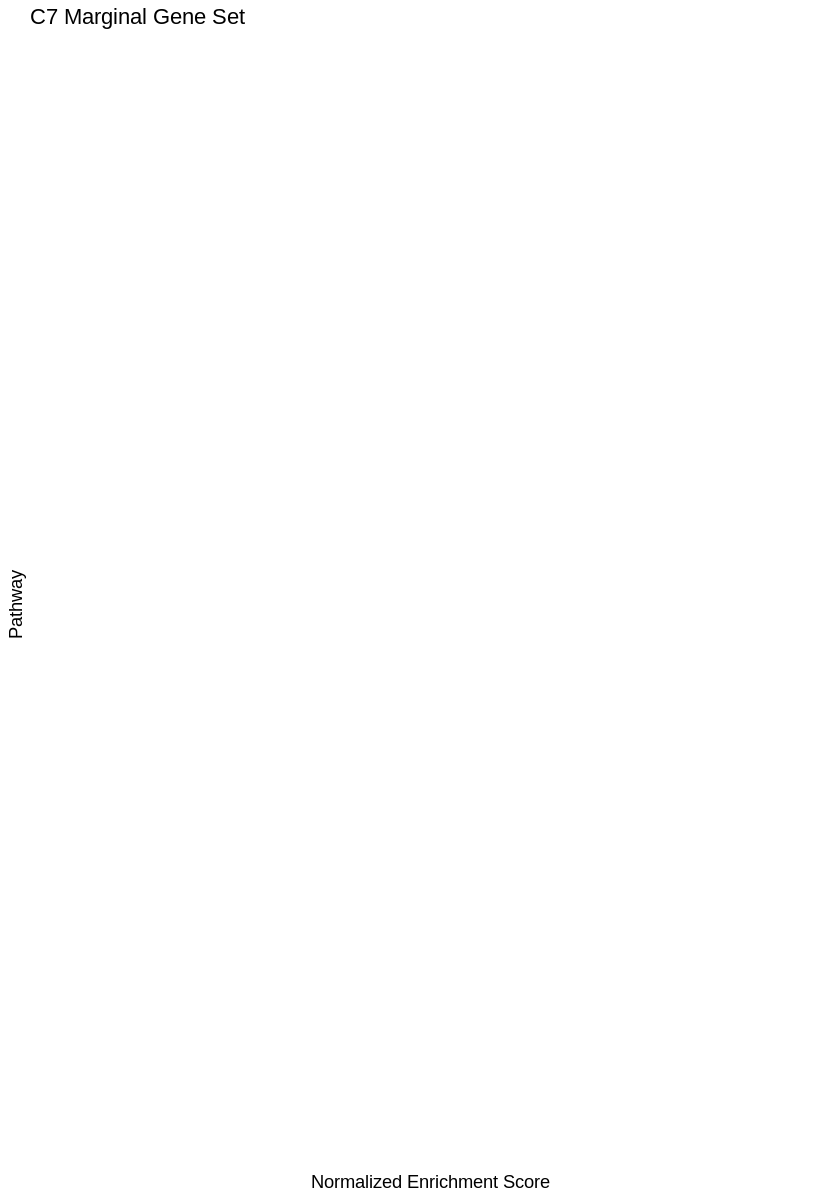

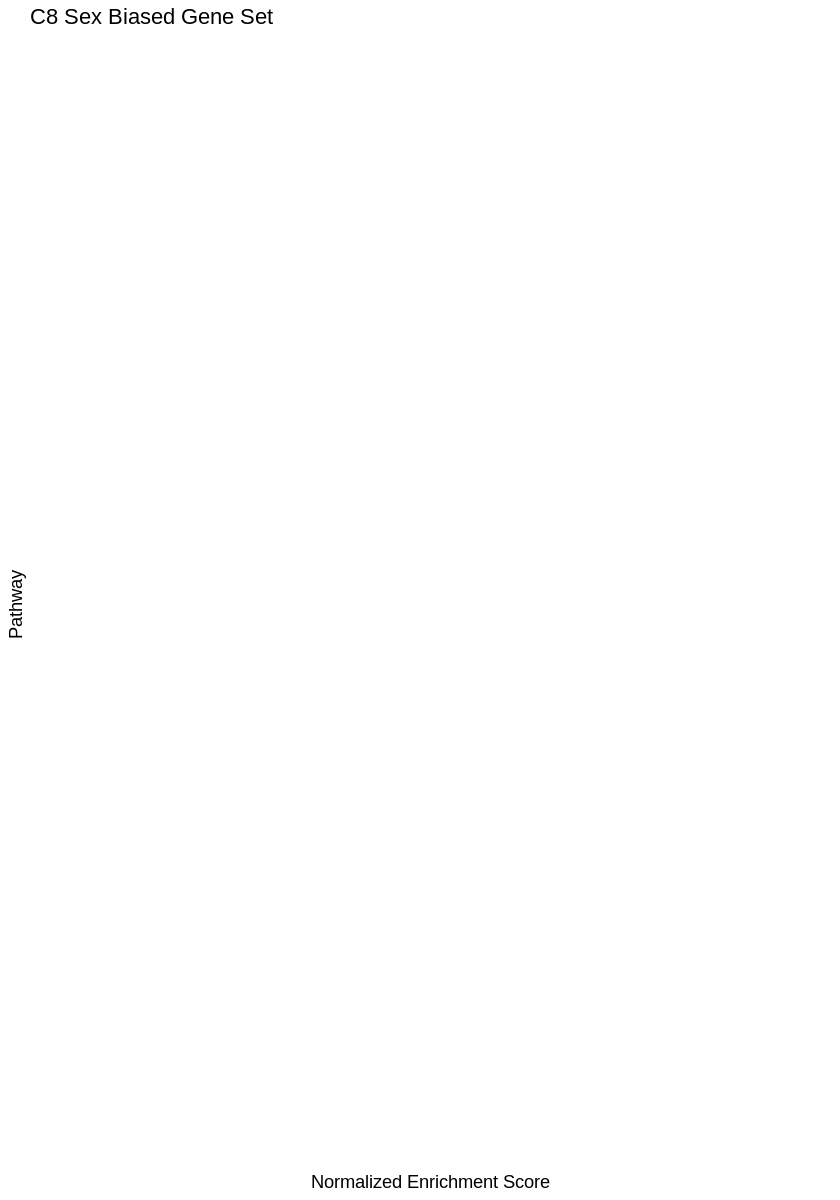

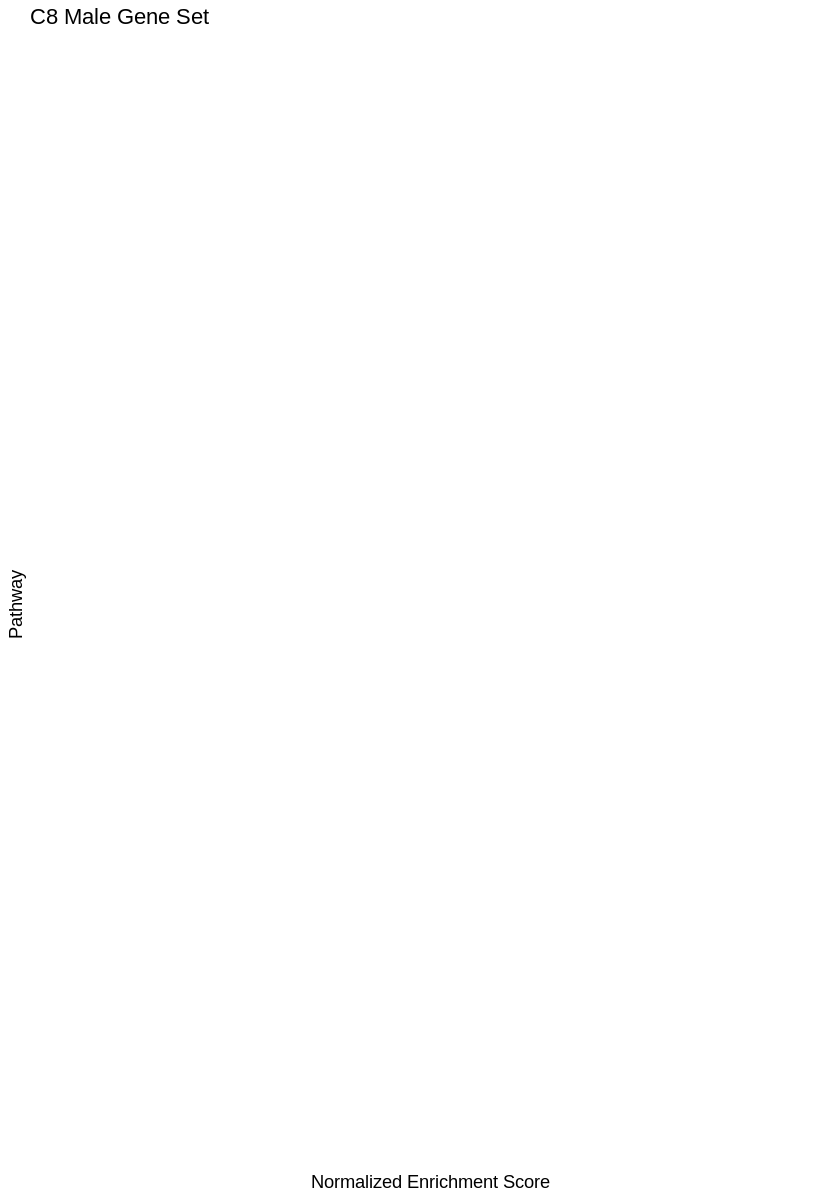

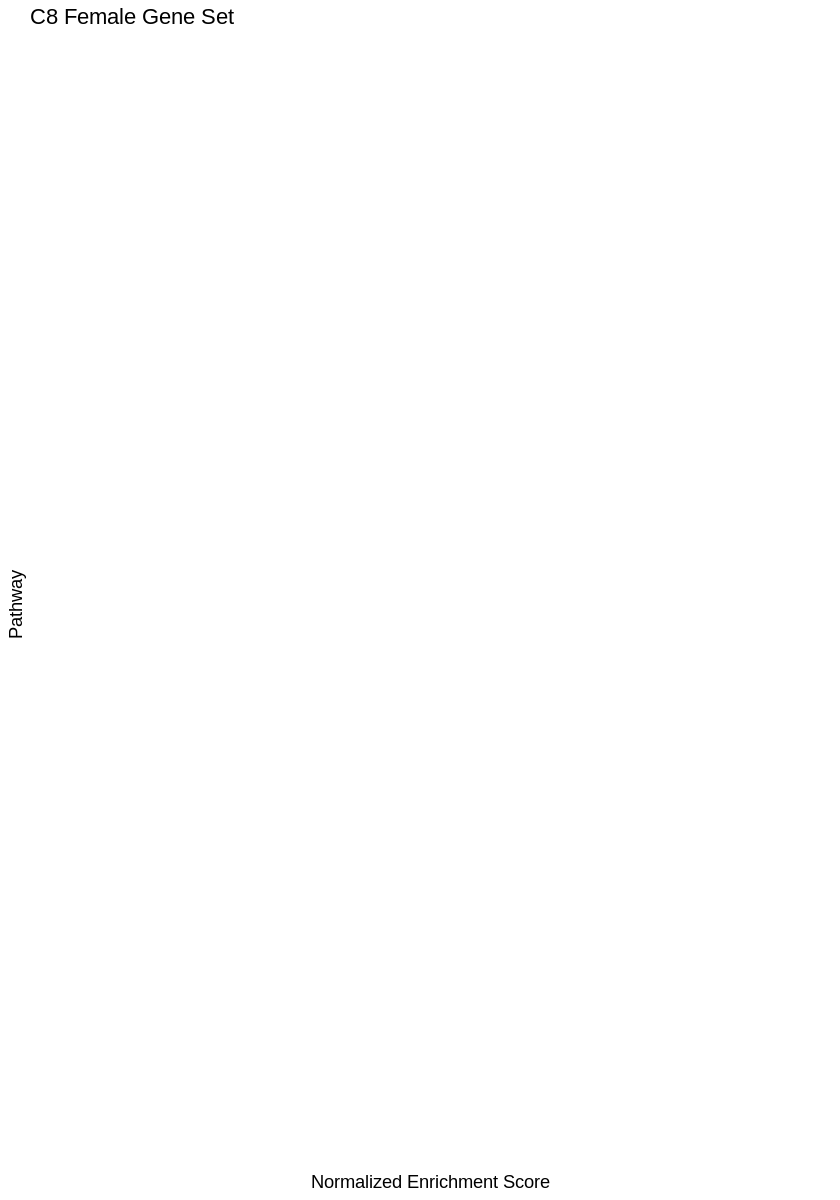

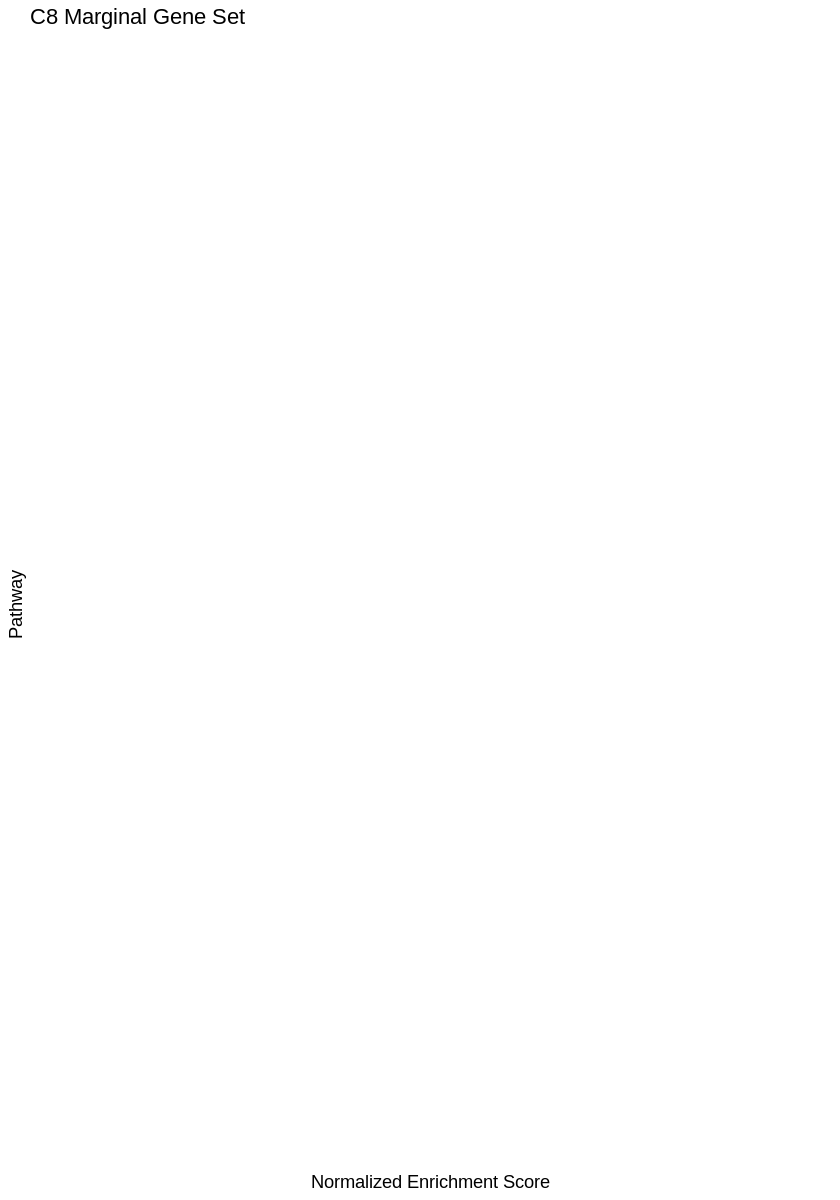

In [5]:
sex_ranked <- sex_biased %>%
    filter(UCSC_RefGene_Name != "") %>%
    mutate(UCSC_RefGene_Name = gsub(";.*","",UCSC_RefGene_Name)) %>%
    group_by(UCSC_RefGene_Name) %>%
    slice(which.min(`p-value`)) %>%
    select(UCSC_RefGene_Name,`p-value`) %>%
    deframe()
male_ranked <- sex_biased %>%
    filter(UCSC_RefGene_Name != "") %>%
    mutate(UCSC_RefGene_Name = gsub(";.*","",UCSC_RefGene_Name)) %>%
    group_by(UCSC_RefGene_Name) %>%
    slice(which.min(`p-value`)) %>%
    select(UCSC_RefGene_Name,res_m) %>%
    deframe()
female_ranked <- sex_biased %>%
    filter(UCSC_RefGene_Name != "") %>%
    mutate(UCSC_RefGene_Name = gsub(";.*","",UCSC_RefGene_Name)) %>%
    group_by(UCSC_RefGene_Name) %>%
    slice(which.min(`p-value`)) %>%
    select(UCSC_RefGene_Name,res_f) %>%
    deframe()
marginal_ranked <- marginal %>%
    filter(UCSC_RefGene_Name != "") %>%
    mutate(UCSC_RefGene_Name = gsub(";.*","",UCSC_RefGene_Name)) %>%
    group_by(UCSC_RefGene_Name) %>%
    slice(which.min(`p-value`)) %>%
    select(UCSC_RefGene_Name,`p-value`) %>%
    deframe()
hallmarks <- gmtPathways("/arc/project/st-dennisjk-1/shared/data/msigdb/h.all.v7.4.symbols.gmt")
c_list <- lapply(1:8, function(d)gmtPathways(sprintf("/arc/project/st-dennisjk-1/shared/data/msigdb/c%d.all.v7.4.symbols.gmt",d)))
print("hallmarks")
plot_gsea(fgsea(pathways=hallmarks,stats=sex_ranked,scoreType="pos"),"GSEA Hallmarks Sex Biased")
plot_gsea(fgsea(pathways=hallmarks,stats=male_ranked,scoreType="pos"),"GSEA Hallmarks Male")
plot_gsea(fgsea(pathways=hallmarks,stats=female_ranked,scoreType="pos"),"GSEA Hallmarks Female")
plot_gsea(fgsea(pathways=hallmarks,stats=marginal_ranked,scoreType="pos"),"GSEA Hallmarks Marginal")
template <- "C%d %s Gene Set"
for(i in 1:length(c_list)){
    elem <- c_list[[i]]
    plot_gsea(fgsea(pathways=elem,stats=sex_ranked,scoreType="pos"), sprintf(template,i,"Sex Biased"))
    plot_gsea(fgsea(pathways=elem,stats=male_ranked,scoreType="pos"), sprintf(template,i,"Male"))
    plot_gsea(fgsea(pathways=elem,stats=female_ranked,scoreType="pos"), sprintf(template,i,"Female"))
    plot_gsea(fgsea(pathways=elem,stats=marginal_ranked,scoreType="pos"), sprintf(template,i,"Marginal"))
}

## GO and KEGG Enrichment Analysis with missMethyl

In [25]:
marginal_go <- gometh(unique(marginal$gene),array.type = "450k")
sex_go <- gometh(unique(sex_biased$gene),array.type = "450k")
IRdisplay::display(sex_go %>% filter(FDR < 0.25))
IRdisplay::display(marginal_go %>% filter(FDR < 0.25))

All input CpGs are used for testing.

All input CpGs are used for testing.



ONTOLOGY,TERM,N,DE,P.DE,FDR
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>


,ONTOLOGY,TERM,N,DE,P.DE,FDR
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
GO:0090231,BP,regulation of spindle checkpoint,14,6,2.972027e-05,0.2253886
GO:0090266,BP,regulation of mitotic cell cycle spindle assembly checkpoint,14,6,2.972027e-05,0.2253886
GO:1903504,BP,regulation of mitotic spindle checkpoint,14,6,2.972027e-05,0.2253886


In [26]:
marginal_kegg <- gometh(unique(marginal$gene),array.type = "450k",collection="KEGG")
sex_kegg <- gometh(unique(sex_biased$gene),array.type = "450k", collection= "KEGG")
IRdisplay::display(sex_kegg %>% filter(FDR < 0.25))
IRdisplay::display(marginal_kegg %>% filter(FDR < 0.25))

All input CpGs are used for testing.

Warning message in file(file, "rt"):
“URL 'http://rest.kegg.jp/link/pathway/hsa': Timeout of 60 seconds was reached”


ERROR: Error in file(file, "rt"): cannot open the connection to 'http://rest.kegg.jp/link/pathway/hsa'
